# Analyze cluster data

in this notebook we will analyze many simulations we perfoermed on the cluster. 

In [1]:
import sys
import os
import time
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import itertools
import WormFunctionsMating as wrm
import seaborn as sns
import matplotlib as mp
from cycler import cycler
import matplotlib.ticker as ticker

from importlib import reload 
sns.set_theme(style='white')
import math

In [5]:
def calc_HomozygoztyVectors(genotypes):
    counts = []
    for genotype in genotypes:
        count = sum(1 for value in genotype if value == 2)  # Efficient count of '2'
        counts.append(count)
    return counts

def CalculateNumerOfMutatedAlleles(dynamics):
    genotype_value=calc_HomozygoztyVectors(worm_population.genotypes)
    print (genotype_value)
    R, T, Dim=np.shape(dynamics)
    
    A=np.zeros([R,T])
    for i in range (R):
        N=np.sum(dynamics[i,:,:],1)
        for j in range (T):
            current_genotype=dynamics[i, j,:]
            #print (current_genotype)
            #print (genotype_value)
            #print ('this', current_genotype*genotype_value)
            A[i,j]=np.sum(current_genotype*genotype_value/N[j])
            #print (A[i,j])
        
    ## this function will calculate and plot the number of homozygous mutated alleles
    return A
    


def CalcShanonIndex(dynamics):
    R, T, Dim=np.shape(dynamics)
    
    S_index=np.zeros([R,T])
    for i in range (R):
        N=np.sum(dynamics[i,:,:],1)
        for j in range (T):
            this_population=dynamics[i,j]/np.sum(dynamics[i,j])
            existin_pop=this_population[this_population>0]
            #print (existin_pop)
            #print (np.log(existin_pop))
            S_index[i,j]=-np.sum(existin_pop*np.log(existin_pop))
            #print (S_index[i,j])
    
    return S_index

In [9]:
loci=6   # number of loci
my_path='DataArticle/CombinedDataL'+str(loci)+'/'
N=200  # population size

dominance = 0  #0 for recessive, 1 for dominant, in between possible
epistasis=0
X=0.6

In [11]:
reload(wrm)
initial_male_fraction=0.5
mutation_rate=0.0001  #carefull with this - this is per genome, not locus! Is divided by 
concentration_gradient=[0.0000,0.1,0.2,0.4,0.8,1,1.5,2,2.5,3,4,5,6,8,10,12,15, 18, 21, 24, 27, 30, 35, 40, 45,50,65,70]
mean_selfing_offspring_num=300
mean_sexrep_offspring_num=1000
#cost_vector=[0.05, 0.05]
#benefit_vector=[0.5,0.5]


cost_vector=[0.05, 0.05,0.05,0.1,0.1,0.1]
benefit_vector=[0.5,0.5,0.5,3,3,3]

sex_asex_reproduction_ratio=0.5

worm_population=wrm.Worm_population_stochastic(N,loci=loci,cost_vector=cost_vector,benefit_vector=benefit_vector,dominance=dominance, mutation_rate=mutation_rate, initial_male_fraction=initial_male_fraction, mean_selfing_offspring_num=mean_selfing_offspring_num, mean_sexrep_offspring_num=mean_sexrep_offspring_num, sex_asex_reproduction_ratio=sex_asex_reproduction_ratio)
print (worm_population.genotypes)

[[0 0 0 0 0 0]
 [0 0 0 0 0 1]
 [0 0 0 0 0 2]
 ...
 [2 2 2 2 2 0]
 [2 2 2 2 2 1]
 [2 2 2 2 2 2]]


## Read in data

In [15]:

name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
concentration=np.load(name+'all_concentration.npy')
time=np.load(name+'all_time.npy')
dynamics_h=np.load(name+'all_dynamics_h.npy')
dynamics_m=np.load(name+'all_dynamics_m.npy')
frequency=np.load(name+'all_frequency.npy')
dilution=np.load(name+'all_dilution.npy')

In [17]:
my_path='DataArticle/CombinedDataL6/'
epistasis=0



In [3]:
## Change this for plots of different scenarios

loci=6   # number of loci
dominance = 0  #0 for recessive, 1 for dominant, in between possible
X=0.5  # mating fraction



In [ ]:
N=200
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
concentration2=np.load(name+'all_concentration.npy')

N=2000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
concentration3=np.load(name+'all_concentration.npy')

N=20000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
concentration4=np.load(name+'all_concentration.npy')

N=200000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
concentration5=np.load(name+'all_concentration.npy')

# Plot concentration at time T

AndroDioecious,X=  0.5


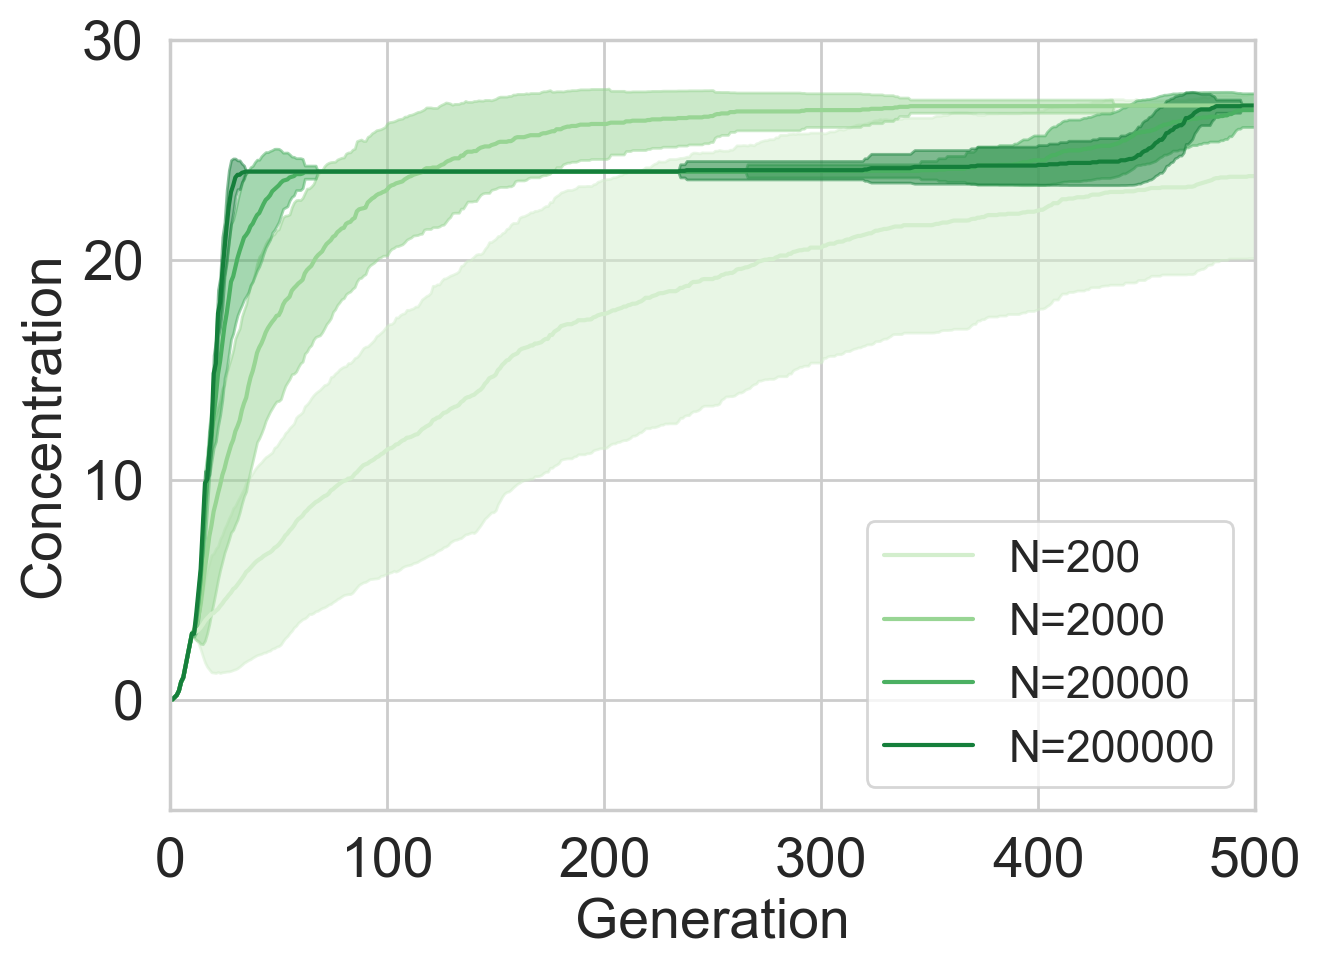

In [197]:
# Create Seaborn figure
 
sns.set_theme(style="whitegrid", rc={"font.size": 6}) # Set font size within sns.set_theme()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

#sns.set_theme(style="whitegrid")
#sns.set(rc={'font.size': 6})  # Use sns.set() with the rc parameter


plt.figure(figsize=(7, 5), dpi=200)
data_to_plot = [concentration2, concentration3, concentration4, concentration5]
if X==0.0:
    palette = sns.color_palette("PuBu", 4)
    print('herma')
elif X==1:
    palette = sns.color_palette("Reds", 4)
    print ('dio')
else:
    print ('AndroDioecious,X= ', X)
    palette = sns.color_palette("Greens", 4)  #PuBu, Greens, Reds
    


# Plot each dataset directly without Pandas DataFrame
for i, H in enumerate(data_to_plot):
    x = range(len(H[0]))
    y = np.mean(H, axis=0)
    err = np.std(H, axis=0)
    label = ["N=200", "N=2000", "N=20000", "N=200000"][i]
    sns.lineplot(x=x, y=y, label=label, color=palette[i])
    plt.fill_between(x, y - err, y + err, color=palette[i], alpha=0.5)
plt.xlabel("Generation", fontsize=20)
plt.ylabel("Concentration", fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0, 500)
plt.ylim(-5,30)
plt.savefig('FigConcentrationL'+str(loci)+'X'+str(X)+'D'+str(dominance)+'.png',bbox_inches='tight')

plt.show()

In [264]:
T=15

In [265]:
conc_t2=concentration2[:,T]
conc_t3=concentration3[:,T]
conc_t4=concentration4[:,T]
conc_t5=concentration5[:,T]

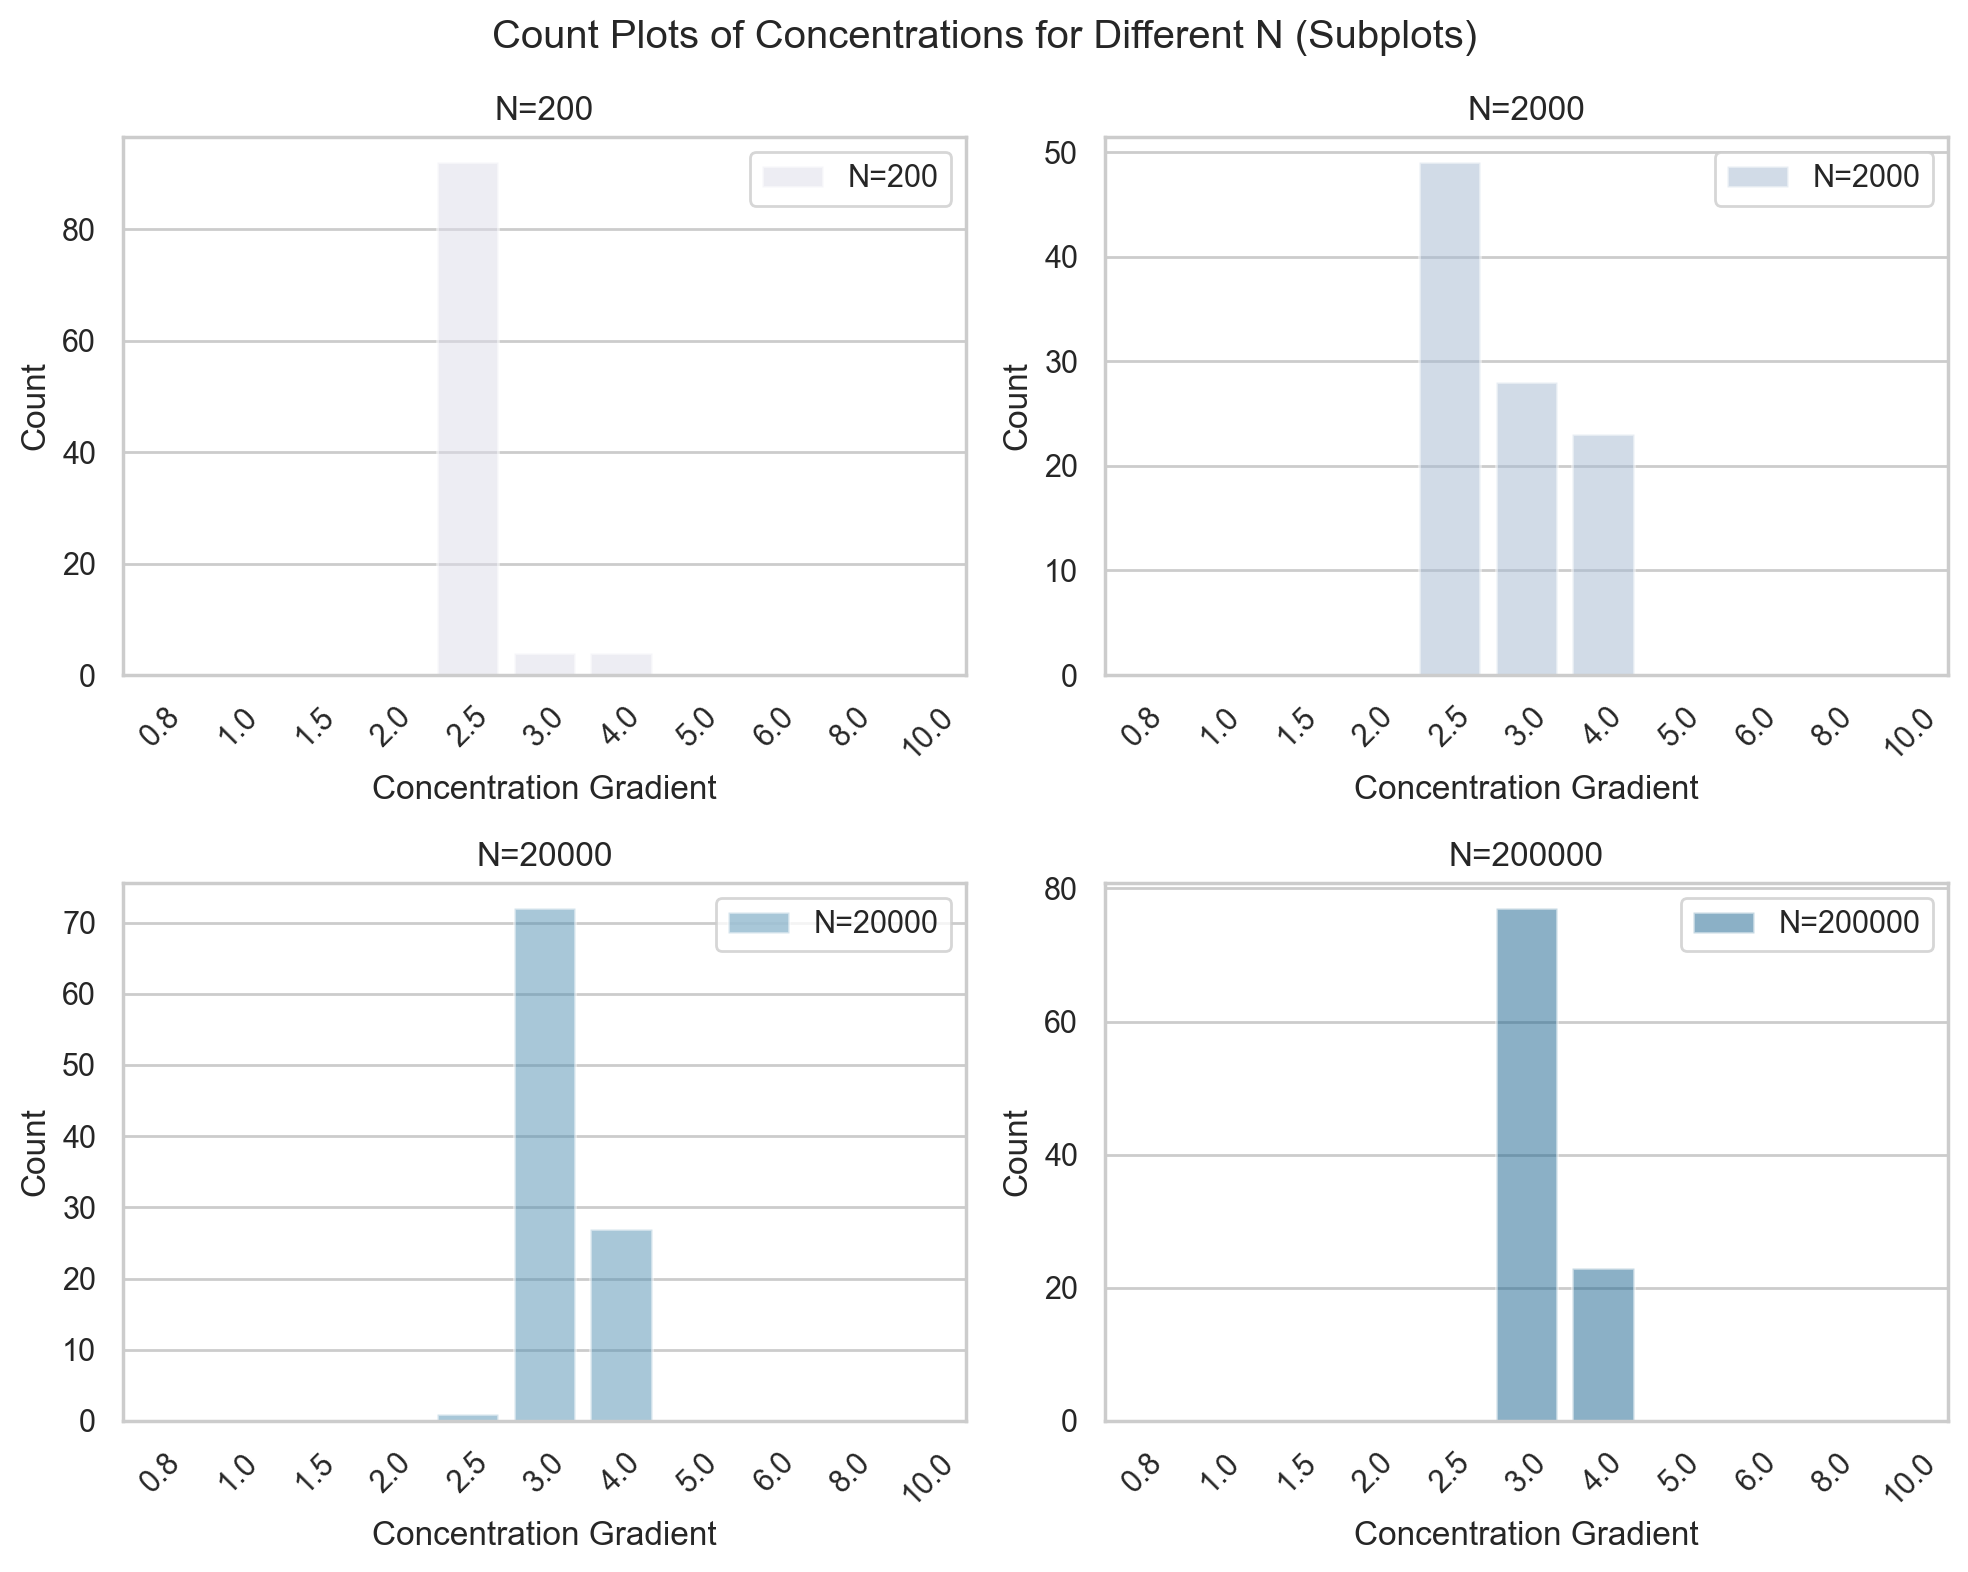

In [266]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=200) 
# Change figsize and dpi based on your preferences

CG = [0.8, 1, 1.5, 2, 2.5, 3, 4, 5, 6, 8, 10]

# Data to plot
data_to_plot = [conc_t2, conc_t3, conc_t4, conc_t5]
labels = ["N=200", "N=2000", "N=20000", "N=200000"]

# Iterate through each subplot and data
for i, (data, ax) in enumerate(zip(data_to_plot, axes.flat)):
    unique, counts = np.unique(data, return_counts=True)
    heights = np.zeros_like(CG)
    for j, val in enumerate(unique):
        heights[CG.index(val)] = counts[j]

    sns.barplot(
        x=CG,
        y=heights,
        color=palette[i],
        label=labels[i],
        alpha=0.5,
        ax=ax,  # Specify the subplot axis for each plot
    )

    ax.set_xlabel("Concentration Gradient")
    ax.set_ylabel("Count")
    ax.set_title(labels[i])
    ax.tick_params(axis='x', rotation=45) 

fig.suptitle("Count Plots of Concentrations for Different N (Subplots)")
plt.tight_layout()
plt.show()

## Plot Shanon index

In [380]:

L=2
my_path='DataArticle/CombinedDataL2/'
loci=2

In [406]:
X=0.5
dominance=1
N=200
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h200=np.load(name+'all_dynamics_h.npy')
dynamics_m200=np.load(name+'all_dynamics_m.npy')


N=2000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h2000=np.load(name+'all_dynamics_h.npy')
dynamics_m2000=np.load(name+'all_dynamics_m.npy')


N=20000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h20000=np.load(name+'all_dynamics_h.npy')
dynamics_m20000=np.load(name+'all_dynamics_m.npy')

N=200000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h200000=np.load(name+'all_dynamics_h.npy')
dynamics_m200000=np.load(name+'all_dynamics_m.npy')

S_2=CalcShanonIndex(dynamics_h200+dynamics_m200)
S_3=CalcShanonIndex(dynamics_h2000+dynamics_m2000)
S_4=CalcShanonIndex(dynamics_h20000+dynamics_m20000)
S_5=CalcShanonIndex(dynamics_h200000+dynamics_m200000)

0.5
AndroDioecious,X=  0.5


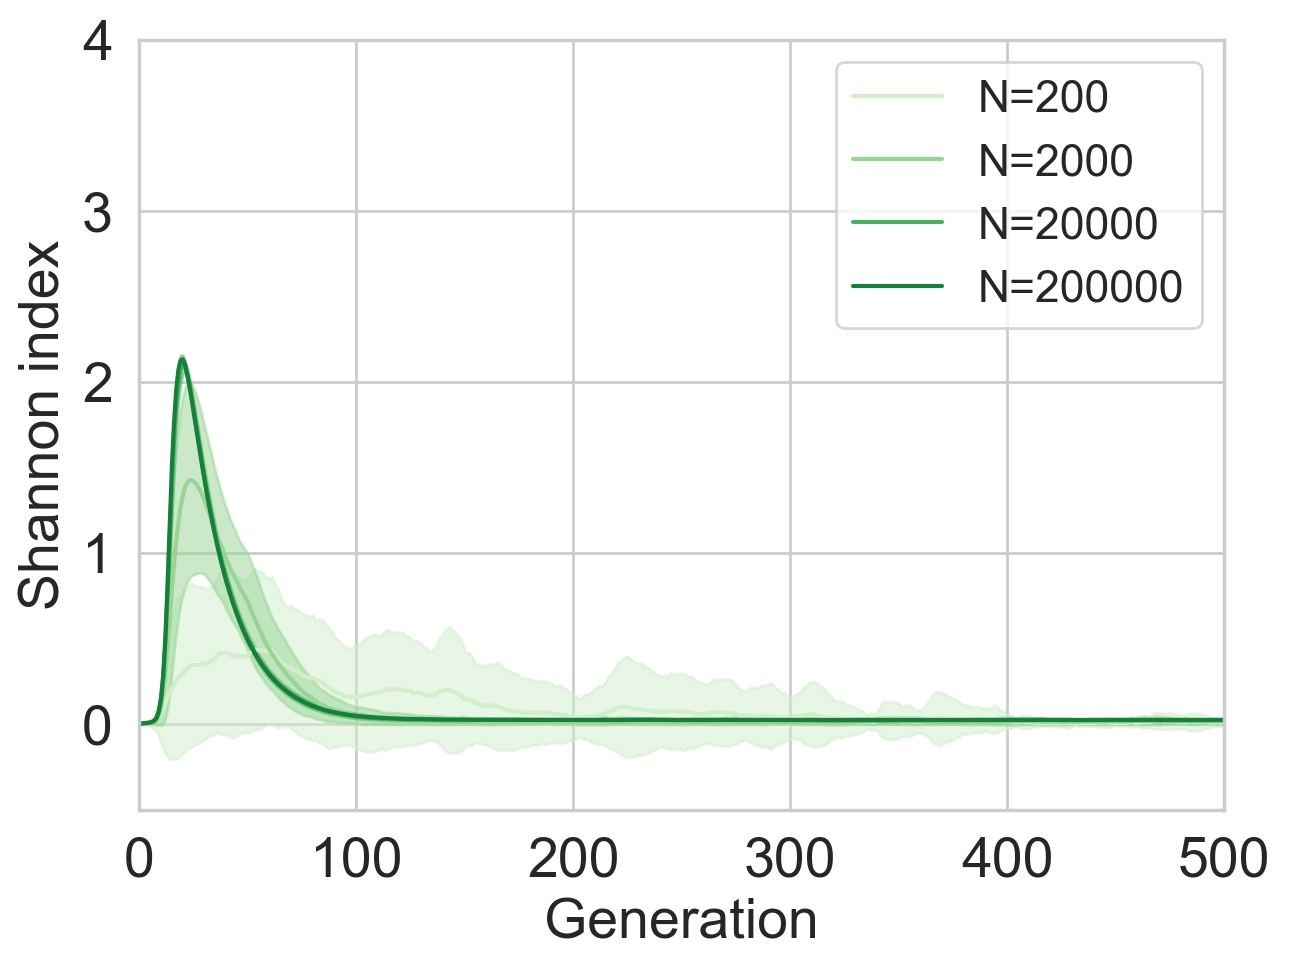

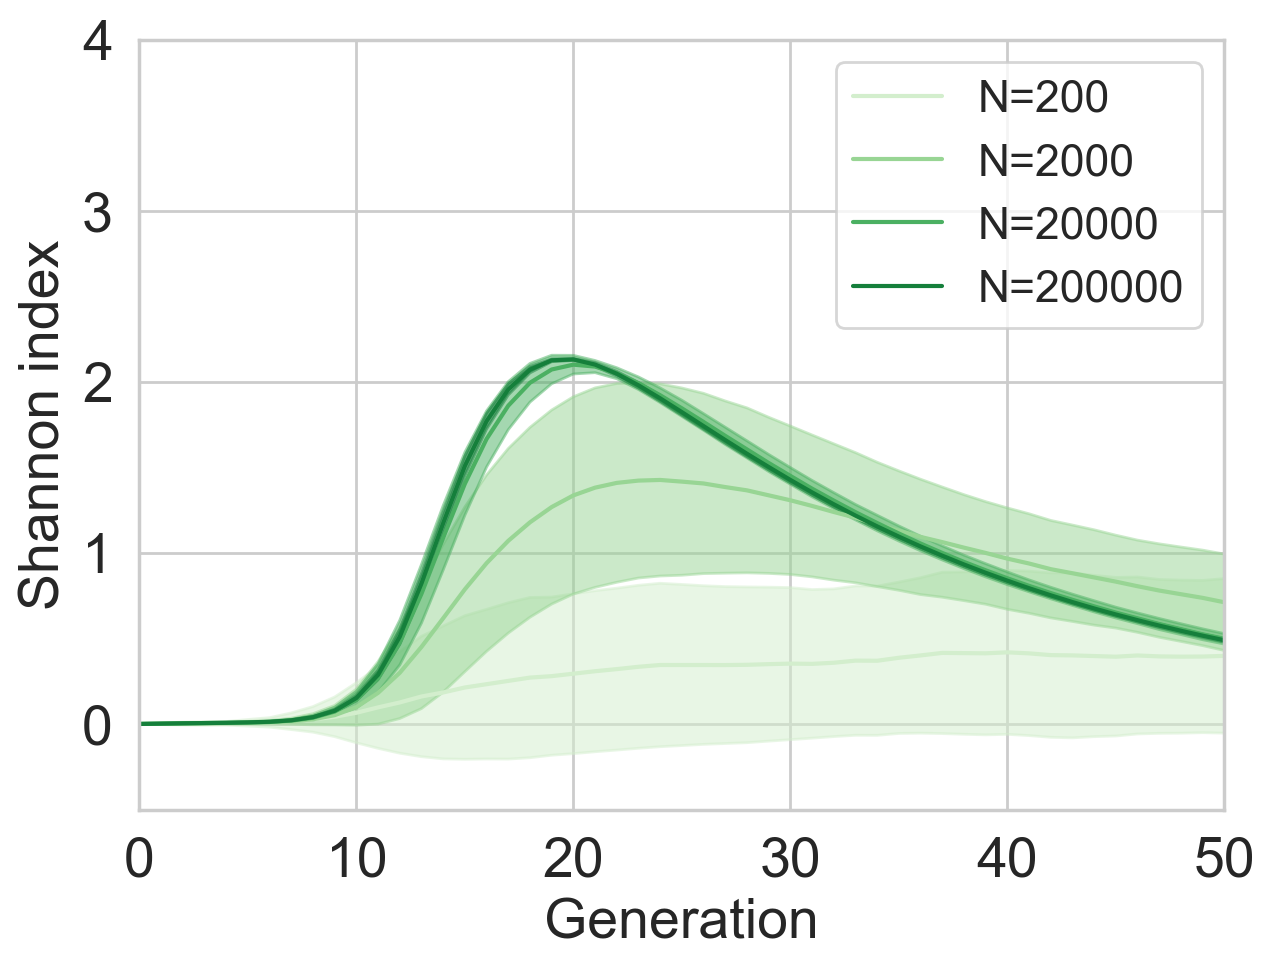

In [407]:
# Create Seaborn figure
sns.set_theme(style="whitegrid", rc={"font.size": 6}) # Set font size within sns.set_theme()
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(7, 5), dpi=200)
print (X)
# Color palette from 'Greens'
if X==0.0:
    palette = sns.color_palette("PuBu", 4)
    print('herma')
elif X==1:
    palette = sns.color_palette("Reds", 4)
    print ('dio')
else:
    print ('AndroDioecious,X= ', X)
    palette = sns.color_palette("Greens", 4)  #PuBu, Greens, Reds
    

# Plot each dataset directly without Pandas DataFrame
for i, S in enumerate([S_2, S_3, S_4, S_5]):
    x = range(len(S[0]))
    y = np.mean(S, axis=0)
    err = np.std(S, axis=0)
    label = ["N=200", "N=2000", "N=20000", "N=200000"][i]
    sns.lineplot(x=x, y=y, label=label, color=palette[i])
    plt.fill_between(x, y - err, y + err, color=palette[i], alpha=0.5)

plt.xlabel("Generation", fontsize=20)
plt.ylabel("Shannon index",fontsize=20)
plt.ylim([-0.5,4])
plt.xlim([0,500])

plt.legend(fontsize=16)
plt.savefig('FigShannonIndexL'+str(loci)+'X'+str(X)+'D'+str(dominance)+'.png',bbox_inches='tight')

plt.show()

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.figure(figsize=(7, 5), dpi=200)

# Plot each dataset directly without Pandas DataFrame
for i, S in enumerate([S_2, S_3, S_4, S_5]):
    x = range(len(S[0]))
    y = np.mean(S, axis=0)
    err = np.std(S, axis=0)
    label = ["N=200", "N=2000", "N=20000", "N=200000"][i]
    sns.lineplot(x=x, y=y, label=label, color=palette[i])
    plt.fill_between(x, y - err, y + err, color=palette[i], alpha=0.5)

plt.xlabel("Generation", fontsize=20)
plt.ylabel("Shannon index",fontsize=20)
plt.ylim([-0.5,4])
plt.xlim([0,50])

plt.legend(fontsize=16)
plt.savefig('FigZoomShannonIndexL'+str(loci)+'X'+str(X)+'D'+str(dominance)+'.png',bbox_inches='tight')

plt.show()



## Plot number of homozygous mutations

In [279]:
dominance=0
X=1.0
N=200
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h200=np.load(name+'all_dynamics_h.npy')
dynamics_m200=np.load(name+'all_dynamics_m.npy')


N=2000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h2000=np.load(name+'all_dynamics_h.npy')
dynamics_m2000=np.load(name+'all_dynamics_m.npy')


N=20000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h20000=np.load(name+'all_dynamics_h.npy')
dynamics_m20000=np.load(name+'all_dynamics_m.npy')

N=200000
name=my_path+'WormsT500N'+str(N)+'L'+str(loci)+'E0X'+str(X)+'D'+str(dominance)
dynamics_h200000=np.load(name+'all_dynamics_h.npy')
dynamics_m200000=np.load(name+'all_dynamics_m.npy')

[0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 4, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 4, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 4, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 4, 2, 2, 3, 2, 2, 3, 3, 3, 4, 3, 3, 4, 3, 3, 4, 4, 4, 5, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 0, 0, 1, 0, 0, 1, 1, 1, 2, 0, 0, 1, 0, 0, 1, 1, 1, 2, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 1, 1, 2, 1, 1, 2, 2, 2, 3, 2, 2, 3, 2, 2, 3, 3, 3, 4, 0, 0, 1, 0, 0, 1, 1, 1, 2, 

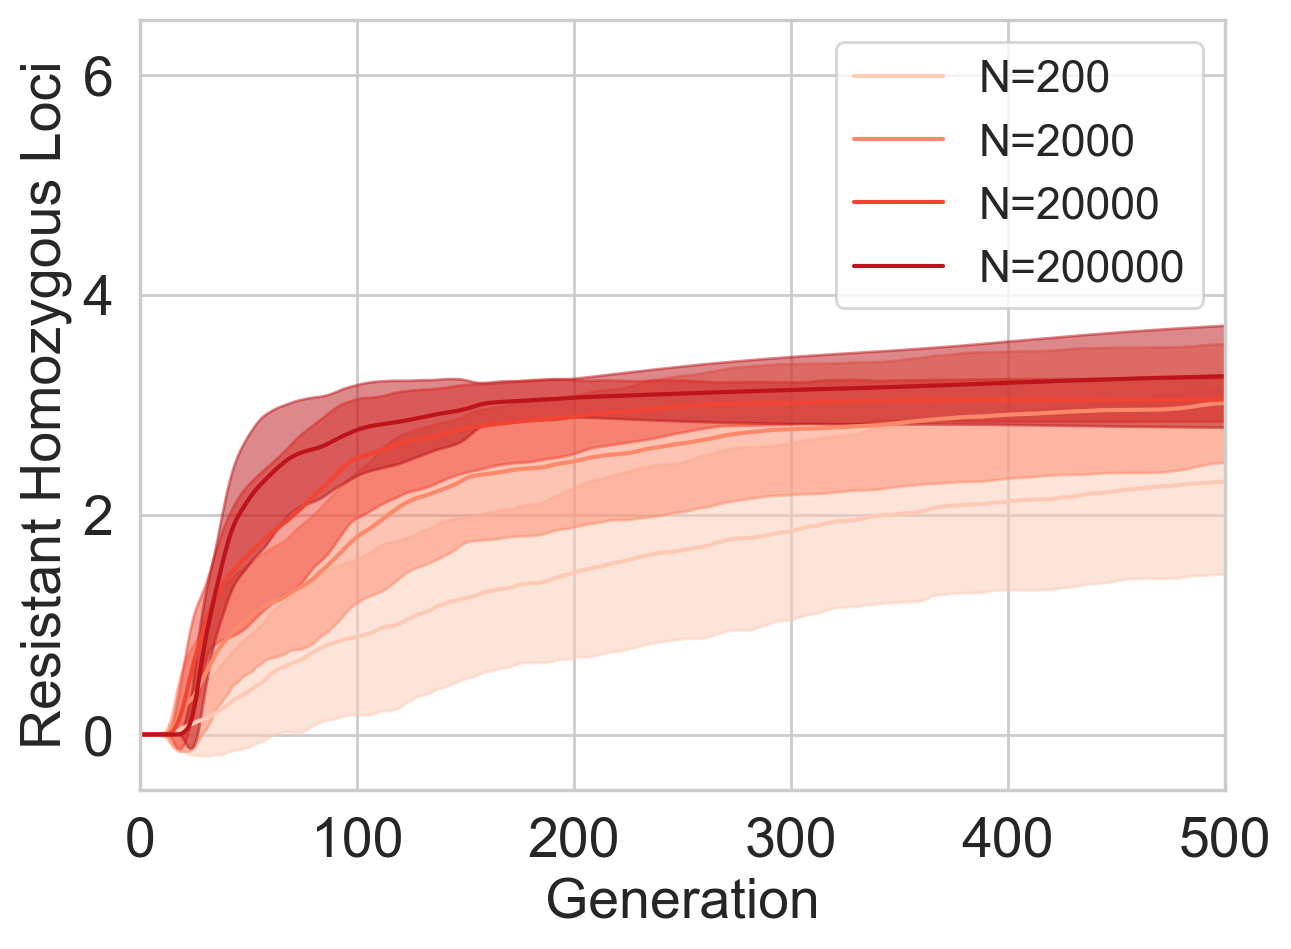

dio


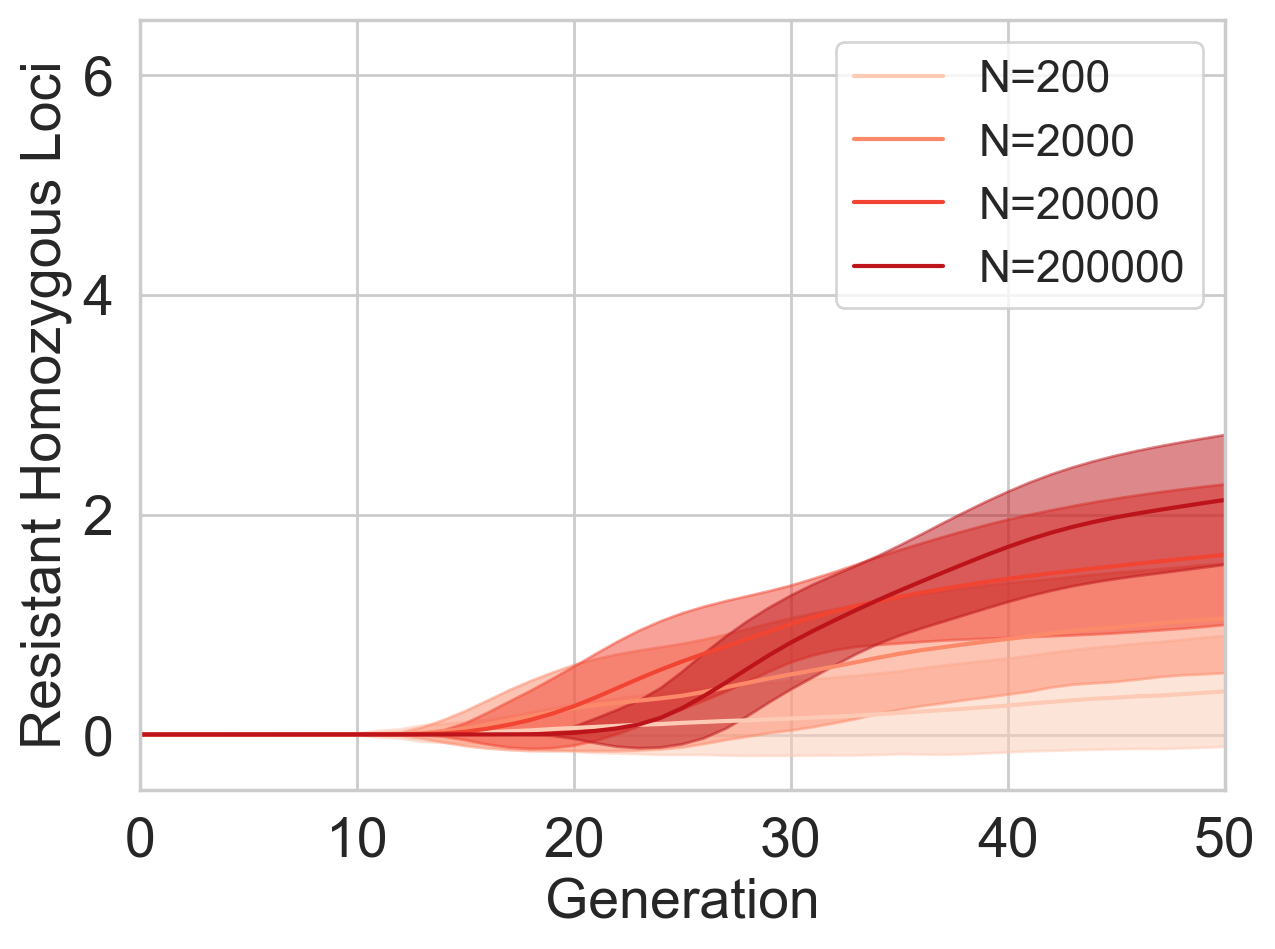

In [280]:
H_2=CalculateNumerOfMutatedAlleles(dynamics_h200+dynamics_m200)
H_3=CalculateNumerOfMutatedAlleles(dynamics_h2000+dynamics_m2000)
H_4=CalculateNumerOfMutatedAlleles(dynamics_h20000+dynamics_m20000)
H_5=CalculateNumerOfMutatedAlleles(dynamics_h200000+dynamics_m200000)

# Create Seaborn figure
sns.set_theme(style="whitegrid")
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

plt.figure(figsize=(7, 5), dpi=200)

# Color palette from 'Greens'
if X==0.0:
    palette = sns.color_palette("PuBu", 4)
    print('herma')
elif X==1:
    palette = sns.color_palette("Reds", 4)
    print ('dio')
else:
    print ('AndroDioecious,X= ', X)
    palette = sns.color_palette("Greens", 4)  #PuBu, Greens, Reds
    

# Plot each dataset directly without Pandas DataFrame
for i, H in enumerate([H_2, H_3, H_4, H_5]):
    x = range(len(H[0]))
    y = np.mean(H, axis=0)
    err = np.std(H, axis=0)
    label = ["N=200", "N=2000", "N=20000", "N=200000"][i]
    sns.lineplot(x=x, y=y, label=label, color=palette[i])
    plt.fill_between(x, y - err, y + err, color=palette[i], alpha=0.5)
plt.xlim(0,500)
plt.ylim([-0.5,6.5])

plt.xlabel("Generation", fontsize=20)
plt.ylabel("Resistant Homozygous Loci",fontsize=20)

plt.legend(fontsize=16)

plt.savefig('FigNumberOfHomozLociL'+str(loci)+'X'+str(X)+'D'+str(dominance)+'.png',bbox_inches='tight')

plt.show()

plt.figure(figsize=(7, 5), dpi=200)

# Color palette from 'Greens'
if X==0.0:
    palette = sns.color_palette("PuBu", 4)
    print('herma')
elif X==1:
    palette = sns.color_palette("Reds", 4)
    print ('dio')
else:
    print ('AndroDioecious,X= ', X)
    palette = sns.color_palette("Greens", 4)  #PuBu, Greens, Reds
    

# Plot each dataset directly without Pandas DataFrame
for i, H in enumerate([H_2, H_3, H_4, H_5]):
    x = range(len(H[0]))
    y = np.mean(H, axis=0)
    err = np.std(H, axis=0)
    label = ["N=200", "N=2000", "N=20000", "N=200000"][i]
    sns.lineplot(x=x, y=y, label=label, color=palette[i])
    plt.fill_between(x, y - err, y + err, color=palette[i], alpha=0.5)
plt.xlim(0,50)
plt.ylim([-0.5,6.5])

plt.xlabel("Generation", fontsize=20)
plt.ylabel("Resistant Homozygous Loci",fontsize=20)

plt.legend(fontsize=16)

plt.savefig('FigZoomNumberOfHomozLociL'+str(loci)+'X'+str(X)+'D'+str(dominance)+'.png',bbox_inches='tight')

plt.show()

## Time to prevalence/ fixation

This is time until which allele got into prevalence given but Thresh. 

In [197]:

D0N200X0frequency=np.load(my_path+'WormsT500N200L2E0X0.0D0all_frequency.npy')
D0N2000X0frequency=np.load(my_path+'WormsT500N2000L2E0X0.0D0all_frequency.npy')
D0N20000X0frequency=np.load(my_path+'WormsT500N20000L2E0X0.0D0all_frequency.npy')
D0N200000X0frequency=np.load(my_path+'WormsT500N200000L2E0X0.0D0all_frequency.npy')

D1N200X0frequency=np.load(my_path+'WormsT500N200L2E0X0.0D1all_frequency.npy')
D1N2000X0frequency=np.load(my_path+'WormsT500N2000L2E0X0.0D1all_frequency.npy')
D1N20000X0frequency=np.load(my_path+'WormsT500N20000L2E0X0.0D1all_frequency.npy')
D1N200000X0frequency=np.load(my_path+'WormsT500N200000L2E0X0.0D1all_frequency.npy')



D0N200X5frequency=np.load(my_path+'WormsT500N200L2E0X0.5D0all_frequency.npy')
D0N2000X5frequency=np.load(my_path+'WormsT500N2000L2E0X0.5D0all_frequency.npy')
D0N20000X5frequency=np.load(my_path+'WormsT500N20000L2E0X0.5D0all_frequency.npy')
D0N200000X5frequency=np.load(my_path+'WormsT500N200000L2E0X0.5D0all_frequency.npy')

D1N200X5frequency=np.load(my_path+'WormsT500N200L2E0X0.5D1all_frequency.npy')
D1N2000X5frequency=np.load(my_path+'WormsT500N2000L2E0X0.5D1all_frequency.npy')
D1N20000X5frequency=np.load(my_path+'WormsT500N20000L2E0X0.5D1all_frequency.npy')
D1N200000X5frequency=np.load(my_path+'WormsT500N200000L2E0X0.5D1all_frequency.npy')


D0N200X1frequency=np.load(my_path+'WormsT500N200L2E0X1.0D0all_frequency.npy')
D0N2000X1frequency=np.load(my_path+'WormsT500N2000L2E0X1.0D0all_frequency.npy')
D0N20000X1frequency=np.load(my_path+'WormsT500N20000L2E0X1.0D0all_frequency.npy')
D0N200000X1frequency=np.load(my_path+'WormsT500N200000L2E0X1.0D0all_frequency.npy')

D1N200X1frequency=np.load(my_path+'WormsT500N200L2E0X1.0D1all_frequency.npy')
D1N2000X1frequency=np.load(my_path+'WormsT500N2000L2E0X1.0D1all_frequency.npy')
D1N20000X1frequency=np.load(my_path+'WormsT500N20000L2E0X1.0D1all_frequency.npy')
D1N200000X1frequency=np.load(my_path+'WormsT500N200000L2E0X1.0D1all_frequency.npy')


In [201]:
print (np.shape(D1N200X1frequency))

(100, 501, 2)


In [267]:
x=np.array([1,2,3])
zz=x>2
print (zz, x)
first_true_index = np.argmax(zz)
if zz[first_true_index]:
    print ('it was found, returninhg', first_true_index)
else:
    print ('none found')


[False False  True] [1 2 3]
it was found, returninhg 2


In [737]:
def CalcTimeToFixation(frequency,  myN, X, myD, myL,Thresh=0.95) :
    
    R, T, Dim=np.shape(frequency)
    print (R, T, Dim)
    gen_time=(np.linspace(0,T-1, T))
    frequency_above=frequency>Thresh
    first_fixed=np.full((R, Dim), np.nan)
    first_reverted=np.full((R, Dim), np.nan) 
    for i in range (R):
        for j in range (Dim):
            first_true_index = np.argmax(frequency_above[i,:,j])
            if frequency_above[i,first_true_index,j]:
                first_fixed[i,j]=first_true_index
            else: 
                #print ('none found')
                first_fixed[i,j]=T+250
            
 
    if X==0.0:
        palette = sns.color_palette("PuBu", 2)
        print('herma')
    elif X==1:
        palette = sns.color_palette("Reds", 2)
        print ('dio')
    else:
        print ('AndroDioecious,X= ', X)
        palette = sns.color_palette("Greens", 2)  #PuBu, Greens, Reds
    # First subplot
    
    fig, axes = plt.subplots(1, Dim, figsize=(15, 5), sharex=True, sharey=True)

    for i in range(Dim):
        sns.heatmap(frequency_above[:, :, i], ax=axes[i],cmap=palette, xticklabels=100, yticklabels=250, vmin=0, vmax=1)  
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, fontsize=8)  # Rotate and reduce font size
        axes[i].set_yticklabels(axes[i].get_yticklabels(), rotation=0, fontsize=8) 

    plt.tight_layout()
    plt.savefig('FrequencyAboveThresL'+str(myL)+'X'+str(X)+'D'+str(myD)+'N'+str(myN)+'.png',bbox_inches='tight')
    plt.show()

    num_digits = int(math.log10(abs(myN)))
    print ('nm',num_digits)
    if X==0.0:
        palette = sns.color_palette("PuBu", 4)
        print('herma')
    elif X==1:
        palette = sns.color_palette("Reds", 4)
        print ('dio')
    else:
        print ('AndroDioecious,X= ', X)
        palette = sns.color_palette("Greens", 4)  #PuBu, Greens, Reds
    
    fig, axes = plt.subplots(1, Dim, figsize=(15, 5),  sharey=True)

    for i in range(Dim):
        axes[i].hist(first_fixed[:, i],color=palette[num_digits-2])
        axes[i].set_title(f'Histogram for Locus {i}')
        
    plt.tight_layout()
    #plt.savefig('XTimeToFixationL'+str(myL)+'X'+str(X)+'D'+str(myD)+'N'+str(myN)+'.png',bbox_inches='tight')
    plt.show()
    save_name='TimeToFixL'+str(myL)+'X'+str(X)+'D'+str(myD)+'N'+str(myN)+'.npy'
    np.save(save_name,first_fixed)
    
    #print ('time', gen_time)
    #for i in range (R):
    #    this_f=frequency[i, :,which-1]
    #    #print (this_f)
    #    #plt.plot(this_f)
    #    AllTime=(gen_time[this_f>Thresh])
        
    #    try:
    #        first_fixed.append(AllTime[0])
    #    except IndexError:  # Raised if the array is empty
    #        first_fixed.append(T)

            
        


DataArticle/CombinedDataL6/WormsT500N200L6E0X0.0D0all_frequency.npy
100 501 6
herma


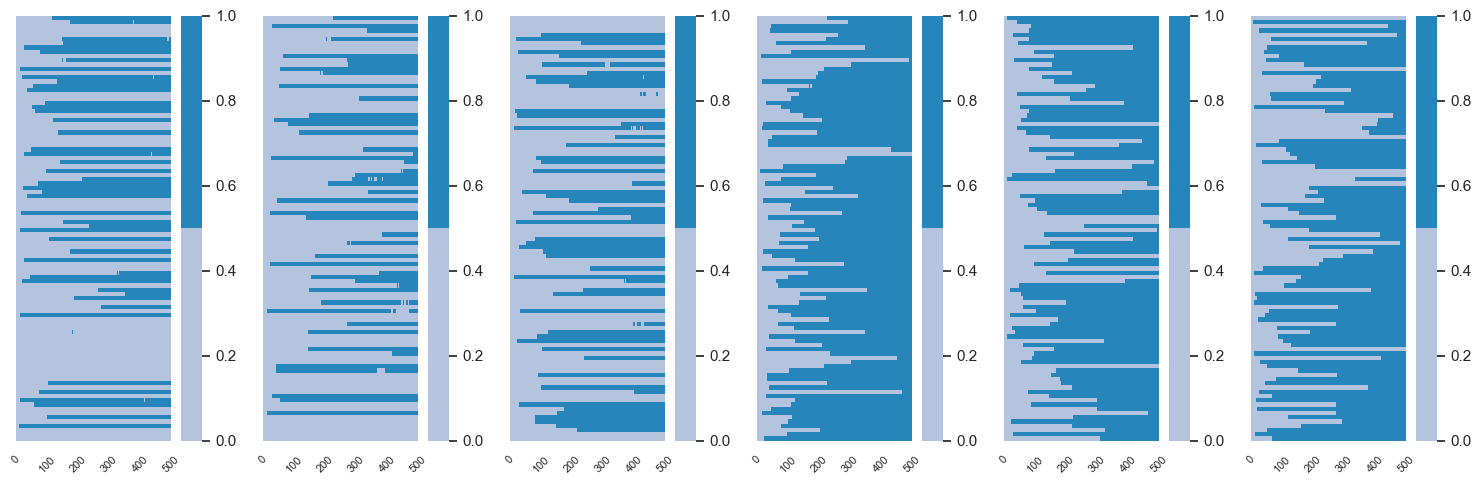

nm 2
herma


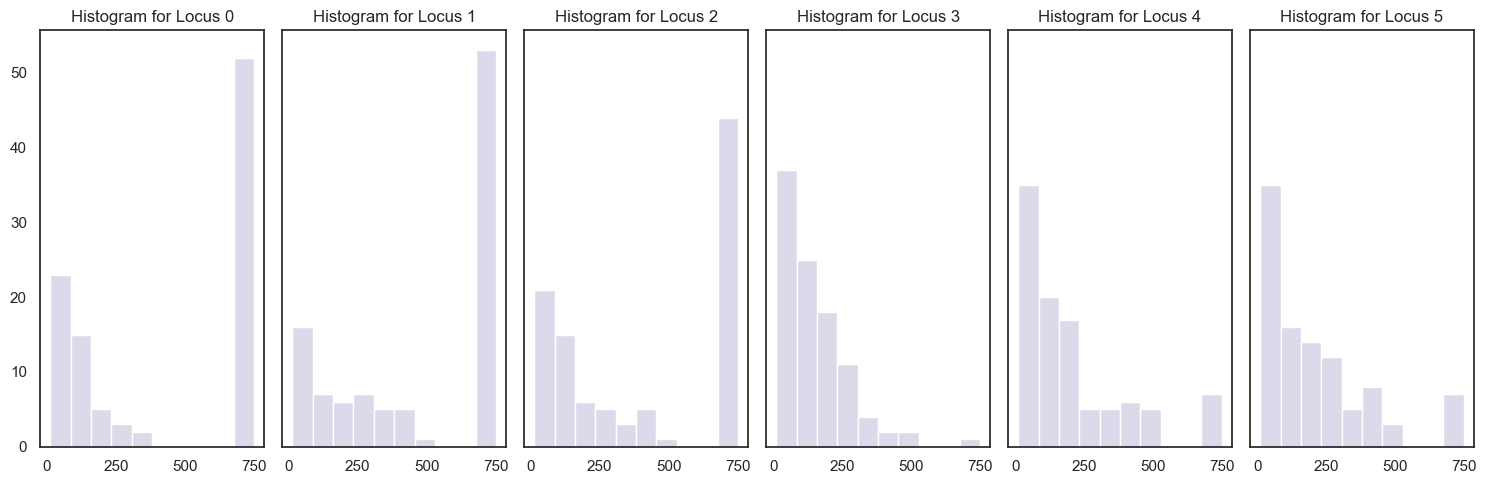

DataArticle/CombinedDataL6/WormsT500N200L6E0X0.0D1all_frequency.npy
100 501 6
herma


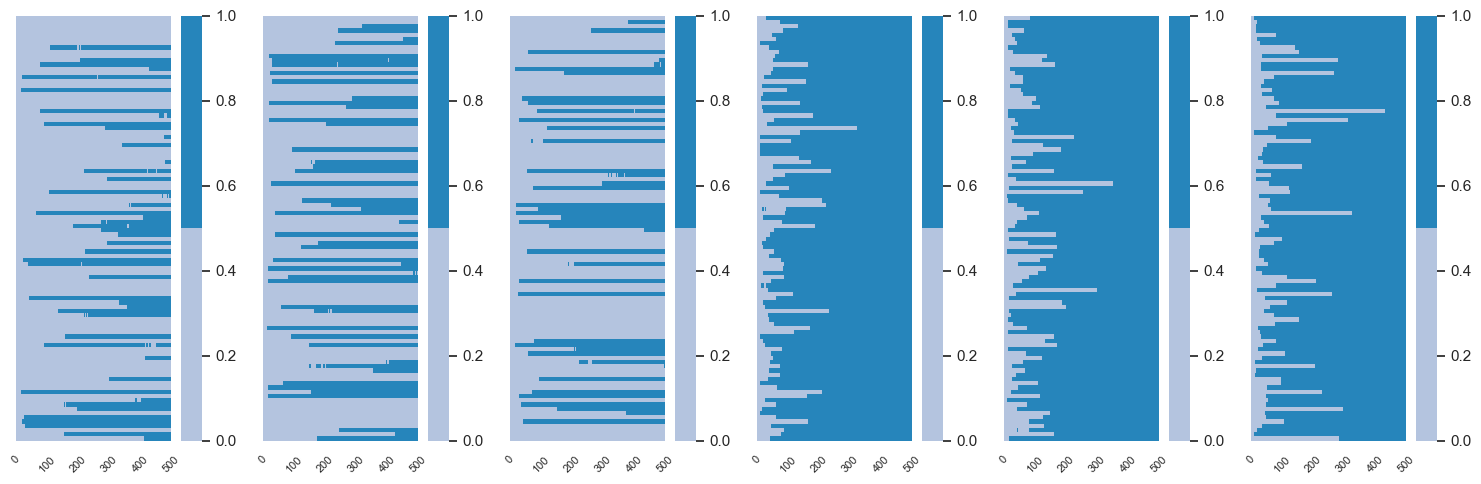

nm 2
herma


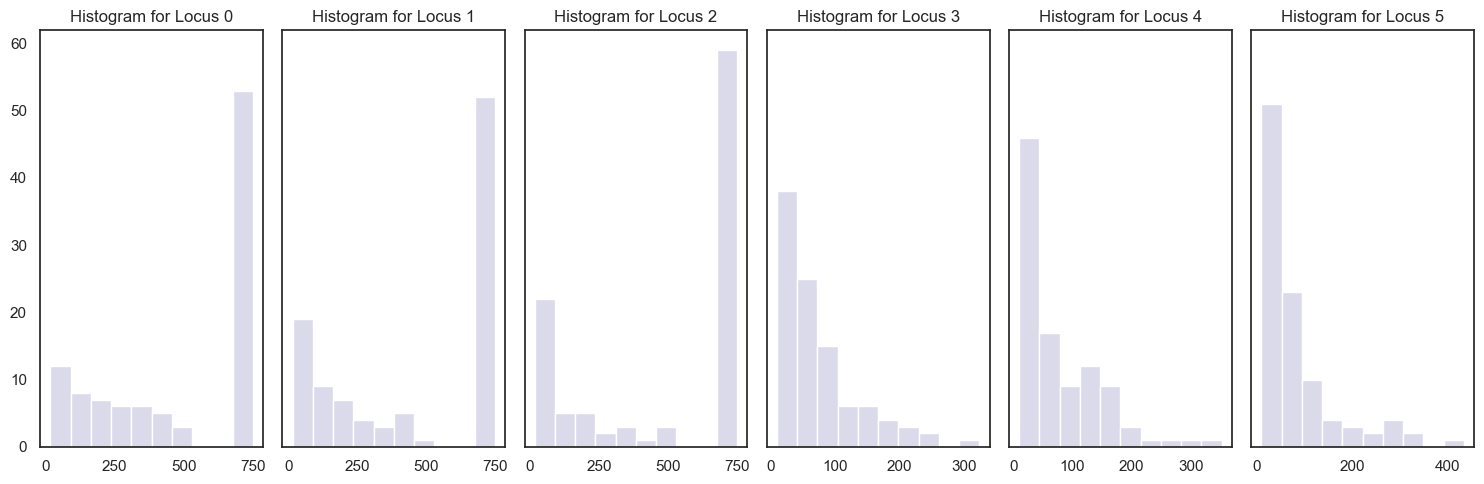

DataArticle/CombinedDataL6/WormsT500N200L6E0X0.5D0all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


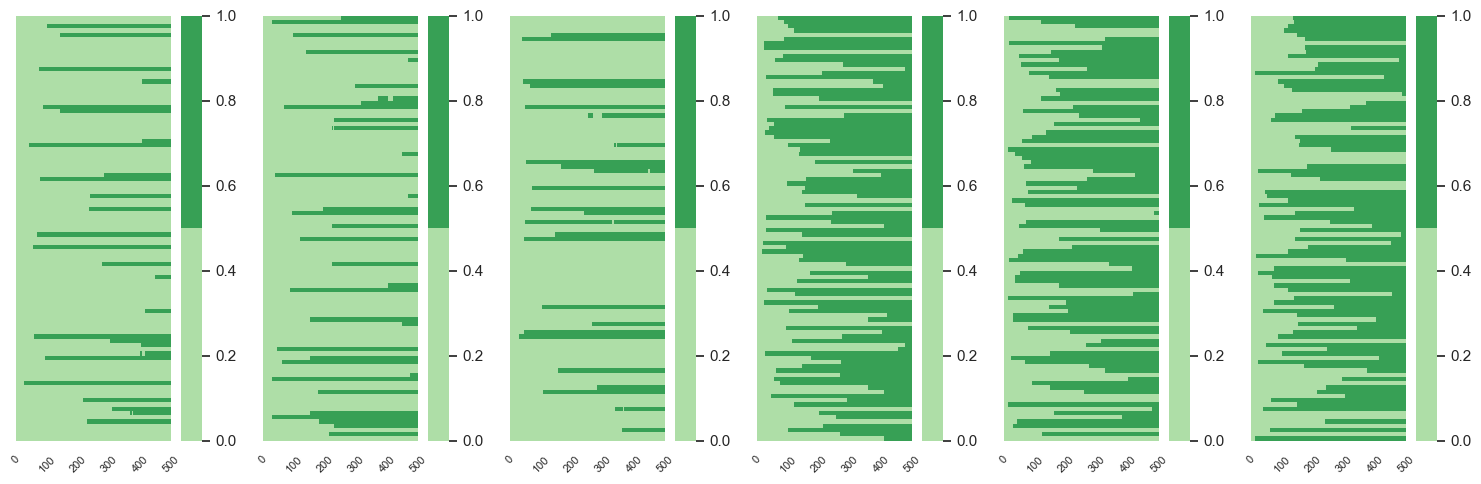

nm 2
AndroDioecious,X=  0.5


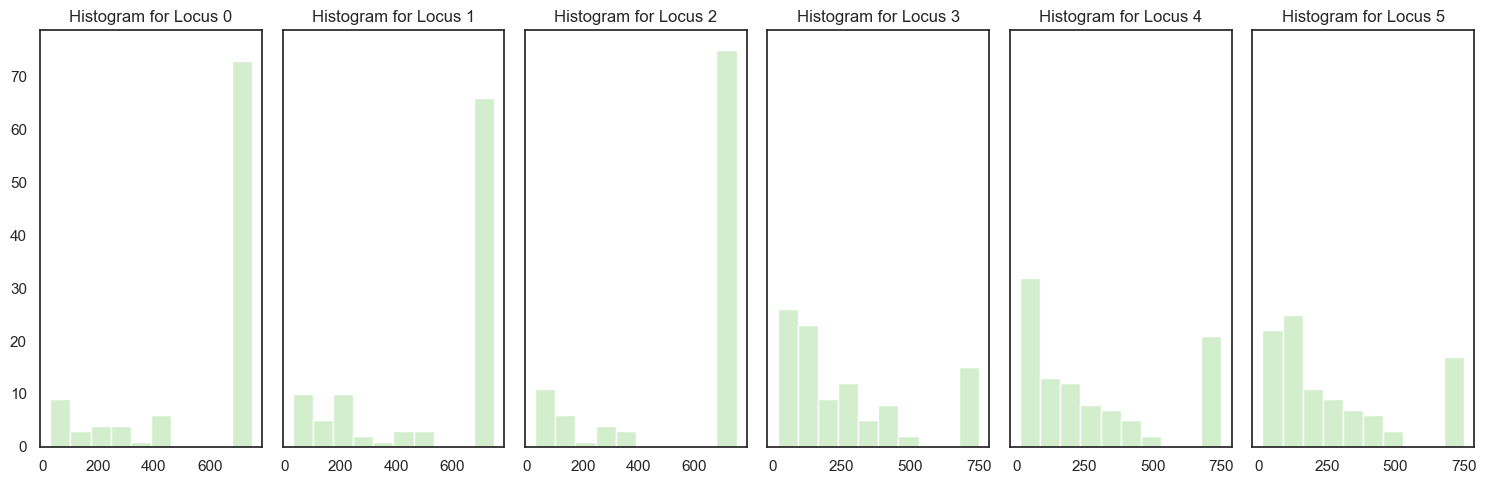

DataArticle/CombinedDataL6/WormsT500N200L6E0X0.5D1all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


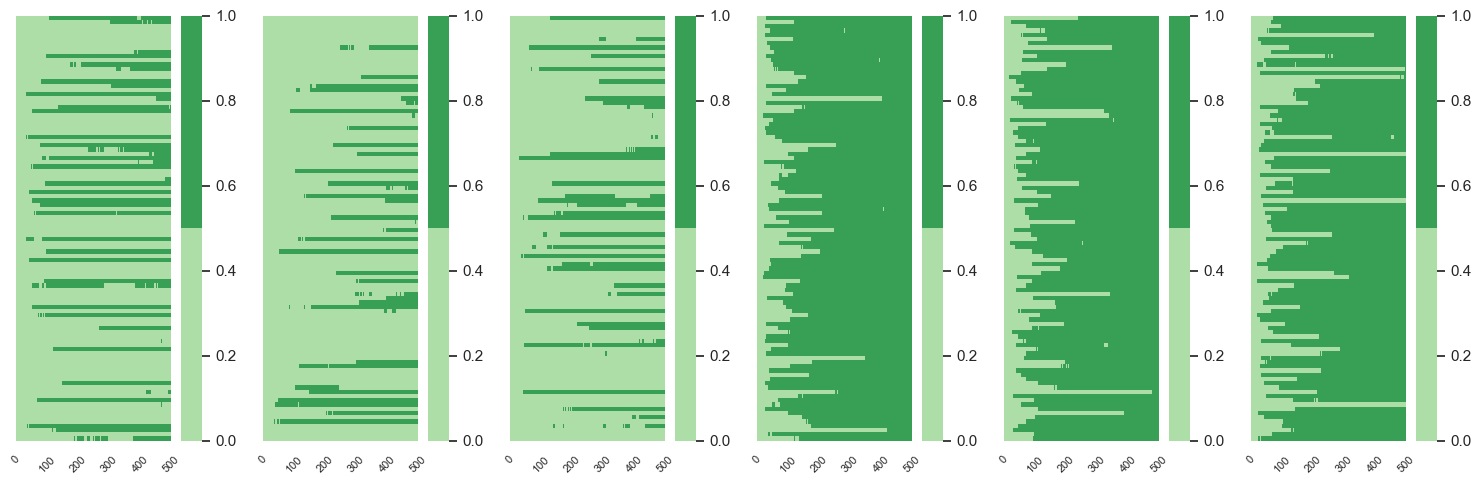

nm 2
AndroDioecious,X=  0.5


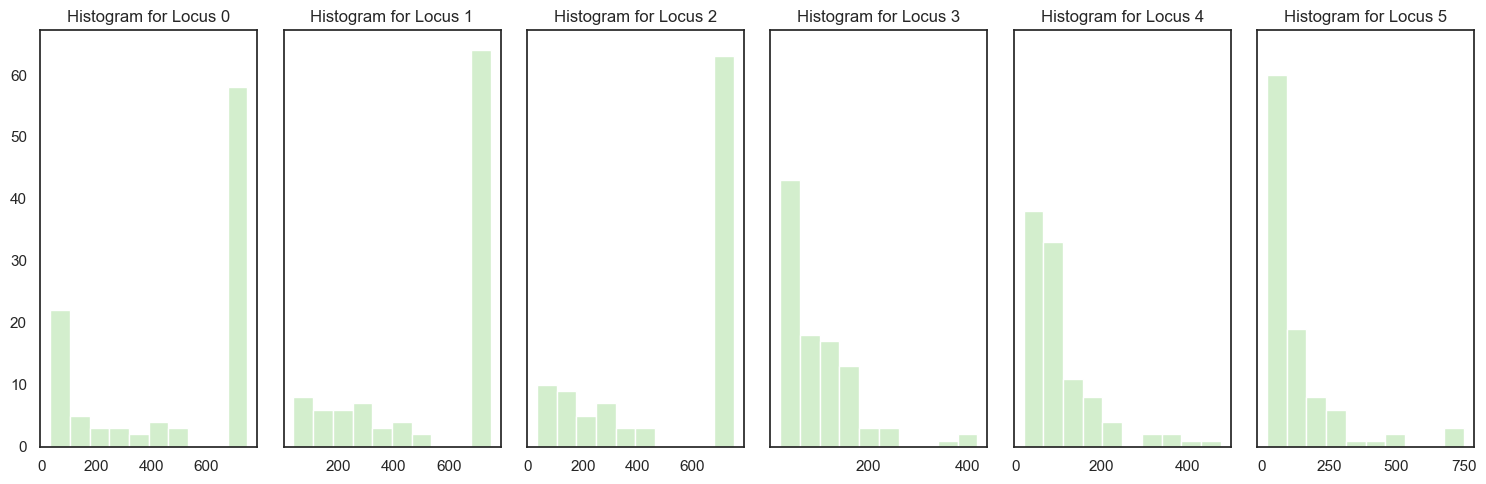

DataArticle/CombinedDataL6/WormsT500N200L6E0X1.0D0all_frequency.npy
100 501 6
dio


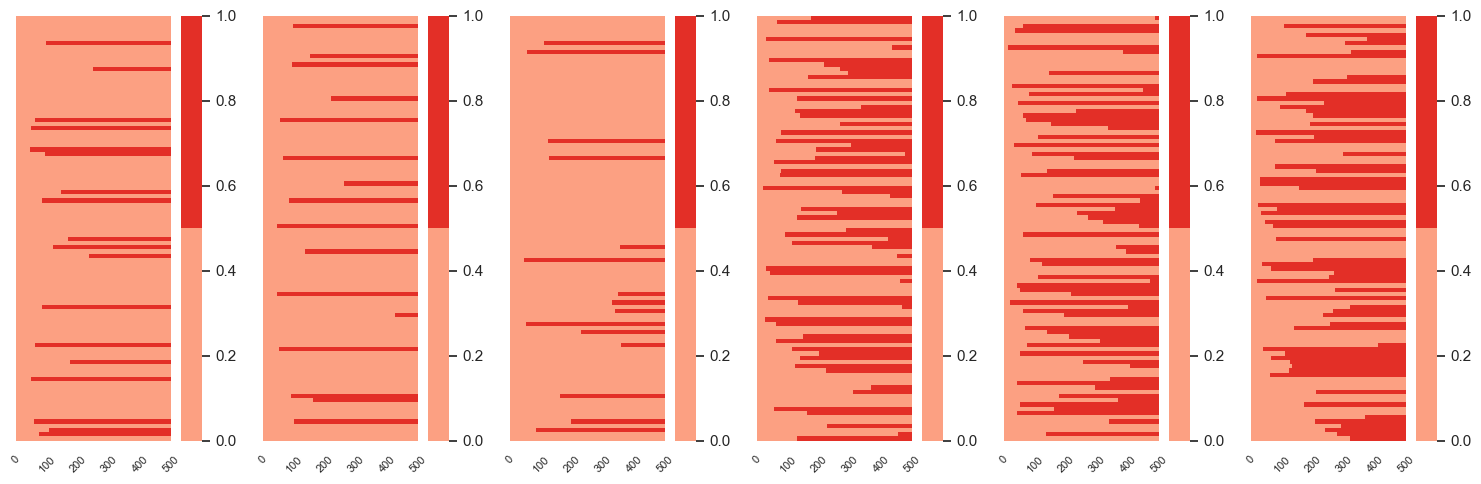

nm 2
dio


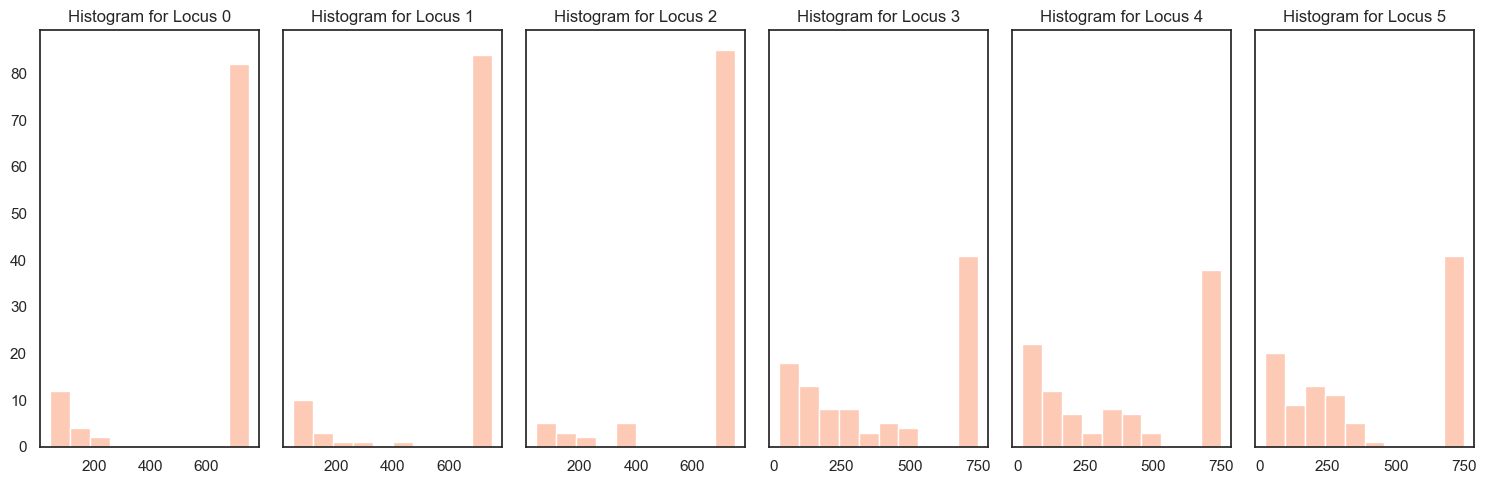

DataArticle/CombinedDataL6/WormsT500N200L6E0X1.0D1all_frequency.npy
100 501 6
dio


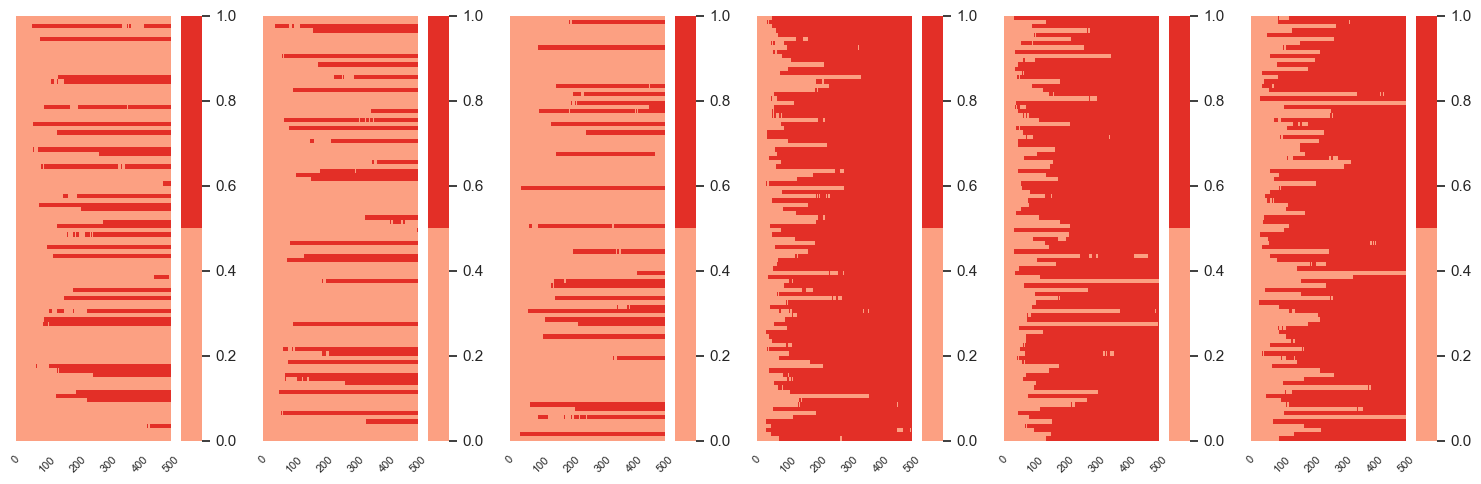

nm 2
dio


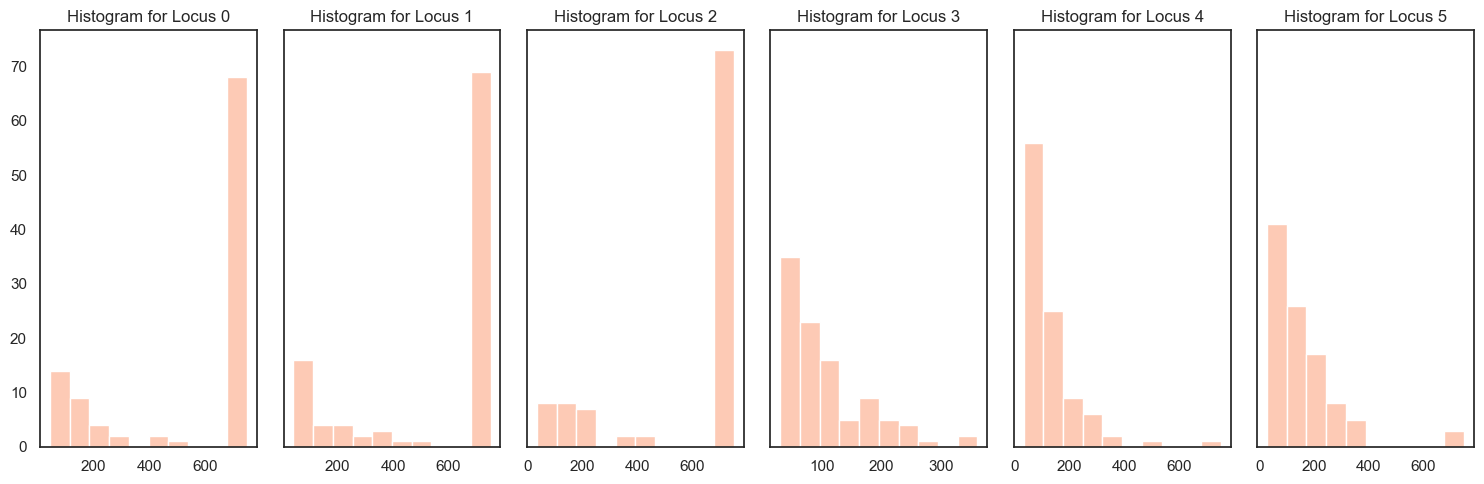

DataArticle/CombinedDataL6/WormsT500N2000L6E0X0.0D0all_frequency.npy
100 501 6
herma


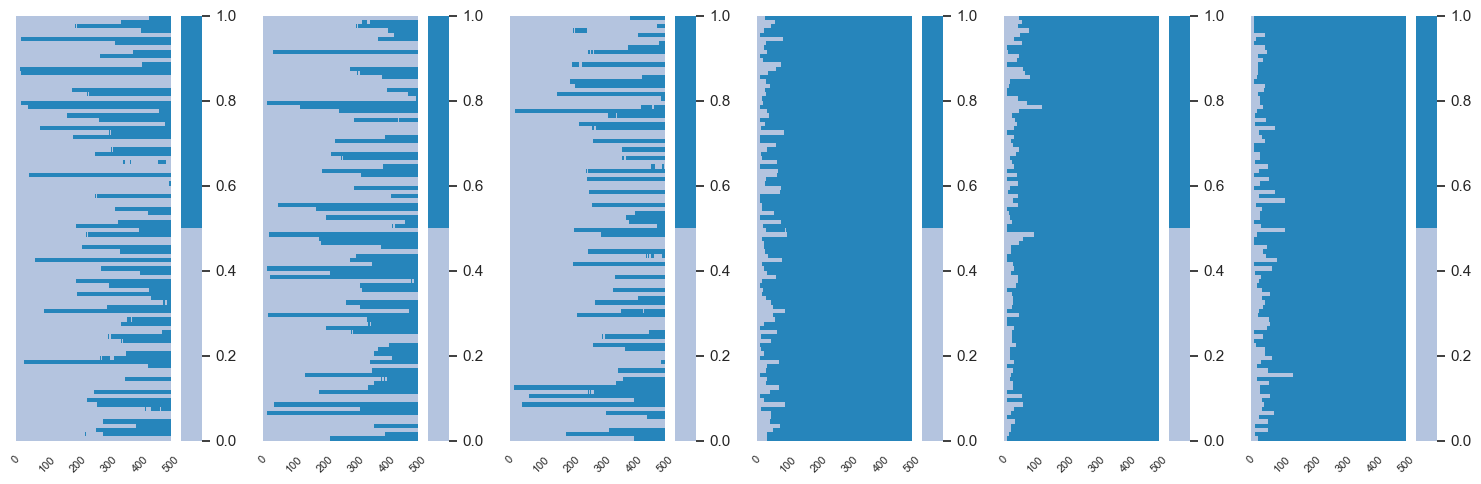

nm 3
herma


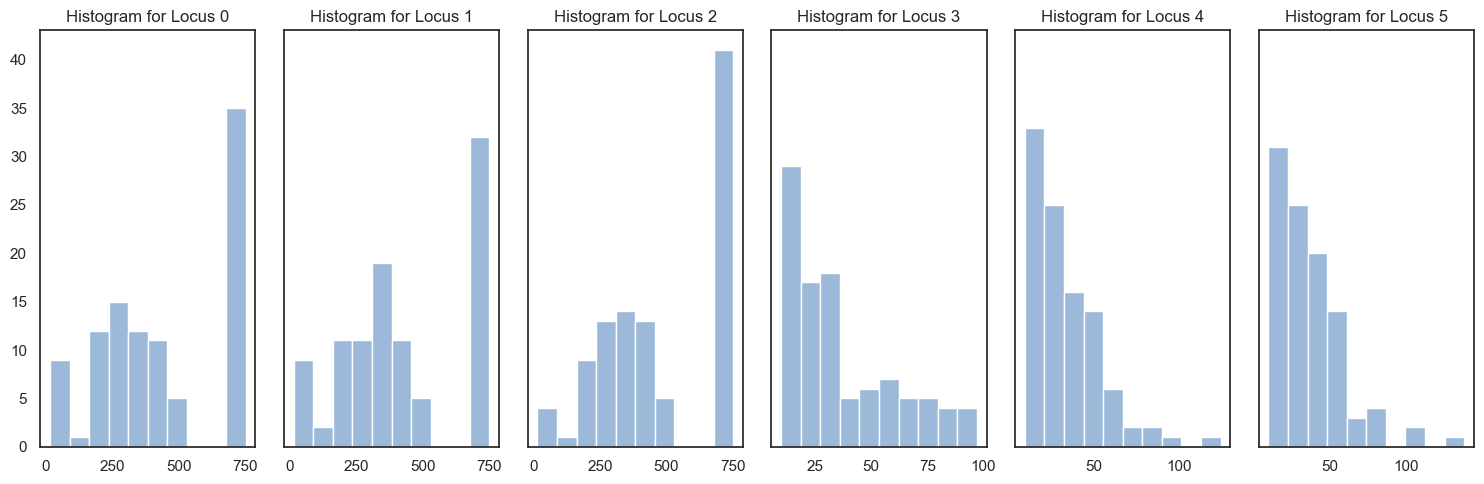

DataArticle/CombinedDataL6/WormsT500N2000L6E0X0.0D1all_frequency.npy
100 501 6
herma


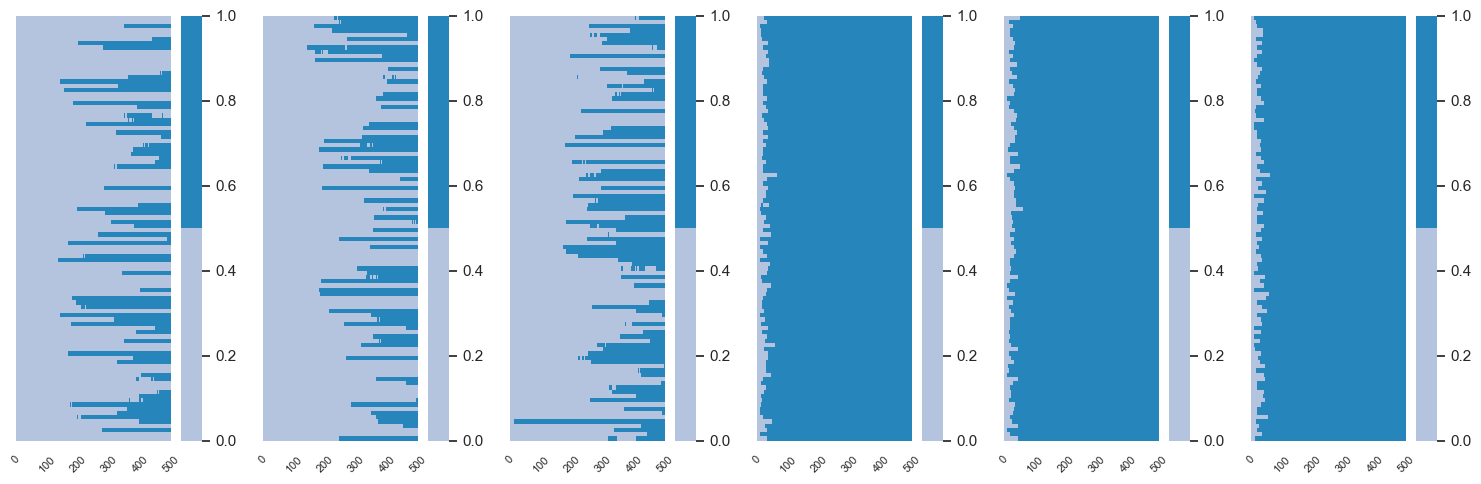

nm 3
herma


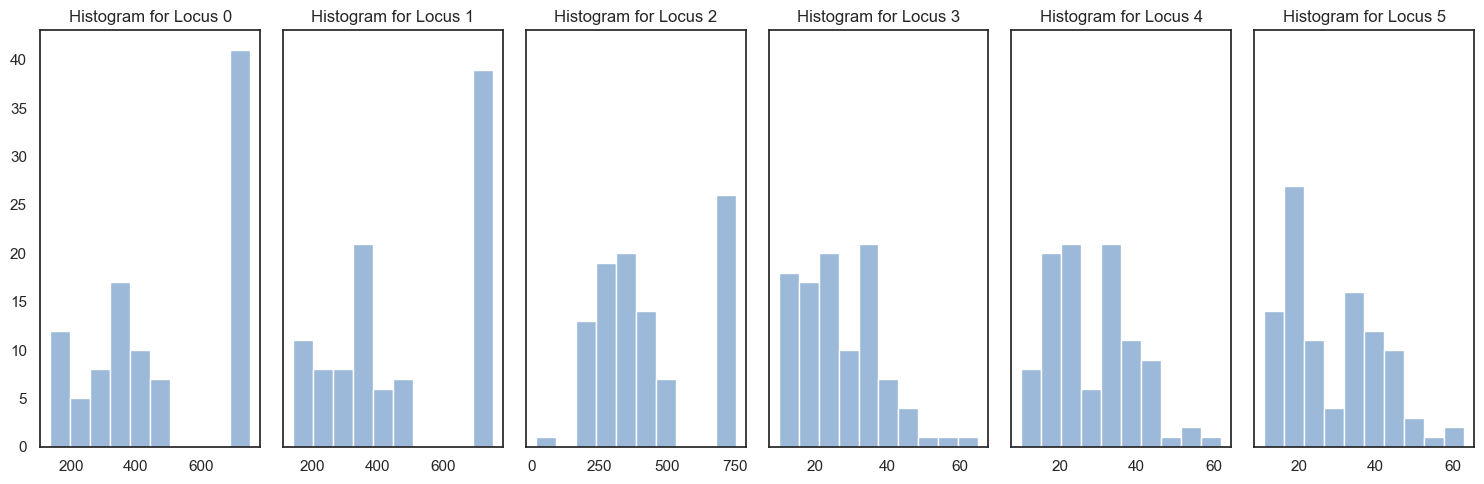

DataArticle/CombinedDataL6/WormsT500N2000L6E0X0.5D0all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


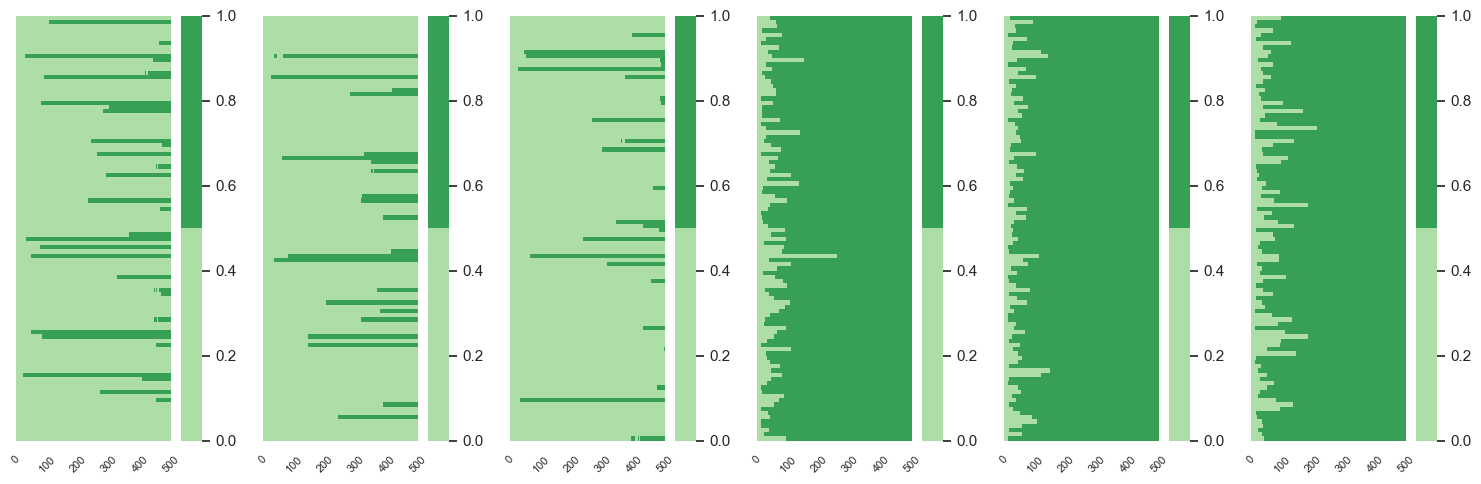

nm 3
AndroDioecious,X=  0.5


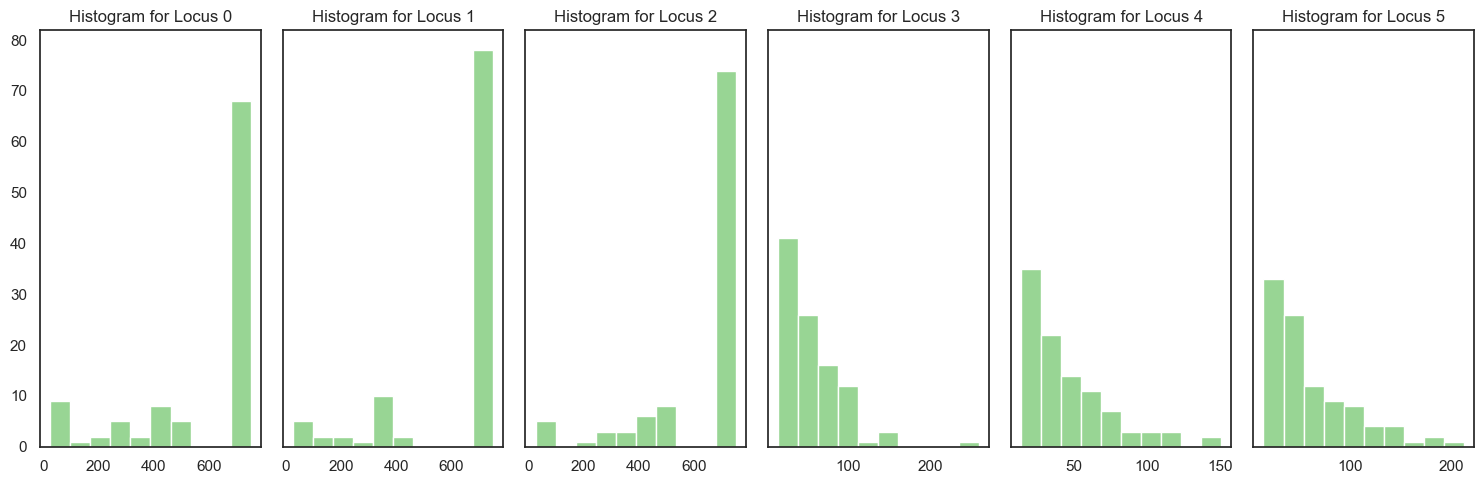

DataArticle/CombinedDataL6/WormsT500N2000L6E0X0.5D1all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


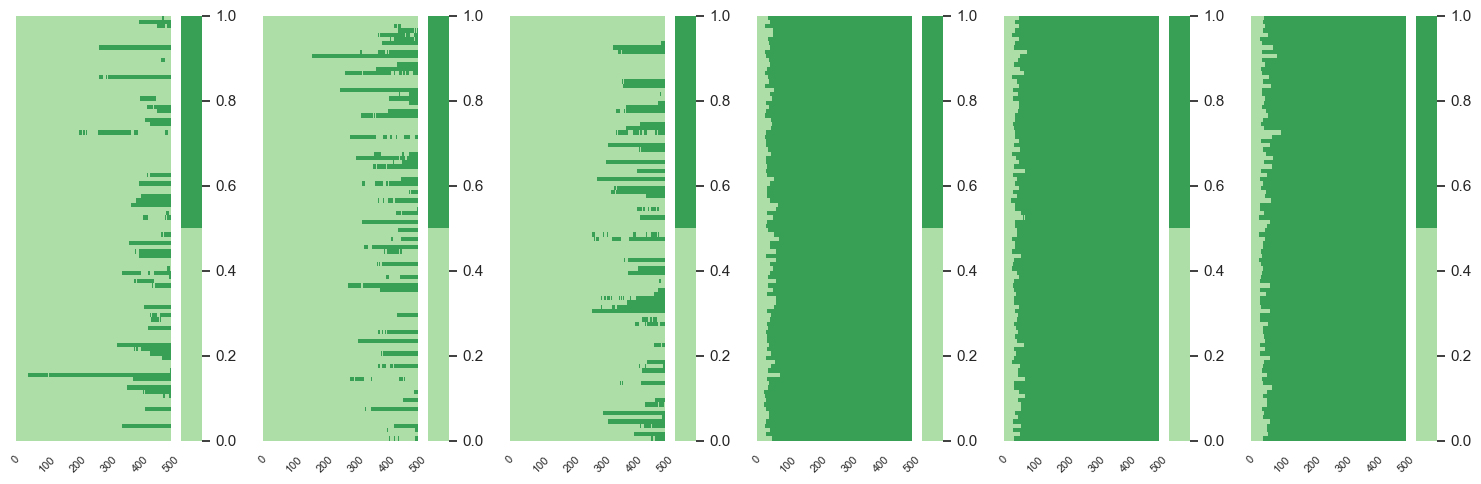

nm 3
AndroDioecious,X=  0.5


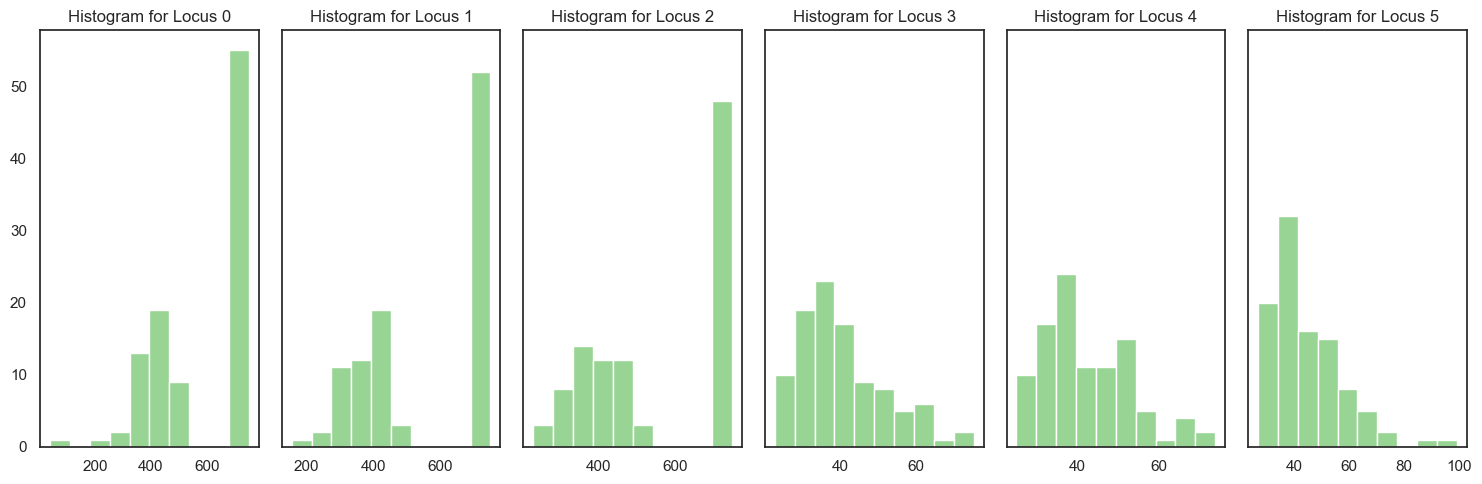

DataArticle/CombinedDataL6/WormsT500N2000L6E0X1.0D0all_frequency.npy
100 501 6
dio


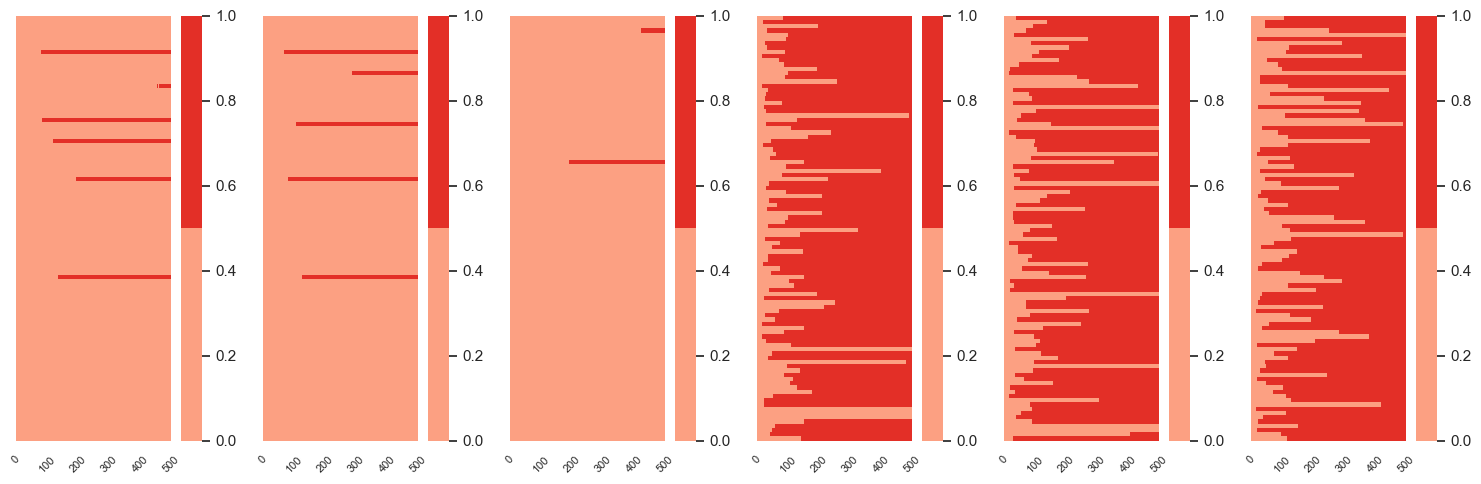

nm 3
dio


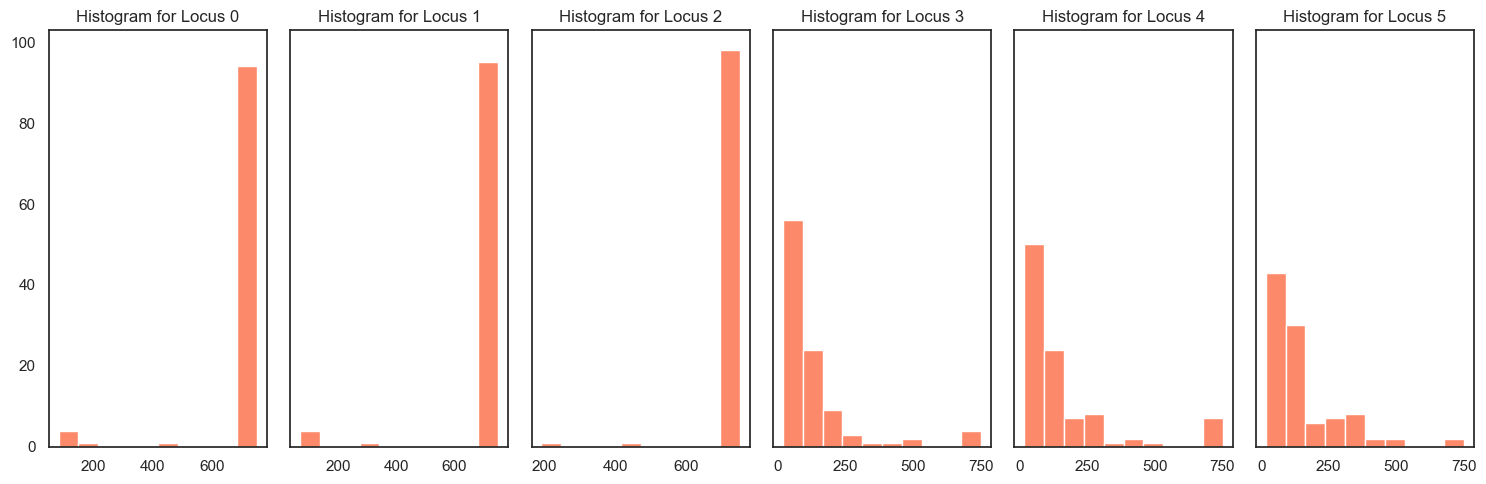

DataArticle/CombinedDataL6/WormsT500N2000L6E0X1.0D1all_frequency.npy
100 501 6
dio


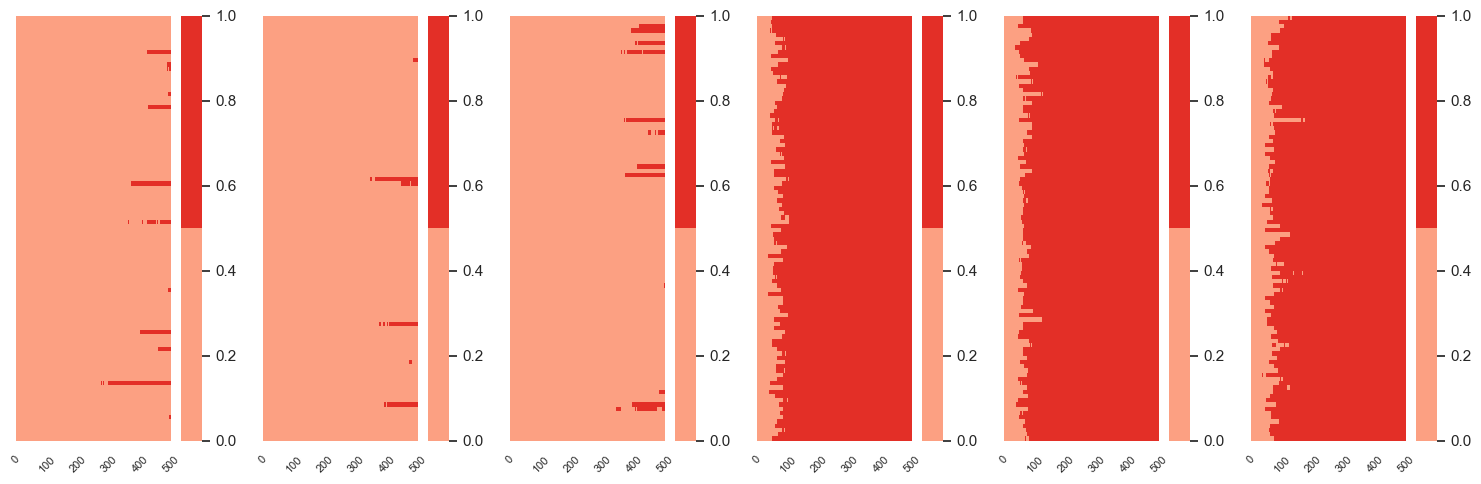

nm 3
dio


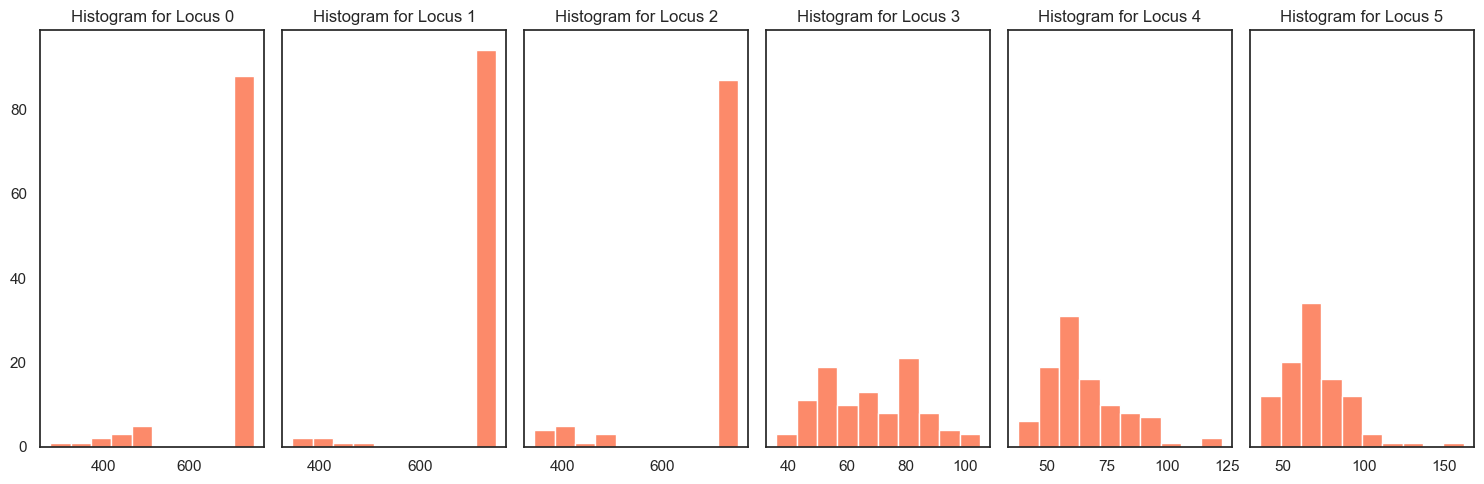

DataArticle/CombinedDataL6/WormsT500N20000L6E0X0.0D0all_frequency.npy
100 501 6
herma


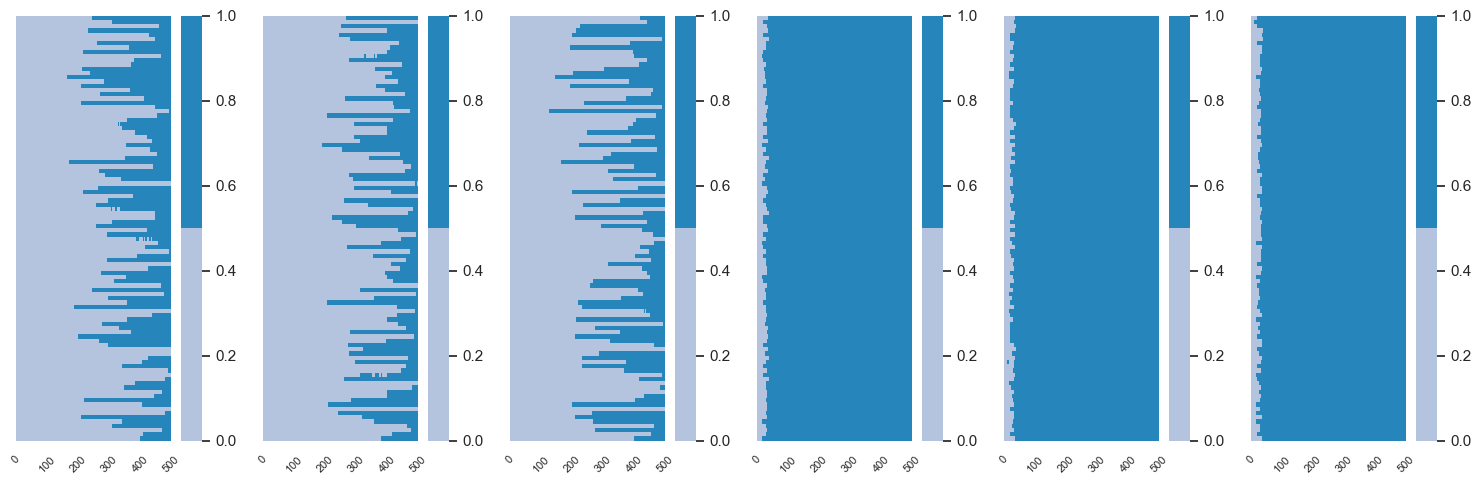

nm 4
herma


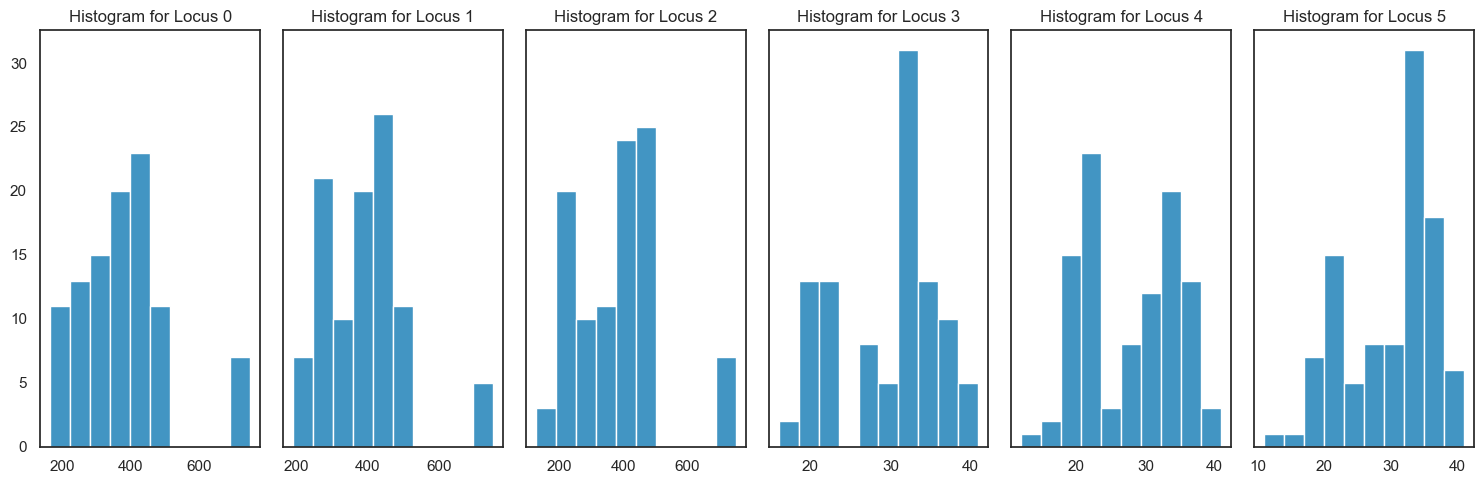

DataArticle/CombinedDataL6/WormsT500N20000L6E0X0.0D1all_frequency.npy
100 501 6
herma


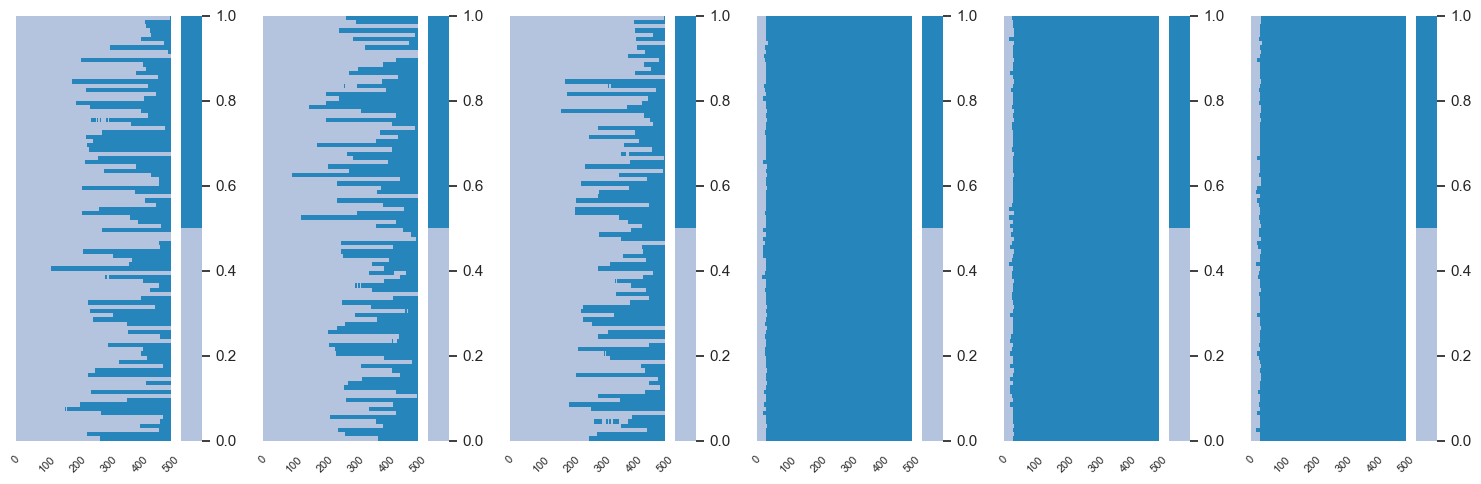

nm 4
herma


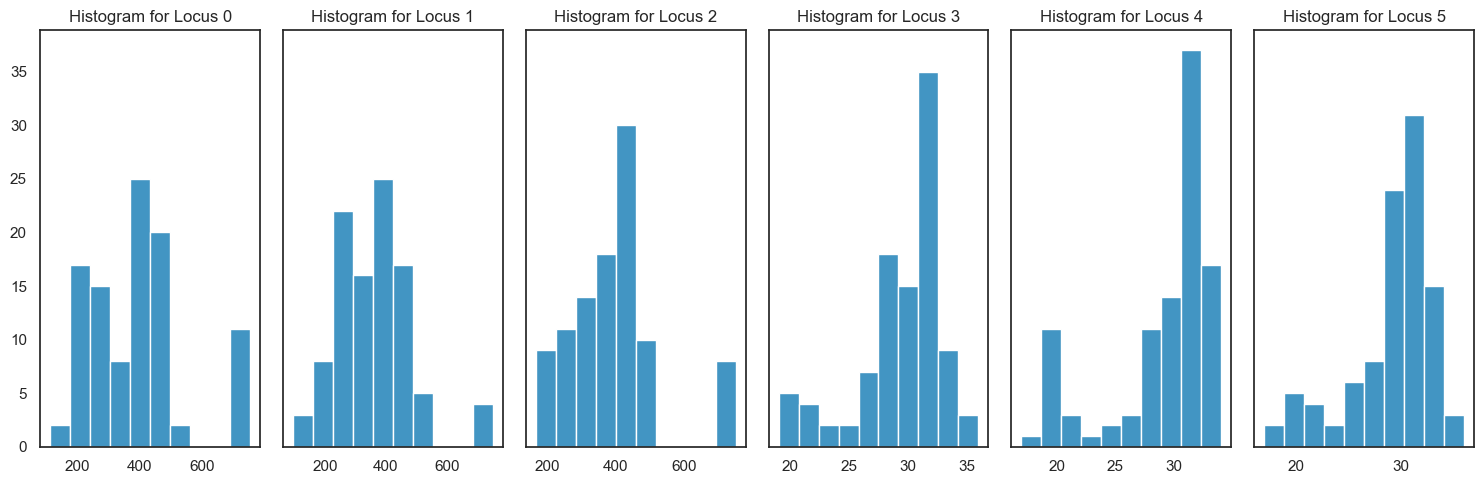

DataArticle/CombinedDataL6/WormsT500N20000L6E0X0.5D0all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


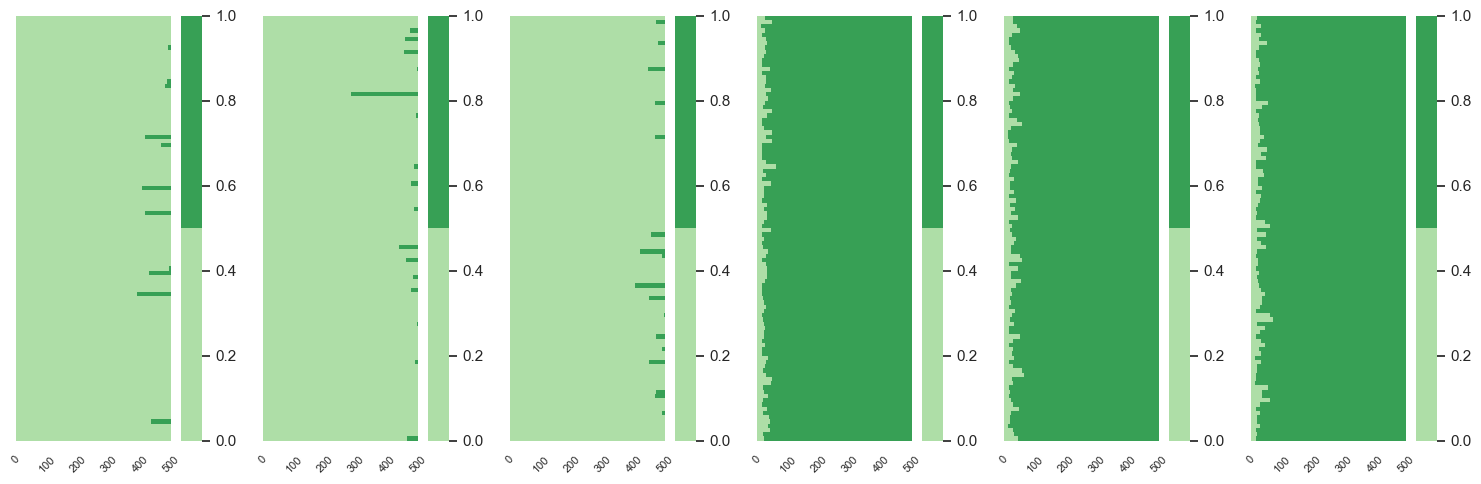

nm 4
AndroDioecious,X=  0.5


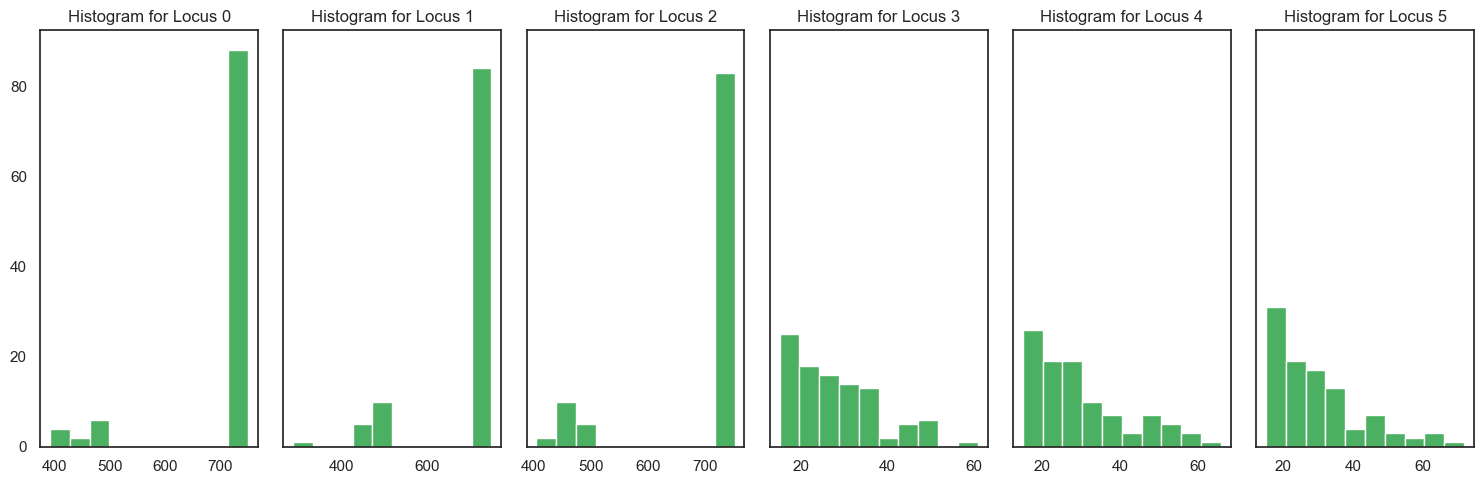

DataArticle/CombinedDataL6/WormsT500N20000L6E0X0.5D1all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


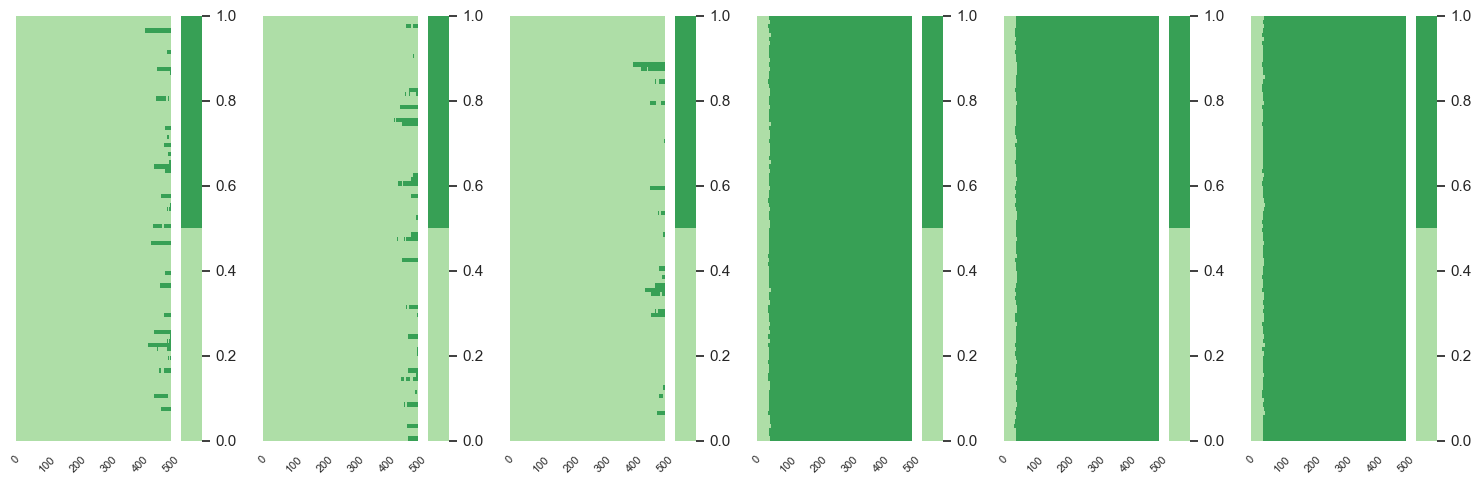

nm 4
AndroDioecious,X=  0.5


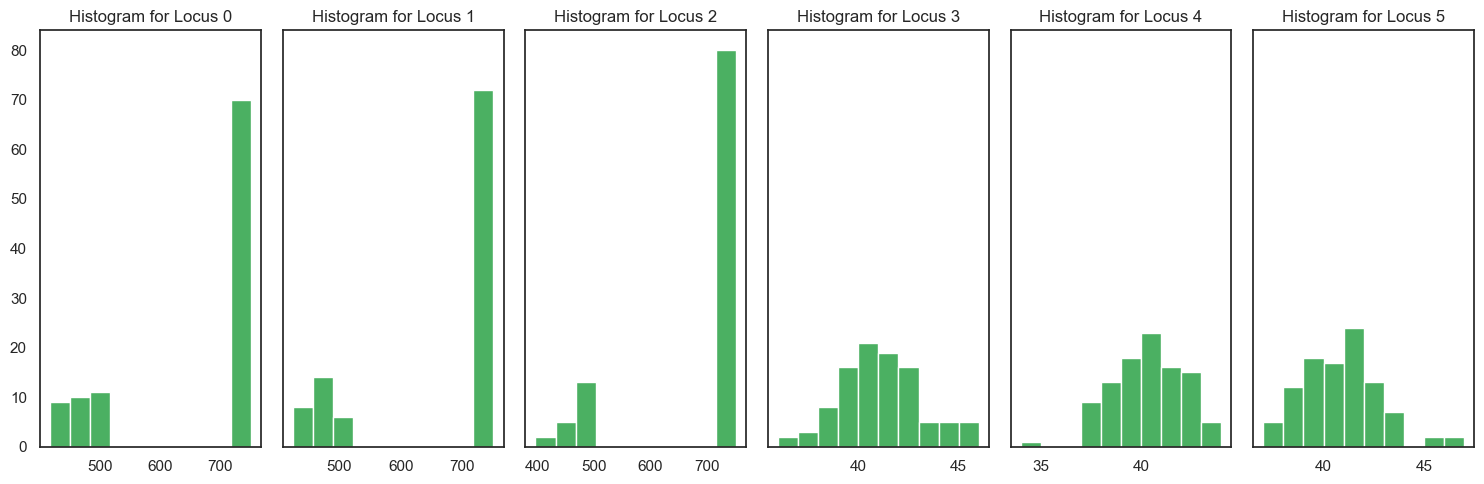

DataArticle/CombinedDataL6/WormsT500N20000L6E0X1.0D0all_frequency.npy
100 501 6
dio


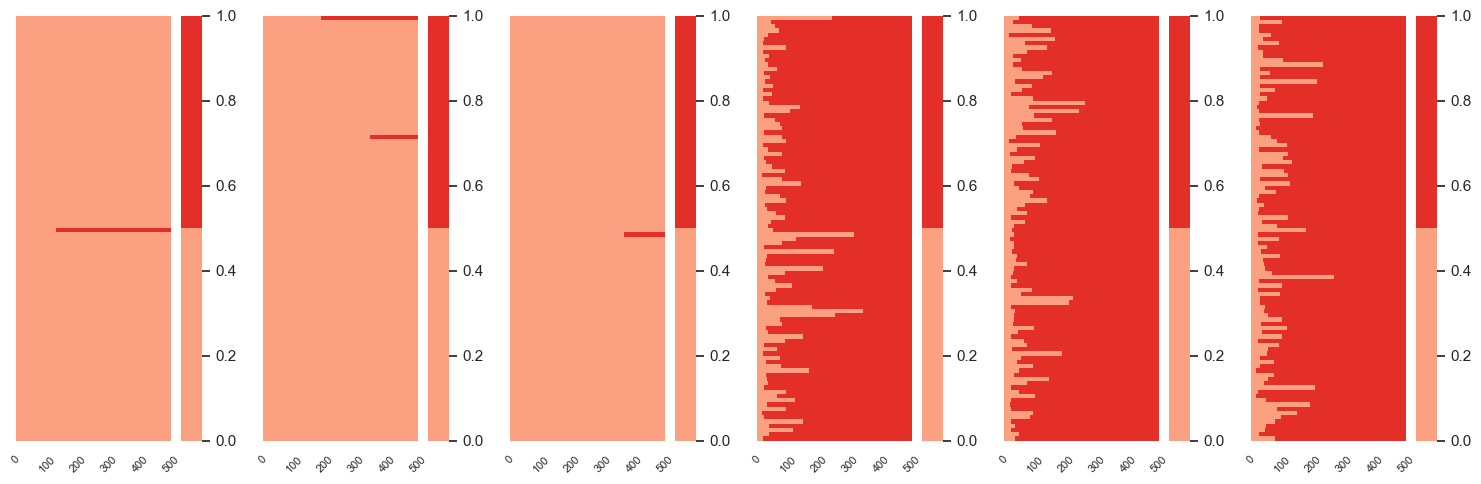

nm 4
dio


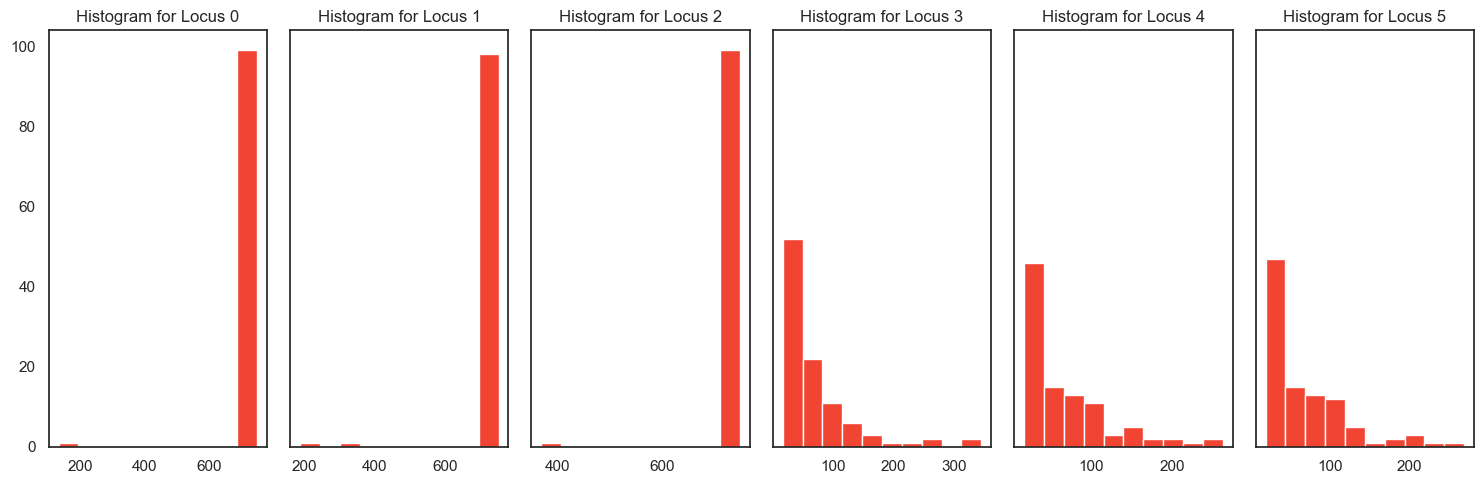

DataArticle/CombinedDataL6/WormsT500N20000L6E0X1.0D1all_frequency.npy
100 501 6
dio


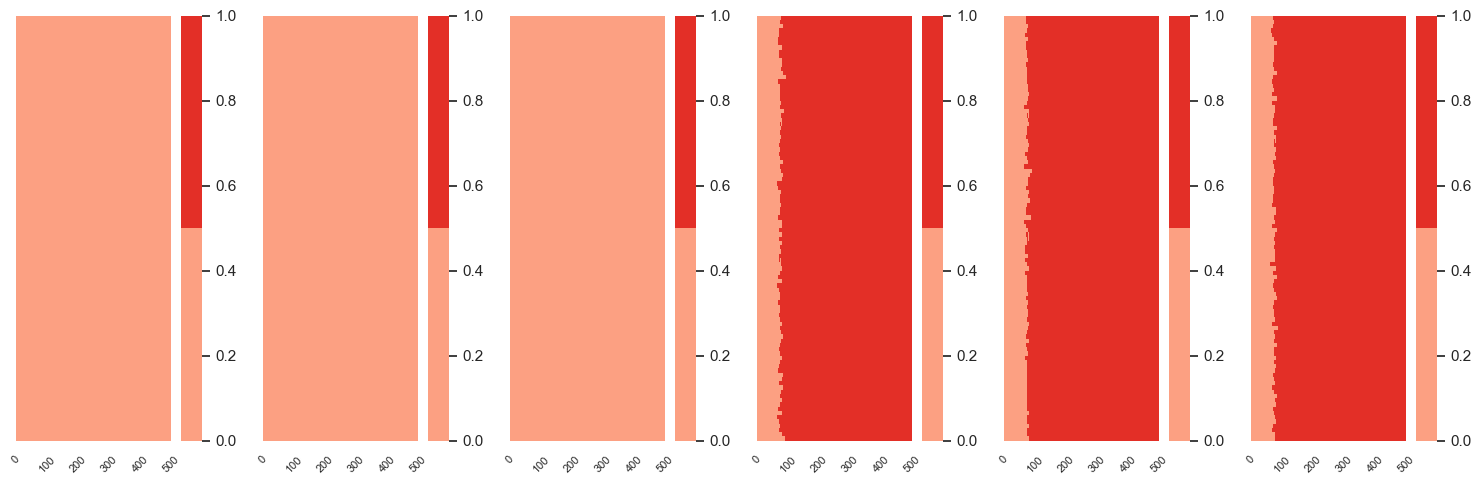

nm 4
dio


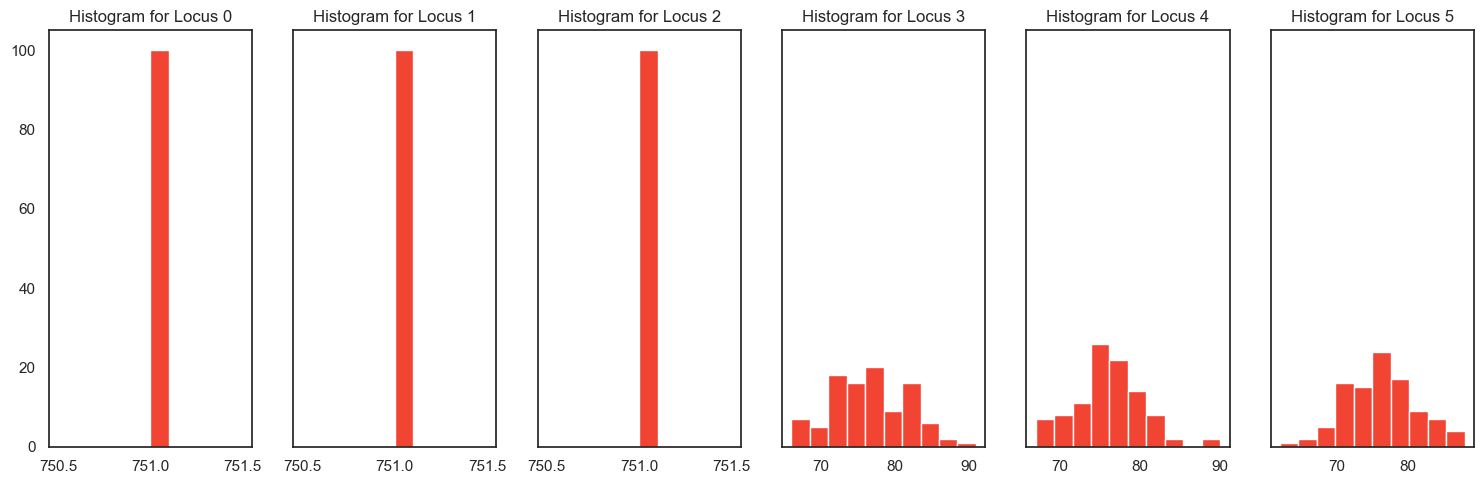

DataArticle/CombinedDataL6/WormsT500N200000L6E0X0.0D0all_frequency.npy
100 501 6
herma


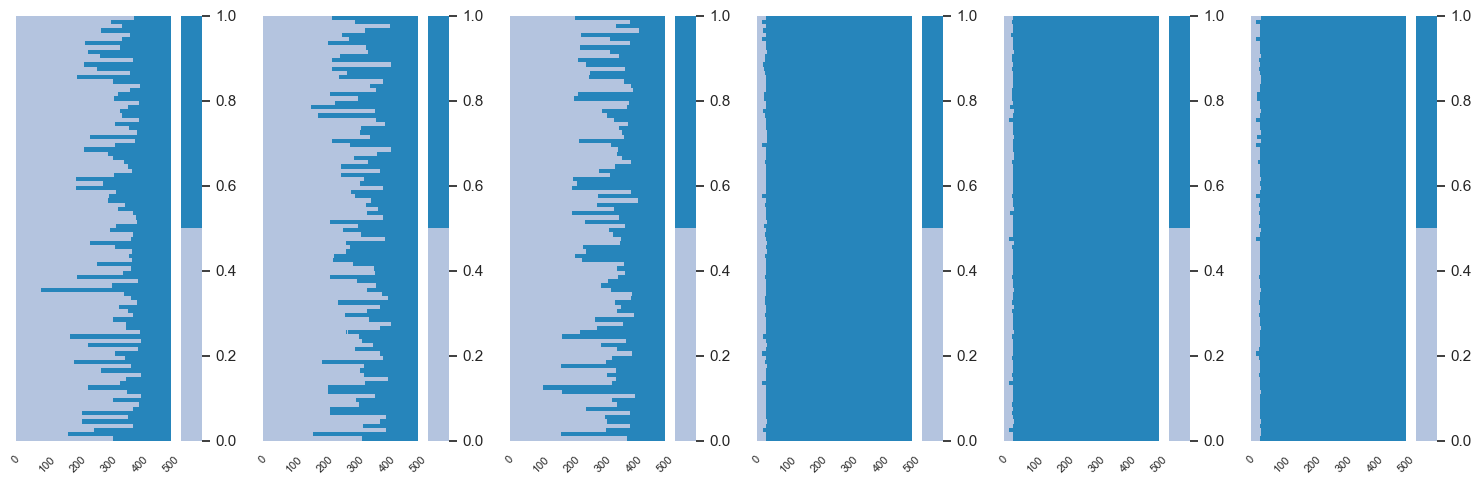

nm 5
herma


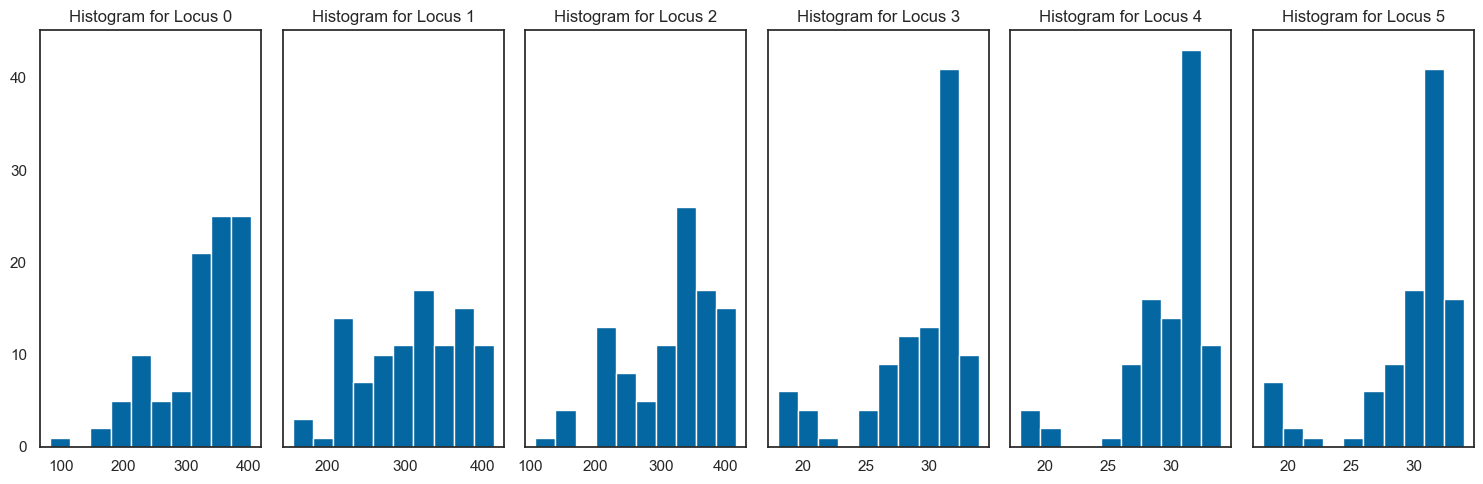

DataArticle/CombinedDataL6/WormsT500N200000L6E0X0.0D1all_frequency.npy
100 501 6
herma


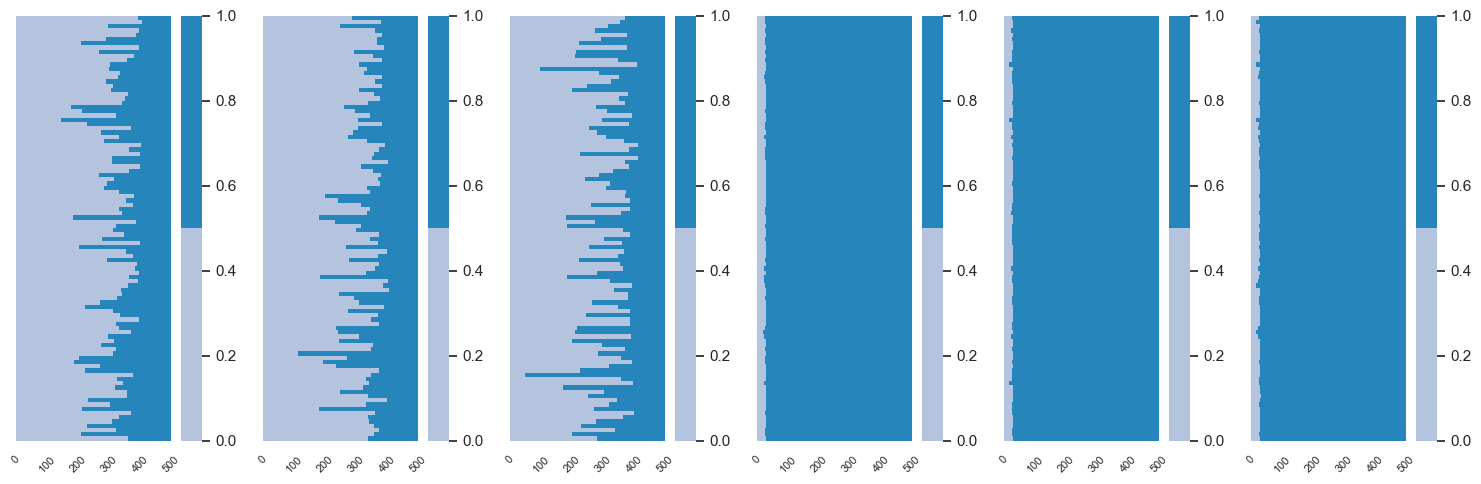

nm 5
herma


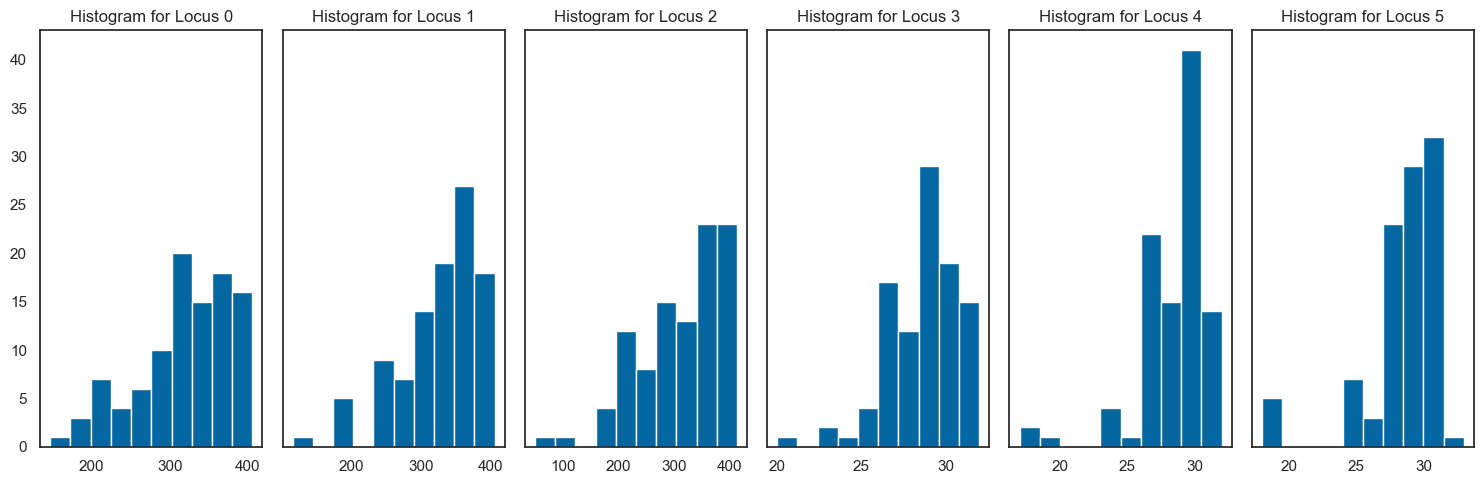

DataArticle/CombinedDataL6/WormsT500N200000L6E0X0.5D0all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


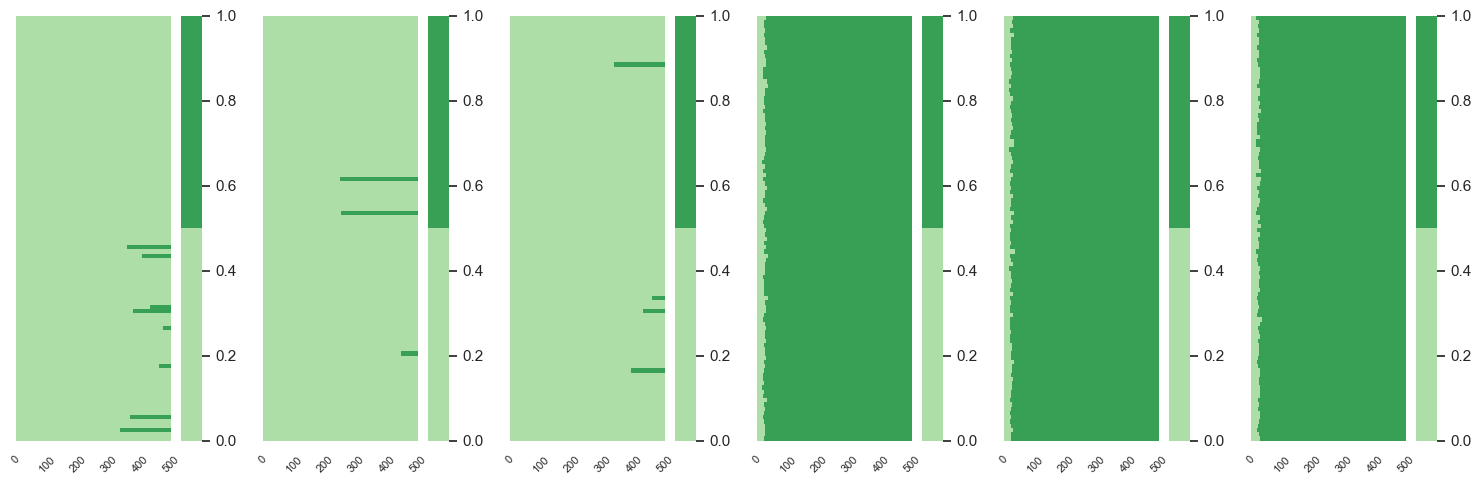

nm 5
AndroDioecious,X=  0.5


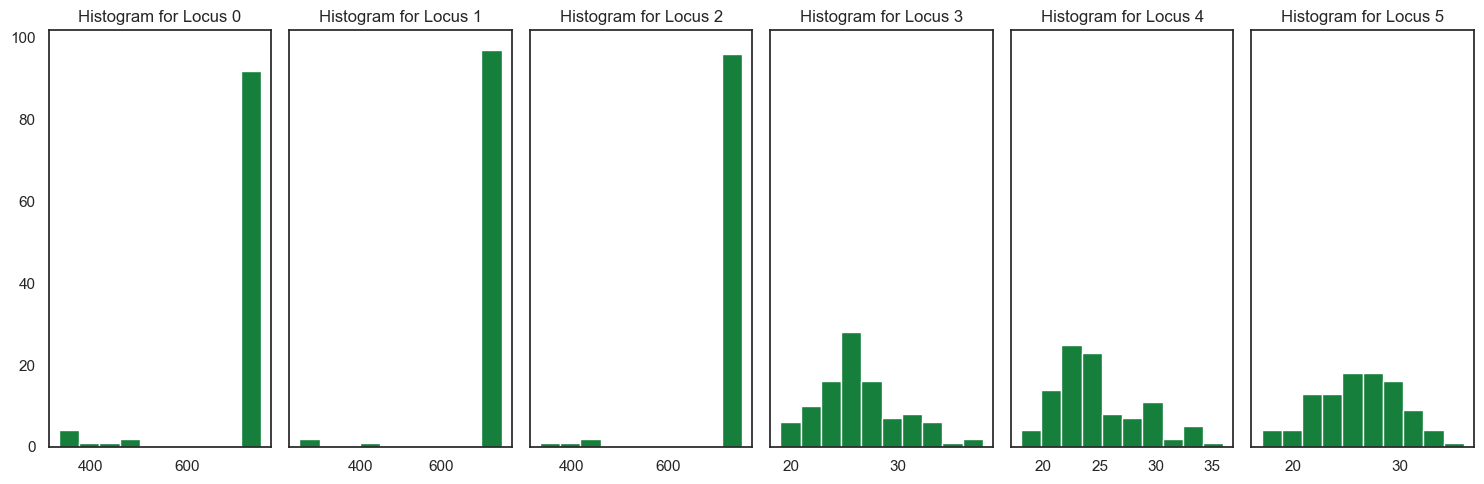

DataArticle/CombinedDataL6/WormsT500N200000L6E0X0.5D1all_frequency.npy
100 501 6
AndroDioecious,X=  0.5


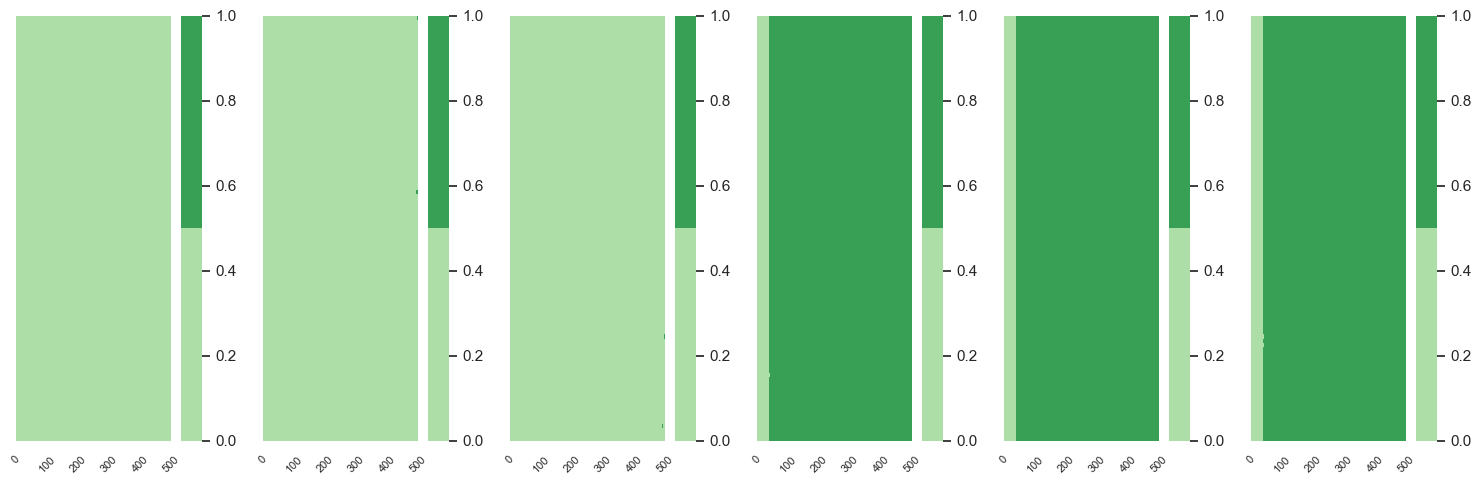

nm 5
AndroDioecious,X=  0.5


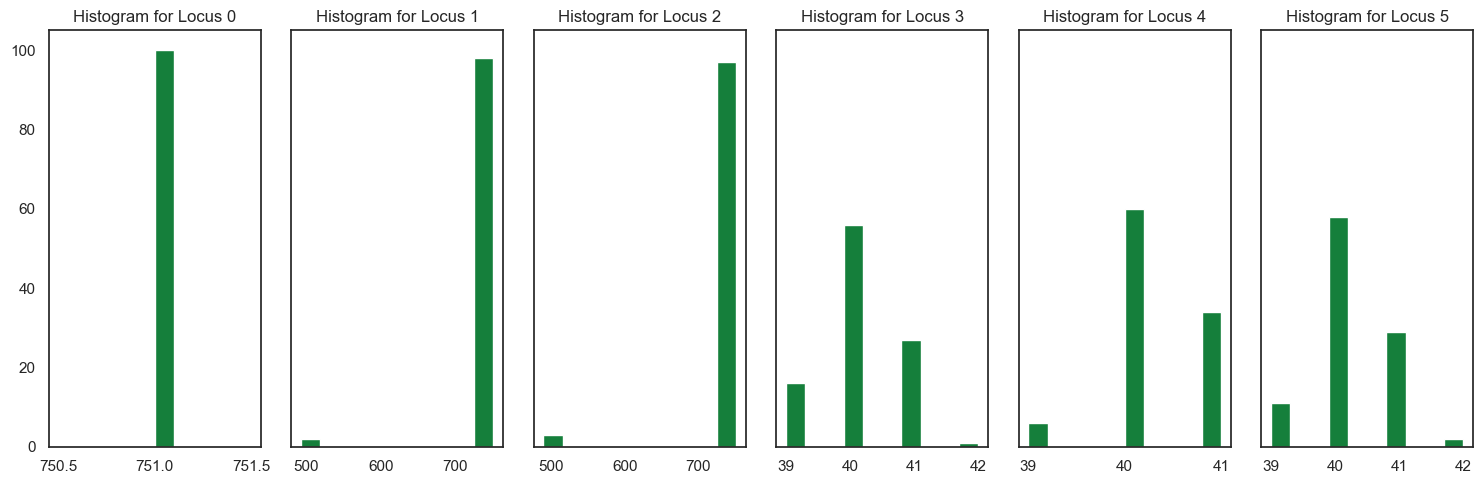

DataArticle/CombinedDataL6/WormsT500N200000L6E0X1.0D0all_frequency.npy
100 501 6
dio


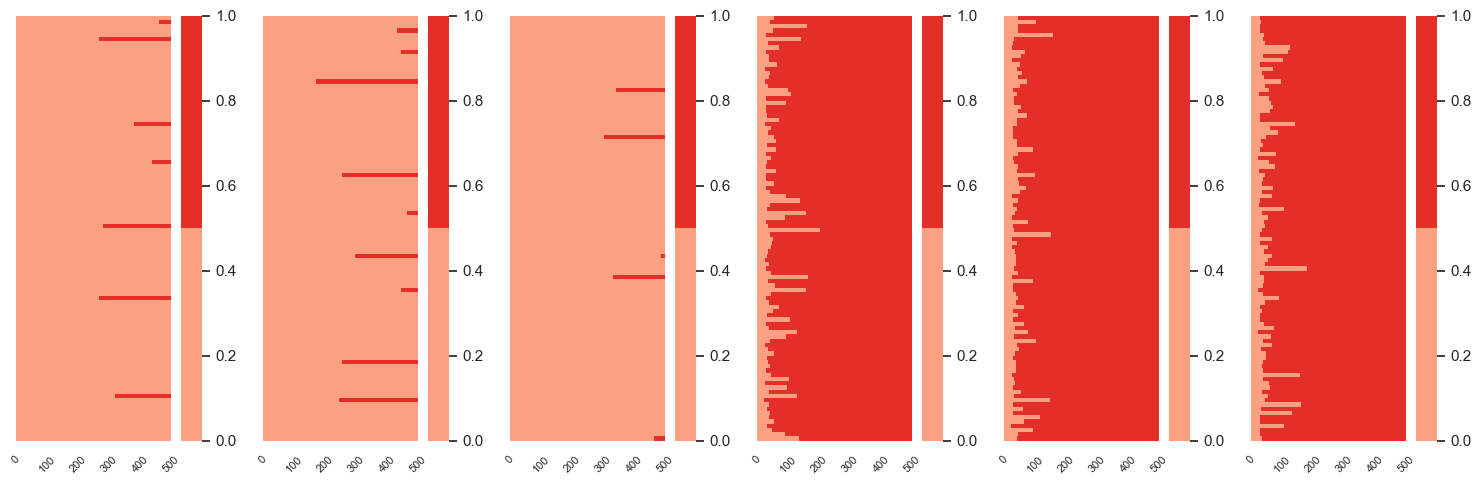

nm 5
dio


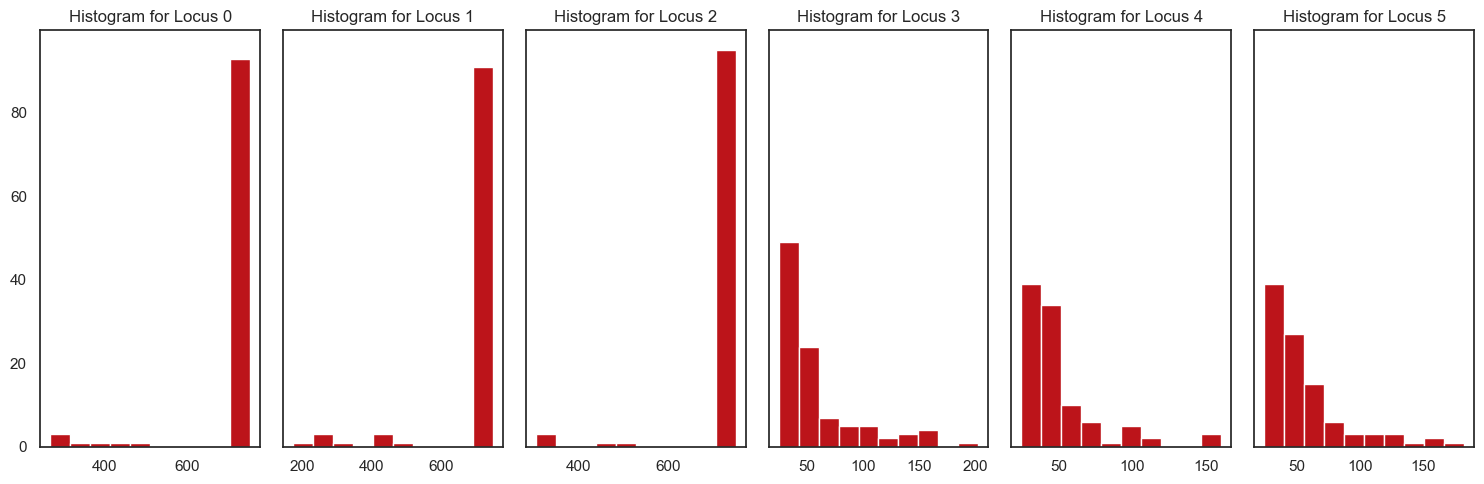

DataArticle/CombinedDataL6/WormsT500N200000L6E0X1.0D1all_frequency.npy
100 501 6
dio


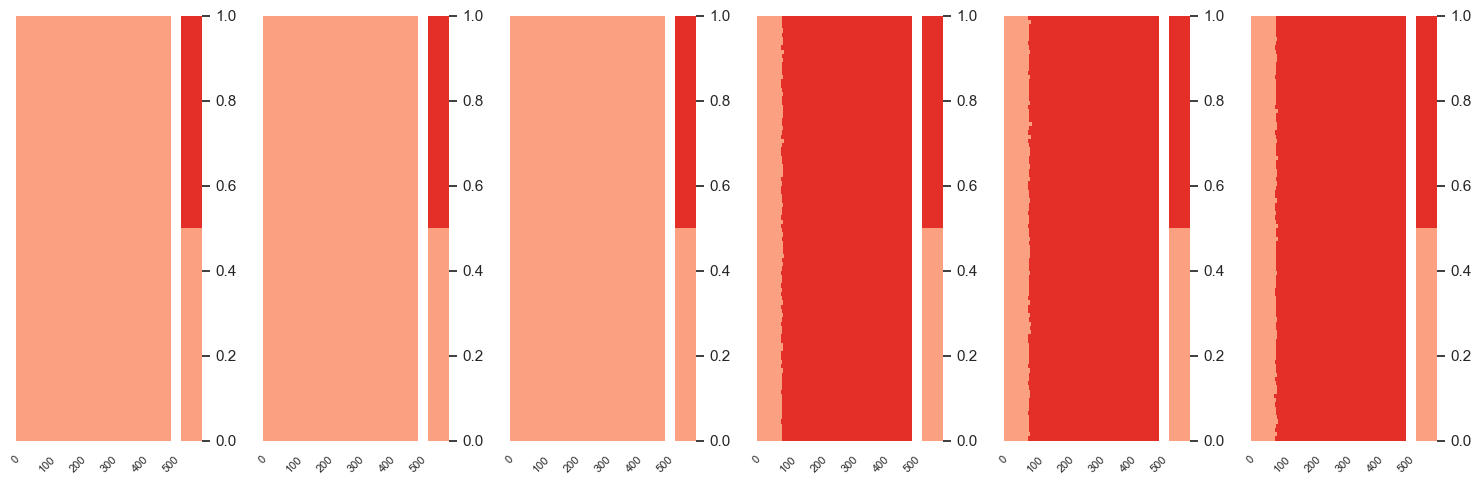

nm 5
dio


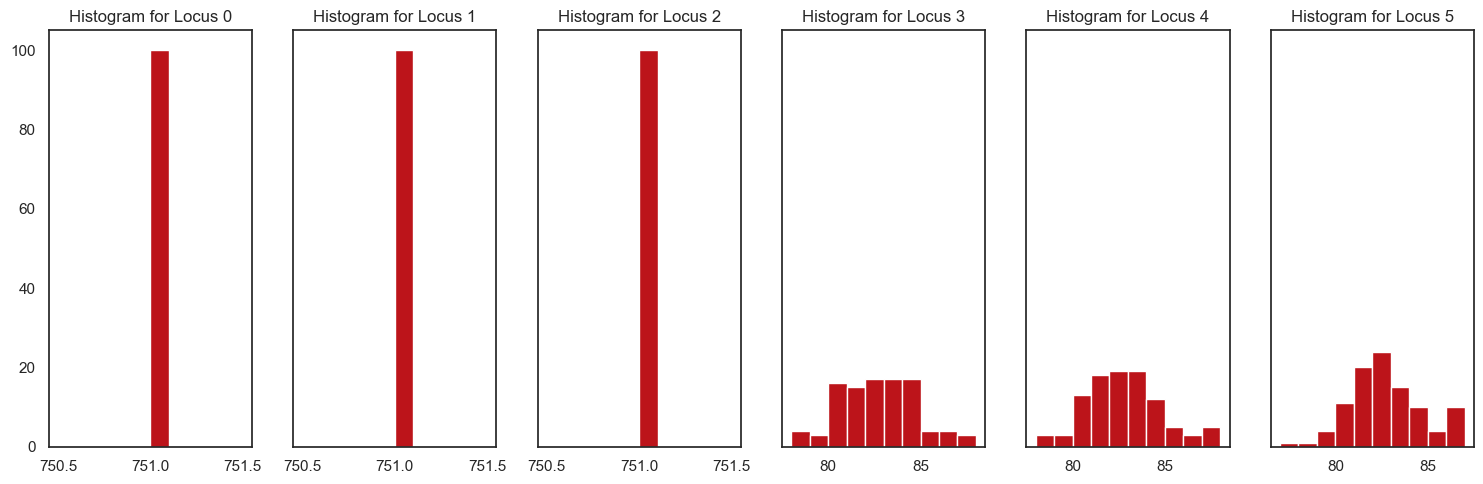

In [741]:
myL=6
my_path='DataArticle/CombinedDataL6/'
for myN in [200, 2000,20000,200000]:
    for myX in [0.0,0.5,1.0]:
        for myD in [0,1]:
            name=(my_path+'WormsT500N'+str(myN)+'L'+str(myL)+'E0X'+str(myX)+'D'+str(myD)+'all_frequency.npy')
            print (name)
            frequency=np.load(name)

            CalcTimeToFixation(frequency,  myN, myX, myD, myL,Thresh=0.95)
            

In [285]:
def get_palette(X,K=4):
    if X==0.0:
        palette = sns.color_palette("PuBu", K)
        print('herma')
    elif X==1:
        palette = sns.color_palette("Reds", K)
        print ('dio')
    else:
        print ('AndroDioecious,X= ', X)
        palette = sns.color_palette("Greens", K)  #PuBu, Greens, Reds
    #print ('in', palette)
    return(palette)



# Compare the effects in time

herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio


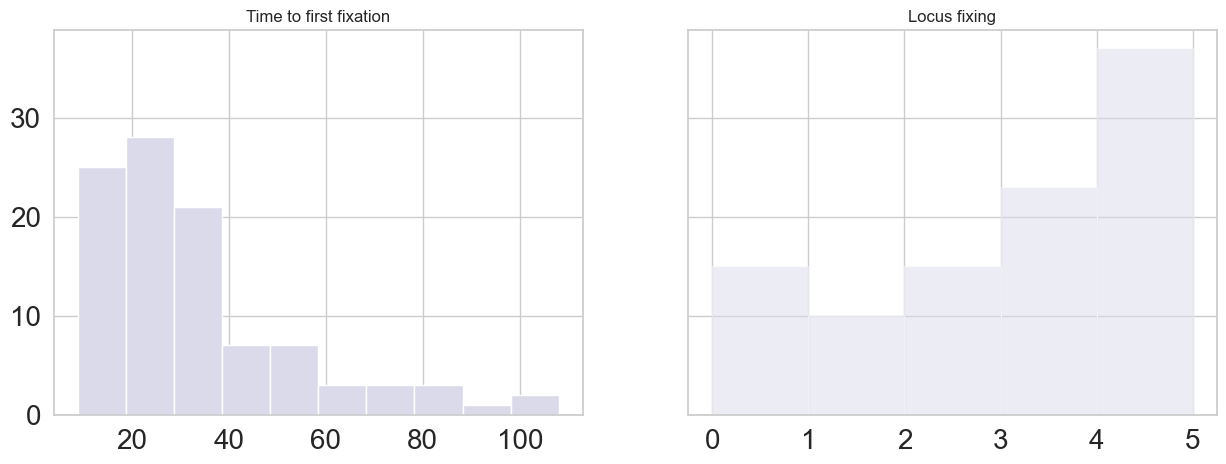

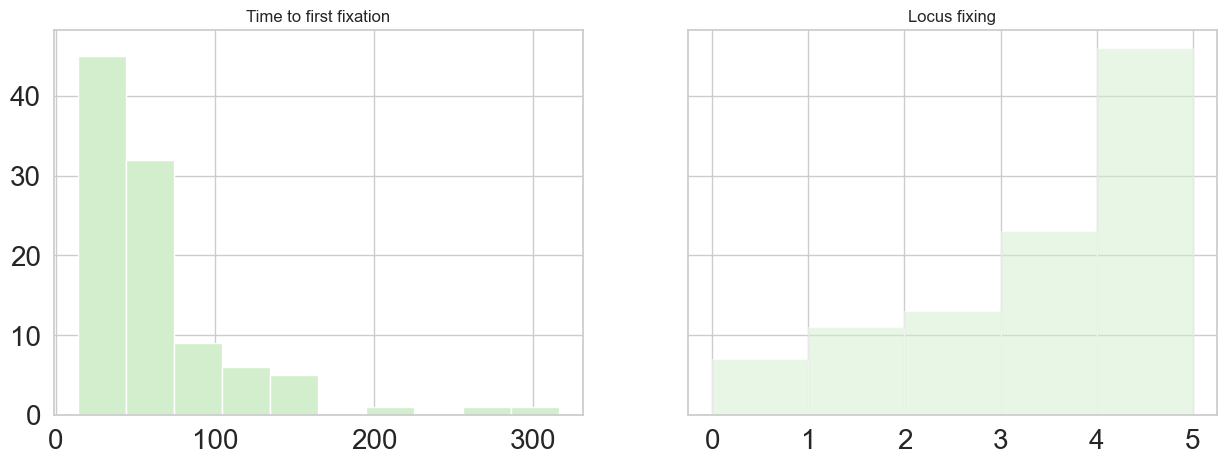

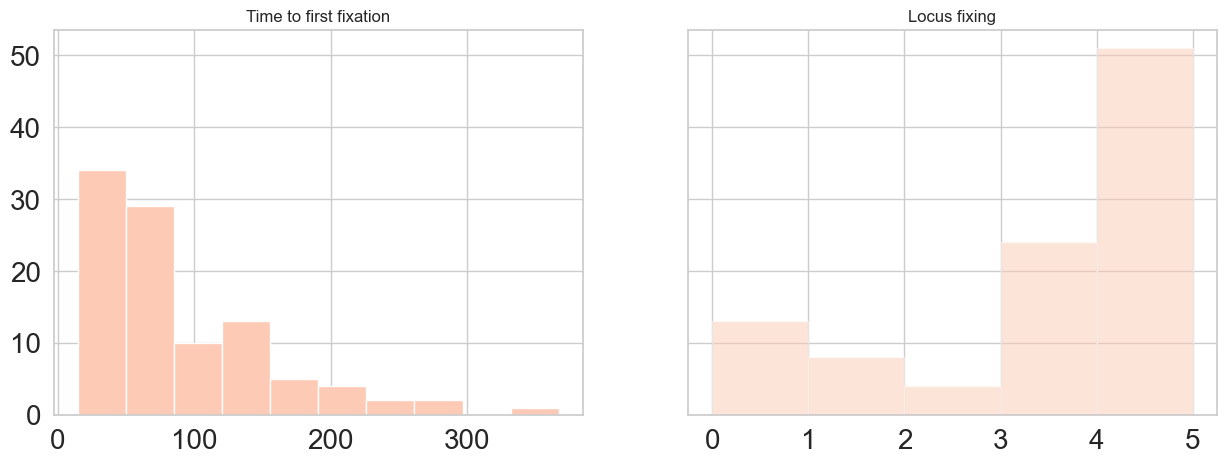

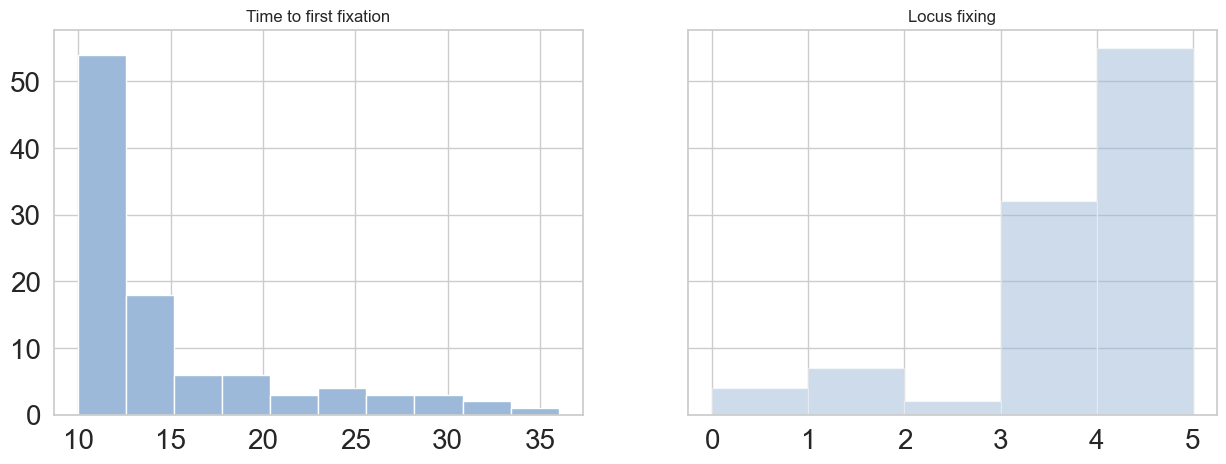

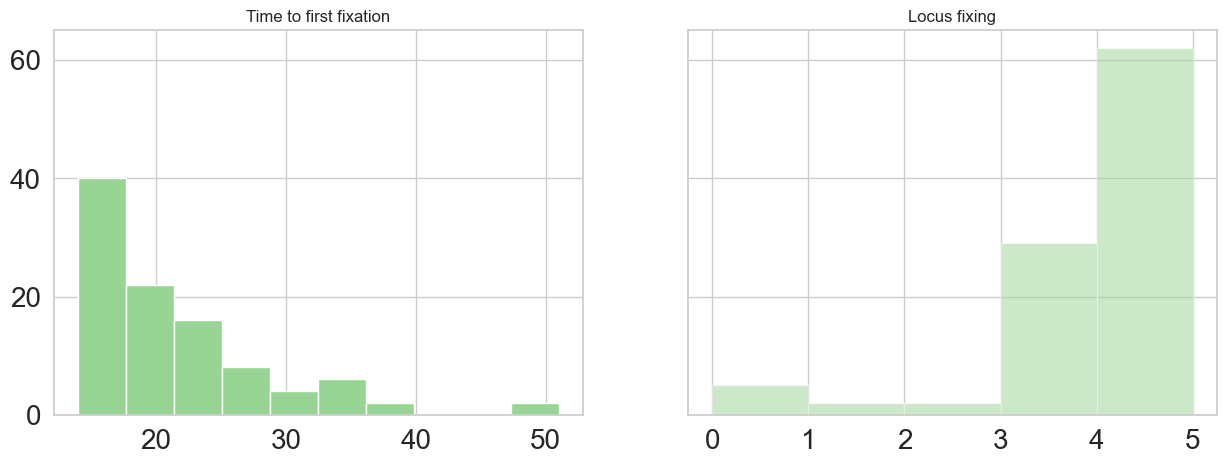

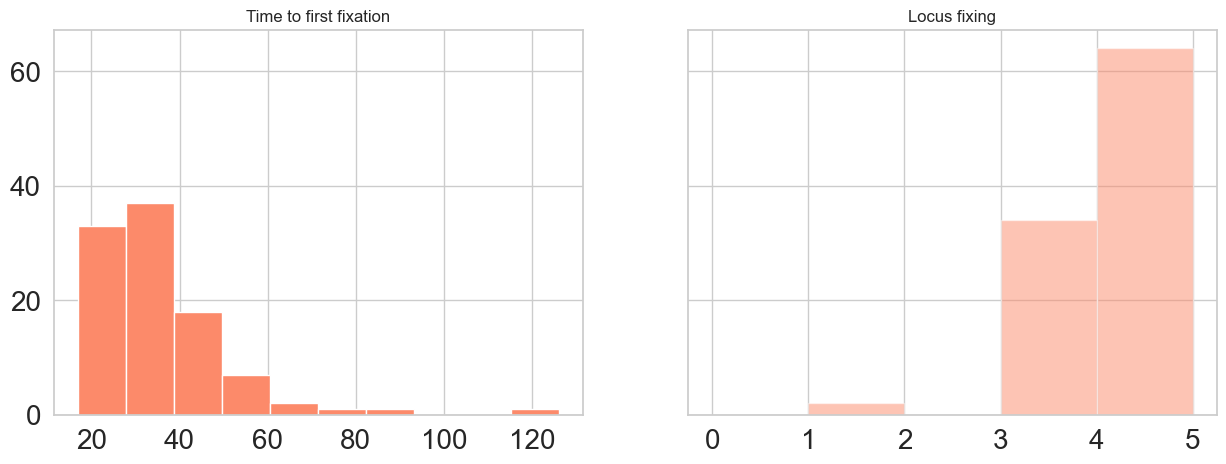

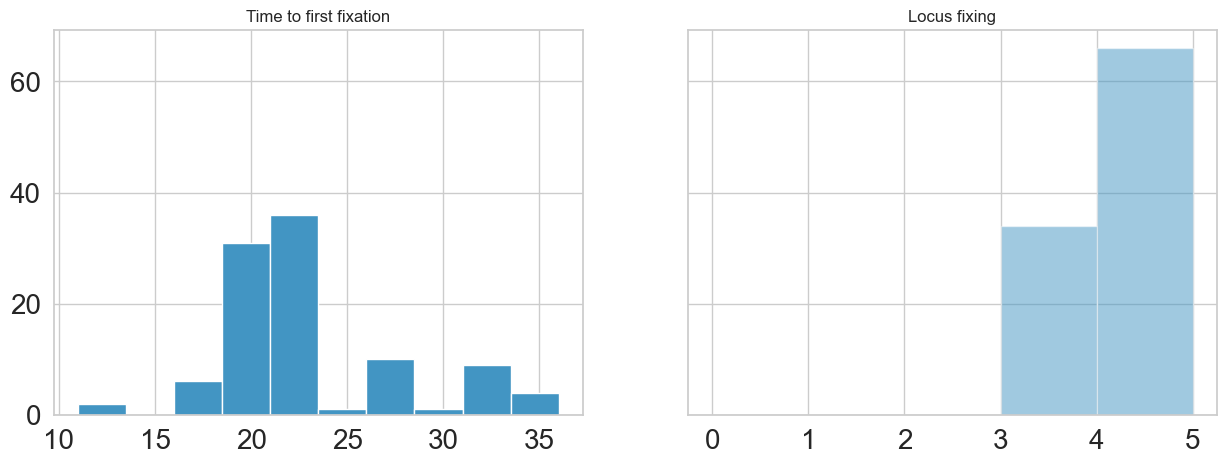

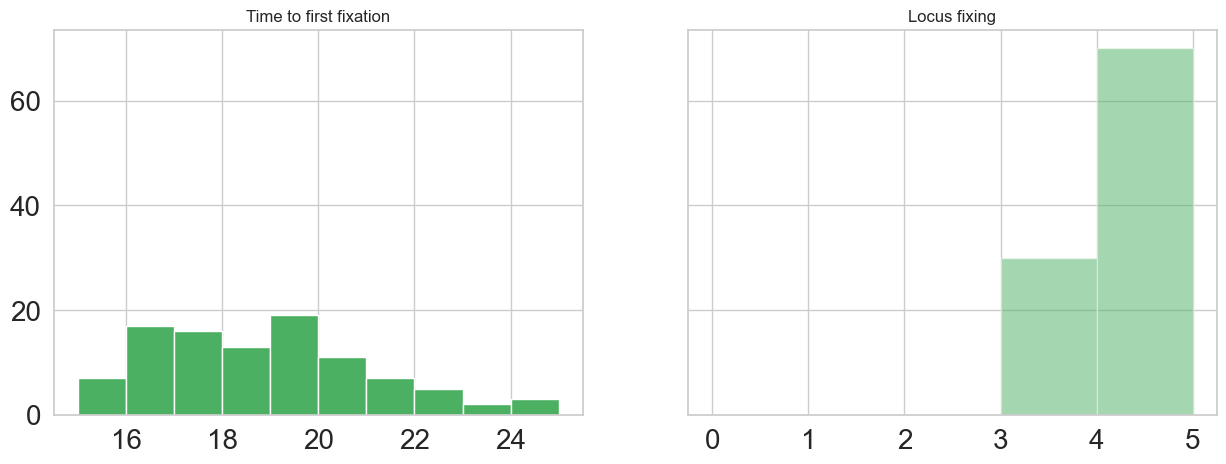

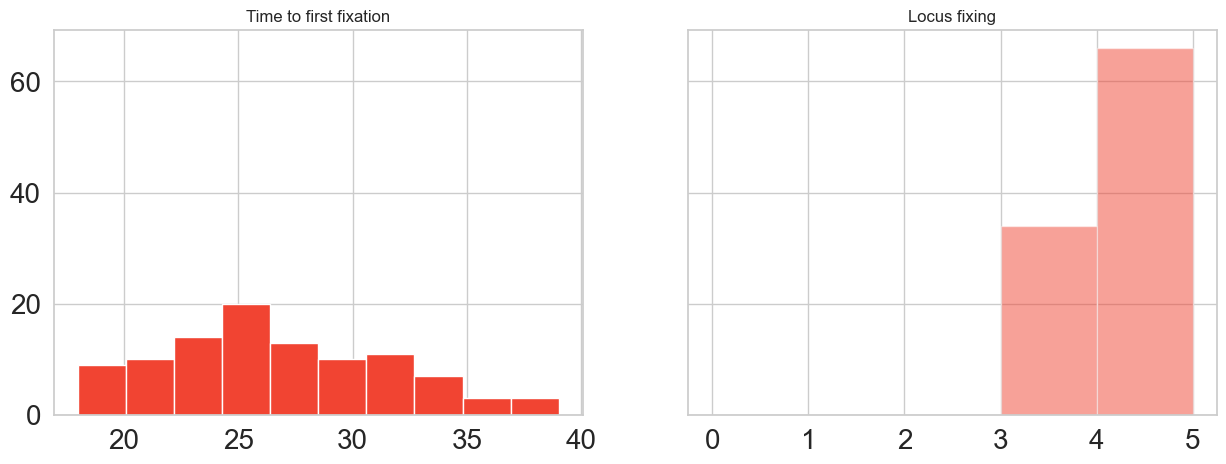

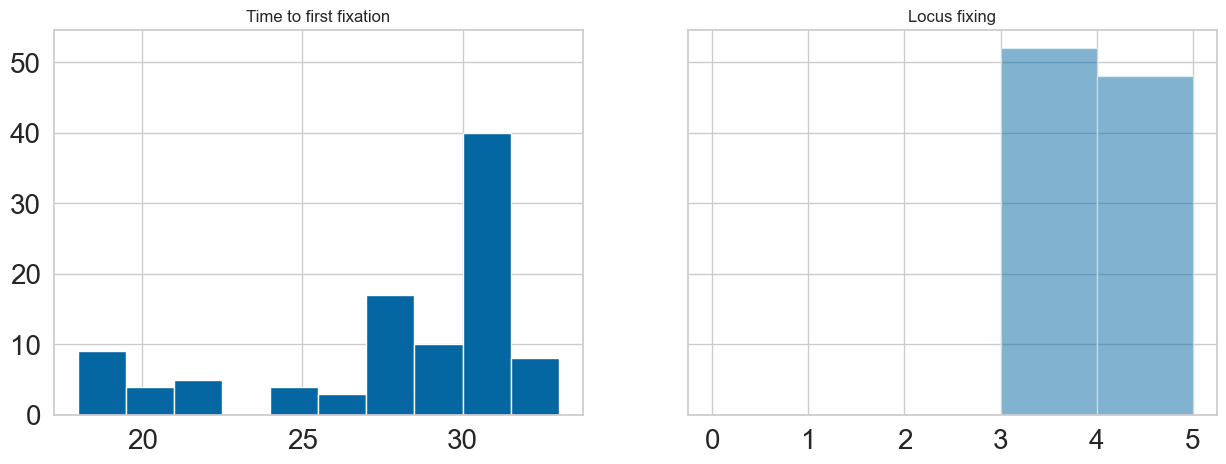

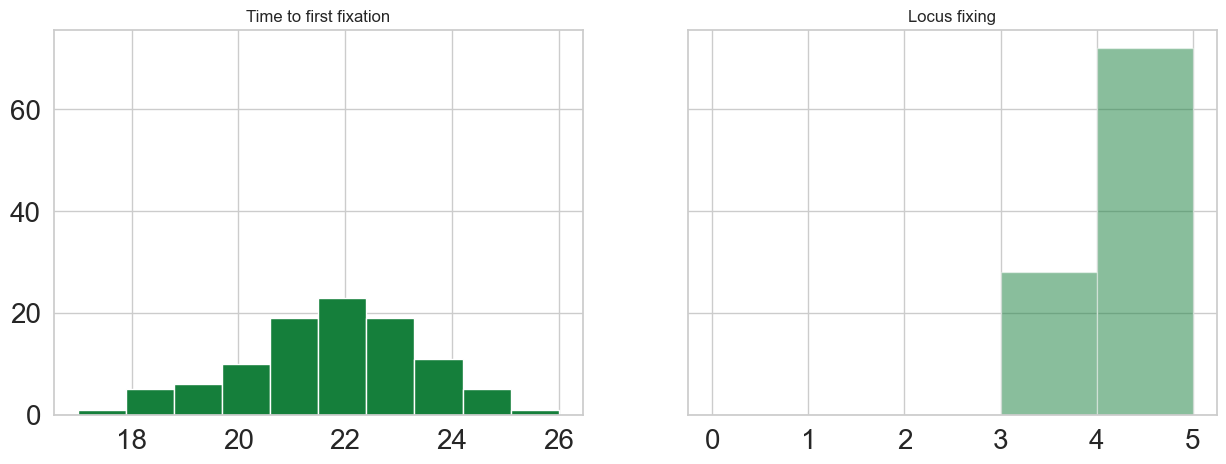

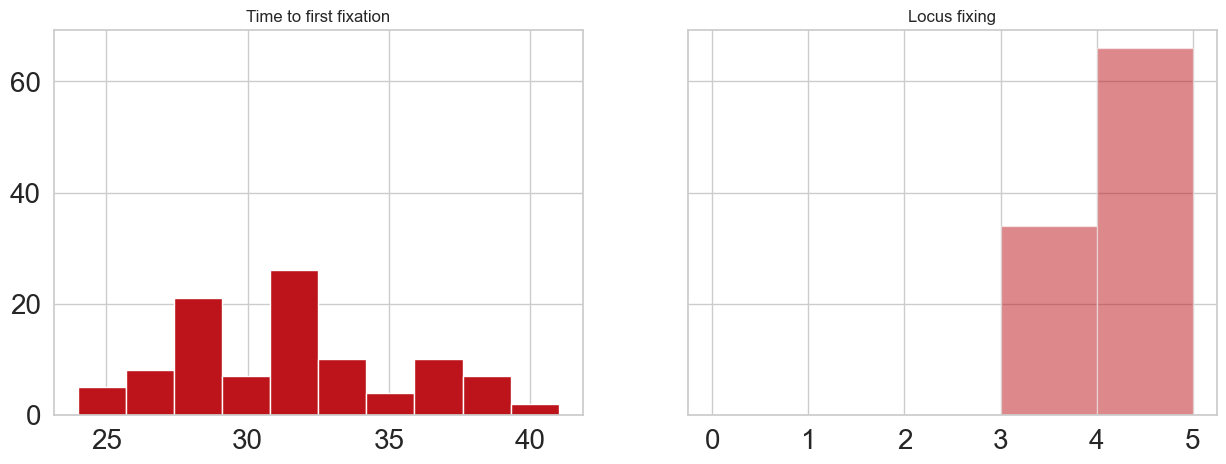

In [290]:
L=6

D=0


for N in [200, 2000,20000,200000]:
    
    for X in [0.0,0.5,1.0]:
        fig, axes = plt.subplots(1, 2, figsize=(15, 5),  sharey=True)
        palette=get_palette(X,K=4)
        #print (palette)
        
        load_name='TimeToFixL'+str(L)+'X'+str(X)+'D'+str(D)+'N'+str(N)+'.npy'
        first_fixed=np.load(load_name)
        min_fixed=np.min(first_fixed,1)
        which_fixed=np.argmin(first_fixed, axis=1)

        num_digits= int(math.log10(abs(N)))
        axes[0].hist(min_fixed,color=palette[num_digits-2])
        axes[0].set_title(f'Time to first fixation')
        
        axes[1].hist(which_fixed,bins=[0,1,2,3,4,5],color=palette[num_digits-2], alpha=0.5)
        axes[1].set_title(f'Locus fixing')
        plt.savefig('FirstToFixL'+str(L)+'X'+str(X)+'D'+str(D)+'N'+str(N)+'.png',bbox_inches='tight')




herma
herma
herma
herma
AndroDioecious,X=  0.5
AndroDioecious,X=  0.5
AndroDioecious,X=  0.5
AndroDioecious,X=  0.5
dio
dio
dio
dio


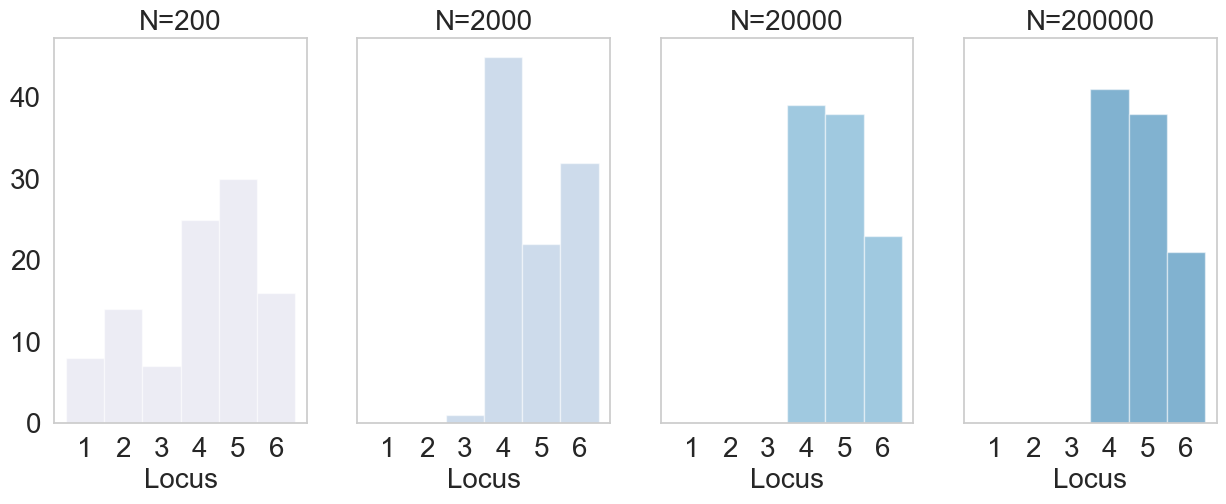

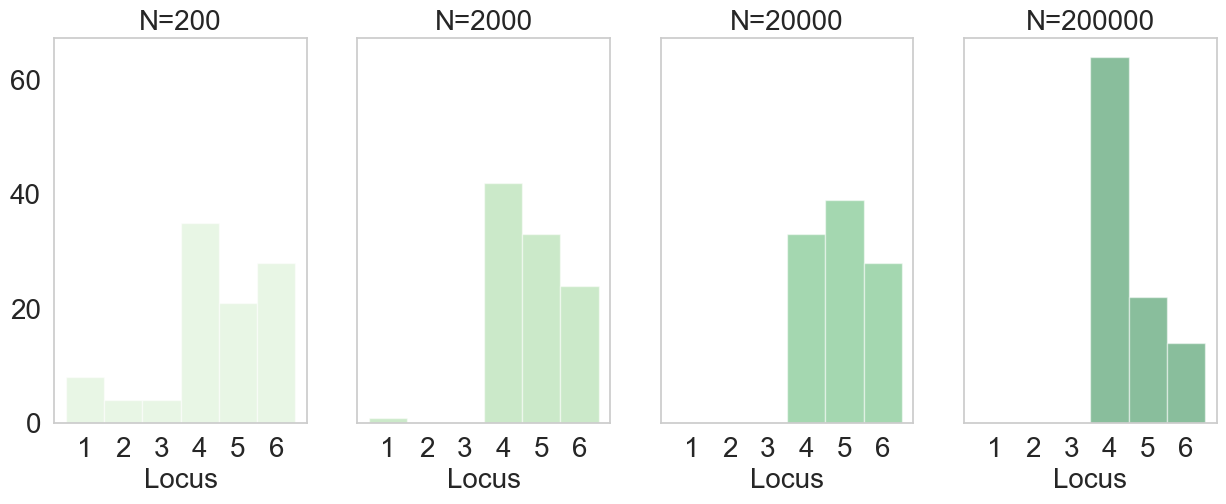

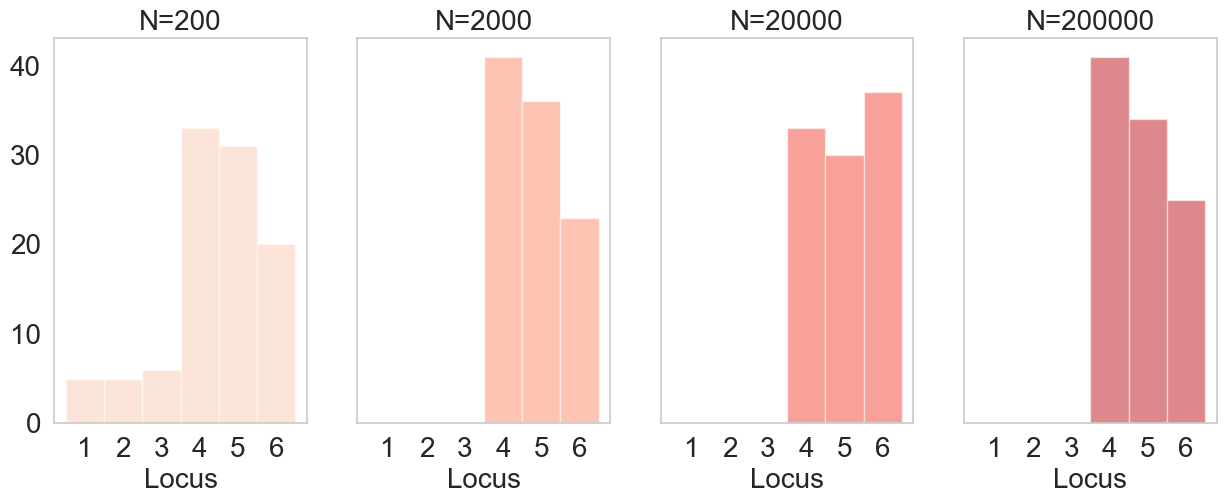

In [342]:
L=6

D=1

plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 

labels=['1','2','3','4','5','6']    
for X in [0.0,0.5,1.0]:
    fig, axes = plt.subplots(1, 4, figsize=(15, 5),  sharey=True)
    
    i=0
    for N in [200, 2000,20000,200000]:
        palette=get_palette(X,K=4)
        #print (palette)
        
        load_name='TimeToFixL'+str(L)+'X'+str(X)+'D'+str(D)+'N'+str(N)+'.npy'
        first_fixed=np.load(load_name)
        min_fixed=np.min(first_fixed,1)
        which_fixed=np.argmin(first_fixed, axis=1)

        num_digits= int(math.log10(abs(N)))
        
        axes[i].hist(which_fixed,bins=[0,1,2,3,4,5,6],color=palette[num_digits-2], alpha=0.5)
        axes[i].set_title('N='+str(N), fontsize=20)
        axes[i].set_xlabel('Locus', fontsize=20)
        axes[i].set_xticks(np.arange(1, len(labels)+1, 1)-0.5, labels) 
        axes[i].grid(False)
        i=i+1
    plt.savefig('FirstToFixL'+str(L)+'X'+str(X)+'D'+str(D)+'NAll.png',bbox_inches='tight')




herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio
herma
AndroDioecious,X=  0.5
dio


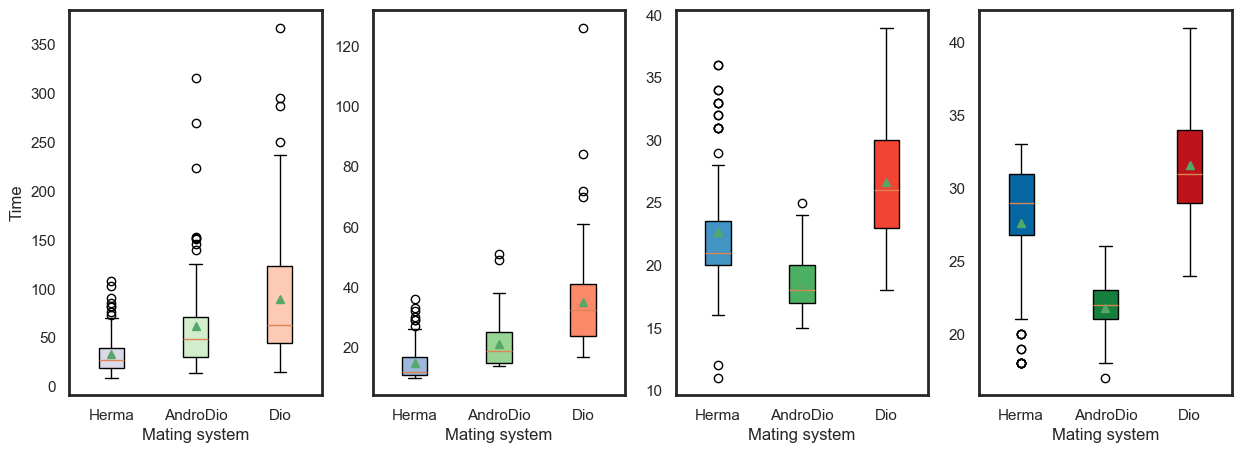

In [983]:
L = 6
D = 0
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Determine the bins for the first subplot before the loop
 # Collect all 'min_fixed' data
# Calculate bins based on all the collected data

# Now plot the histograms using the shared bins
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
i=0
j=0
for N in [200, 2000, 20000, 200000]:
    all_min_fixed = [] 
    colors=[]
    for X in [0.0, 0.5, 1.0]:
        
        palette = get_palette(X, K=4) 
        #fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

        load_name = 'TimeToFixL' + str(L) + 'X' + str(X) + 'D' + str(D) + 'N' + str(N) + '.npy'
        first_fixed = np.load(load_name)
        min_fixed = np.min(first_fixed, 1)
        all_min_fixed.append(min_fixed)

        num_digits = int(math.log10(abs(N)))
        colors.append(palette[num_digits - 2])
    labels=['Herma','AndroDio',  'Dio']
    bplot = axes[i].boxplot(all_min_fixed,
                patch_artist=True, labels=labels,showmeans=True)  # will be used to label x-ticks

        # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    axes[i].set_xlabel('Mating system')
    i=i+1
axes[0].set_ylabel('Time')
    

plt.savefig('FirstToFixXL'+str(L)+'D'+str(D)+'NAll.png',bbox_inches='tight')
plt.show()



herma
[ 12.   9.  30.  27.  30.  22.  48.  26.  27.  13.  34. 103.  15.  37.
  20.  16.  54.  37.  43.  66.  32.  10.  16.  25.  38.  20.  14.  73.
  49.  38.  19.  51.  26.  26.  36.  85.  10.  27.  10.  27.  25.  39.
  38.  22.  33. 108.  18.  38.  21.  64.  14.  76.  81.  54.  32.  20.
  51.  26.  25.  17.  12.  13.  21.  51.  20.  14.  20.  10.  37.  13.
  13.  24.  70.  26.  38.  12.  25.  63.  32.  10.  91.  29.  44.  44.
  34.  35.  46.  41.  26.  30.  14.  31.  21.  14.  82.  25.  12.  52.
  14.  25.]
AndroDioecious,X=  0.5
[ 16.  31. 101. 108.  99.  39.  19.  25. 140.  51.  59.  57.  77.  15.
  32.  44.  66.  52.  54. 120. 316.  49.  61.  80.  34.  55.  40.  27.
  55.  58.  43.  15.  36.  58.  53.  66.  24.  40.  78.  71.  71.  47.
  52.  28.  28.  68.  95.  32.  49.  50.  29.  69.  48.  22.  57.  17.
  19.  18. 223.  74.  24.  38.  36.  77.  34. 125.  15.  24. 104.  39.
  32.  32. 153.  78.  48.  29. 114.  50.  47.  28.  24.  24. 146.  62.
 269.  32.  28. 151. 108.  45.  65. 

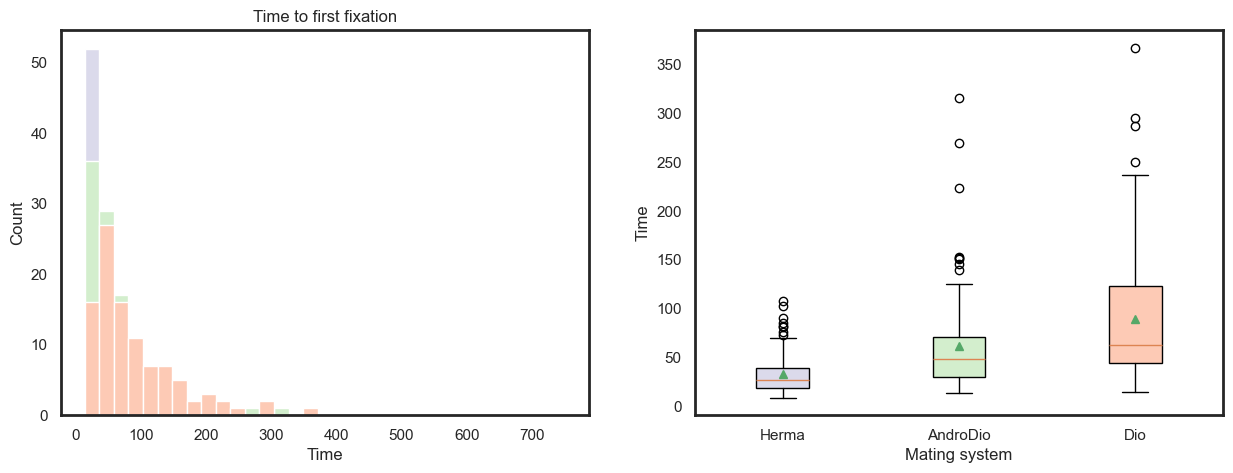

herma
[10. 10. 10. 11. 11. 18. 12. 11. 13. 12. 22. 11. 15. 16. 11. 11. 18. 11.
 10. 18. 15. 11. 17. 15. 11. 13. 13. 10. 11. 12. 11. 11. 13. 17. 14. 11.
 11. 12. 12. 27. 10. 13. 12. 11. 17. 11. 18. 10. 12. 11. 10. 22. 11. 11.
 24. 24. 11. 11. 11. 15. 13. 23. 17. 12. 11. 16. 29. 30. 26. 11. 19. 12.
 11. 11. 11. 13. 11. 12. 13. 21. 11. 26. 11. 32. 12. 20. 29. 15. 10. 11.
 12. 36. 14. 15. 11. 33. 15. 25. 13. 11.]
AndroDioecious,X=  0.5
[22. 21. 15. 16. 15. 16. 15. 26. 37. 29. 23. 15. 26. 16. 26. 18. 17. 26.
 24. 14. 35. 18. 16. 19. 14. 14. 30. 15. 15. 25. 23. 21. 15. 34. 16. 17.
 21. 26. 21. 20. 22. 19. 19. 34. 15. 21. 15. 18. 20. 23. 17. 27. 34. 24.
 15. 18. 51. 36. 22. 25. 21. 14. 16. 18. 26. 17. 16. 38. 22. 15. 15. 14.
 24. 14. 49. 26. 16. 14. 32. 29. 19. 15. 17. 25. 25. 17. 15. 14. 18. 23.
 34. 19. 14. 18. 21. 15. 15. 18. 23. 14.]
dio
[ 40.  22.  45.  35.  34.  22.  26.  33.  70.  19.  54.  50.  21.  17.
  31.  29.  19.  32.  32.  27.  29.  24.  30.  55.  42.  29.  38.  19.
  41.  46. 

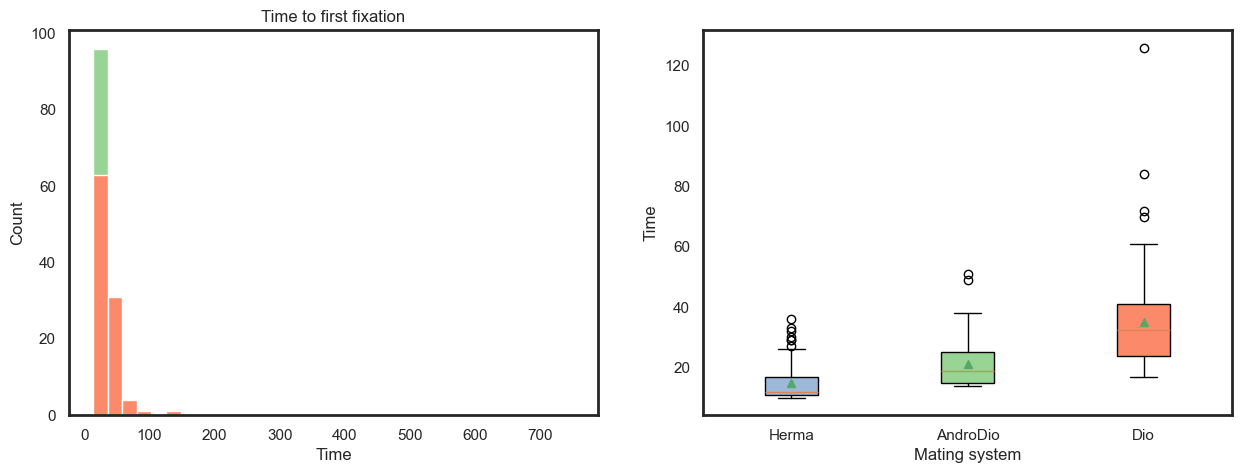

herma
[20. 11. 21. 36. 21. 20. 21. 31. 20. 19. 21. 20. 23. 18. 16. 31. 22. 20.
 22. 20. 27. 21. 22. 21. 31. 22. 33. 21. 20. 20. 16. 28. 21. 23. 28. 21.
 22. 20. 27. 19. 22. 25. 20. 21. 20. 23. 34. 21. 20. 33. 21. 21. 20. 19.
 22. 21. 20. 32. 20. 34. 20. 19. 20. 21. 27. 17. 28. 21. 22. 19. 22. 19.
 20. 20. 21. 21. 22. 21. 21. 26. 36. 12. 20. 31. 19. 22. 19. 23. 27. 28.
 29. 19. 21. 17. 33. 17. 28. 32. 20. 19.]
AndroDioecious,X=  0.5
[20. 16. 15. 17. 19. 17. 16. 23. 17. 19. 17. 18. 19. 19. 18. 16. 15. 16.
 16. 19. 17. 21. 18. 19. 17. 18. 23. 15. 15. 16. 19. 17. 19. 17. 18. 19.
 20. 18. 19. 22. 21. 19. 18. 16. 21. 19. 20. 16. 16. 17. 21. 19. 22. 16.
 20. 20. 16. 16. 19. 17. 25. 20. 24. 18. 18. 16. 20. 24. 16. 19. 19. 20.
 22. 18. 19. 18. 16. 18. 19. 17. 15. 17. 22. 21. 18. 16. 15. 19. 20. 17.
 21. 17. 17. 22. 20. 20. 15. 17. 21. 16.]
dio
[29. 29. 26. 27. 19. 23. 21. 24. 21. 29. 27. 30. 29. 25. 31. 27. 31. 20.
 25. 22. 26. 22. 28. 25. 28. 32. 19. 25. 39. 19. 21. 28. 21. 23. 32. 27.
 24. 18

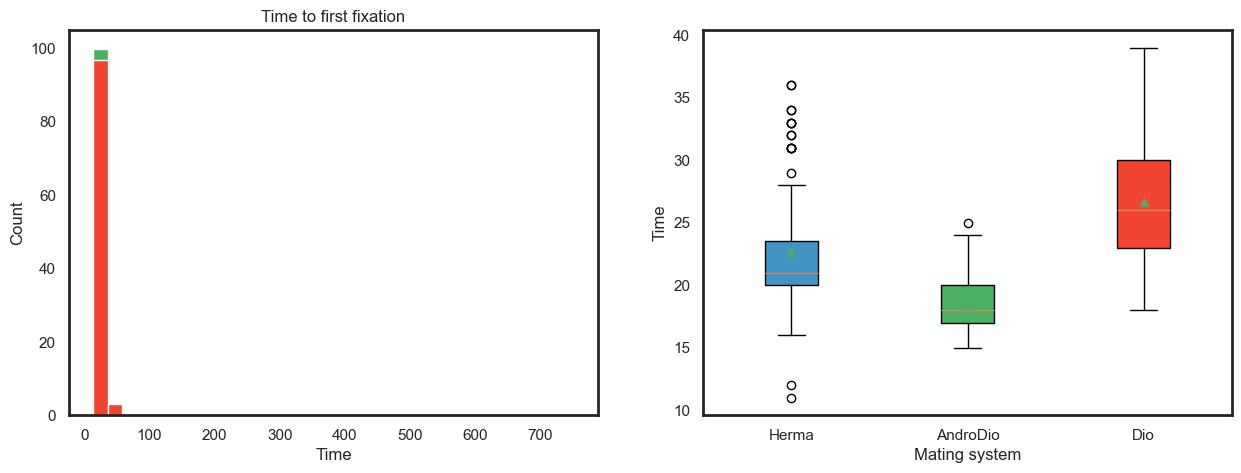

herma
[31. 18. 29. 20. 25. 18. 31. 30. 32. 26. 27. 22. 25. 27. 32. 31. 30. 28.
 20. 21. 30. 20. 20. 28. 18. 29. 31. 30. 22. 32. 18. 31. 32. 31. 25. 29.
 30. 30. 30. 30. 29. 30. 18. 31. 27. 32. 21. 30. 31. 25. 29. 27. 19. 31.
 27. 31. 26. 31. 30. 30. 31. 27. 31. 30. 32. 29. 28. 27. 30. 28. 26. 30.
 31. 29. 31. 21. 30. 31. 27. 18. 28. 28. 31. 29. 27. 31. 18. 29. 31. 30.
 30. 28. 31. 27. 29. 33. 30. 19. 31. 32.]
AndroDioecious,X=  0.5
[18. 24. 23. 22. 22. 24. 23. 21. 23. 21. 20. 21. 21. 20. 21. 18. 21. 19.
 22. 23. 23. 22. 20. 23. 24. 20. 22. 21. 20. 19. 18. 19. 25. 25. 19. 24.
 20. 17. 22. 20. 22. 21. 23. 21. 25. 22. 18. 23. 21. 22. 21. 22. 22. 25.
 22. 19. 21. 22. 23. 18. 24. 22. 23. 24. 21. 23. 21. 23. 20. 22. 22. 22.
 21. 21. 24. 20. 22. 23. 26. 23. 23. 22. 23. 24. 21. 20. 24. 19. 23. 22.
 22. 23. 24. 21. 21. 22. 25. 22. 24. 23.]
dio
[30. 33. 29. 29. 30. 33. 30. 28. 29. 39. 28. 30. 28. 38. 41. 26. 36. 32.
 28. 32. 35. 31. 32. 30. 29. 28. 32. 32. 29. 34. 35. 29. 31. 25. 35. 32.
 28. 29

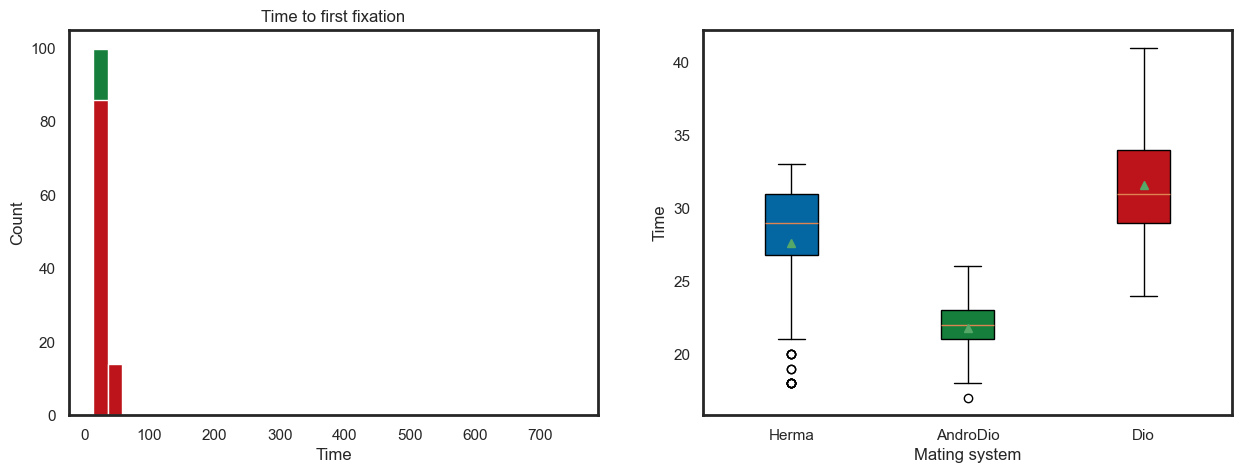

In [947]:
L = 6
D = 0
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Determine the bins for the first subplot before the loop
 # Collect all 'min_fixed' data
# Calculate bins based on all the collected data

# Now plot the histograms using the shared bins
for N in [200, 2000, 20000, 200000]:
    all_min_fixed = [] 
    colors=[]
 
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)
    for X in [0.0, 0.5, 1.0]:
        
        palette = get_palette(X, K=4) 
        #fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

        load_name = 'TimeToFixL' + str(L) + 'X' + str(X) + 'D' + str(D) + 'N' + str(N) + '.npy'
        first_fixed = np.load(load_name)
        min_fixed = np.min(first_fixed, 1)
        all_min_fixed.append(min_fixed)

        num_digits = int(math.log10(abs(N)))
        axes[0].hist(min_fixed, bins=bins, color=palette[num_digits - 2])  # Use the shared bins
        axes[0].set_title(f'Time to first fixation')
        

        
        colors.append(palette[num_digits - 2])
    labels=['Herma','AndroDio',  'Dio']
    bplot = axes[1].boxplot(all_min_fixed,
                patch_artist=True, labels=labels,showmeans=True)  # will be used to label x-ticks

        # fill with colors
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    axes[0].set_xlabel('Time')
    axes[0].set_ylabel('Count')
    axes[1].set_xlabel('Mating system')
    axes[1].set_ylabel('Time')

    plt.savefig('FirstToFixXL'+str(L)+'D'+str(D)+'N'+str(N)+'.png',bbox_inches='tight')
    plt.show()



herma
done 0.0 200
AndroDioecious,X=  0.5
done 0.5 200
dio
done 1.0 200


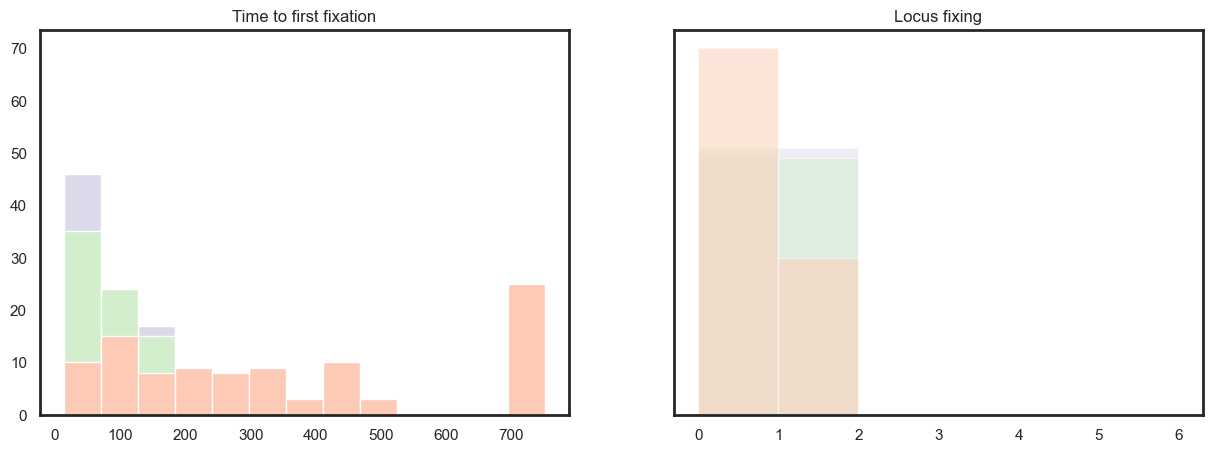

herma
done 0.0 2000
AndroDioecious,X=  0.5
done 0.5 2000
dio
done 1.0 2000


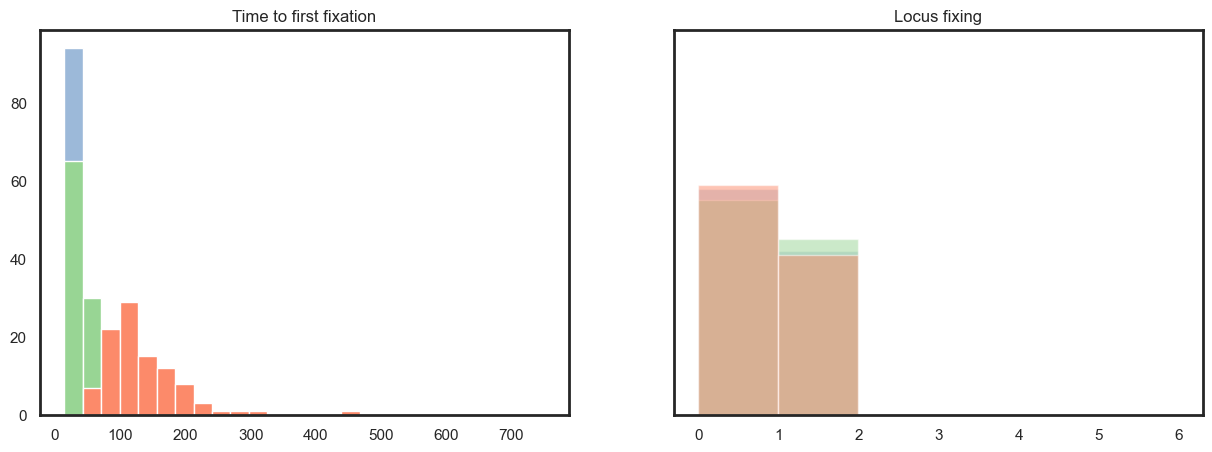

herma
done 0.0 20000
AndroDioecious,X=  0.5
done 0.5 20000
dio
done 1.0 20000


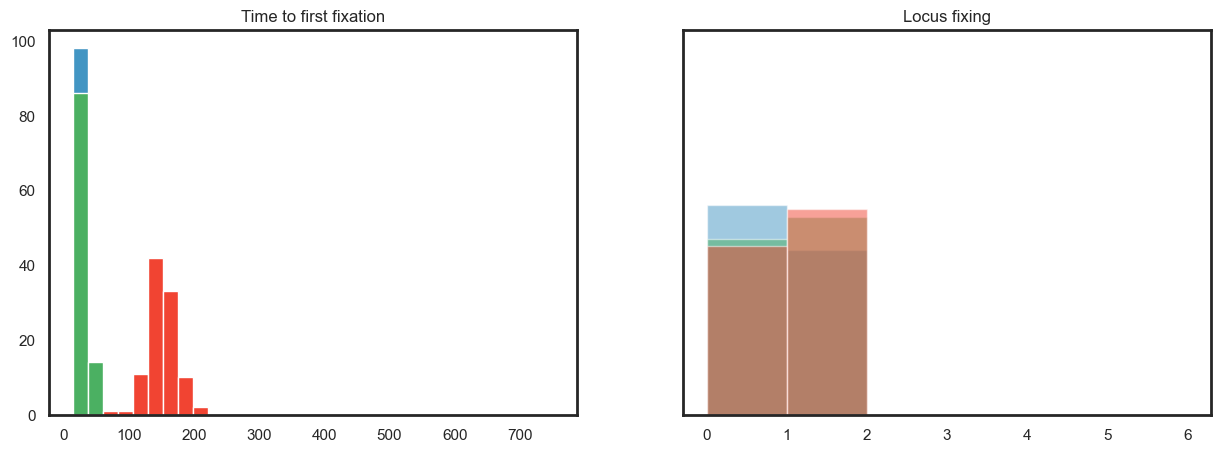

herma
done 0.0 200000
AndroDioecious,X=  0.5
done 0.5 200000
dio
done 1.0 200000


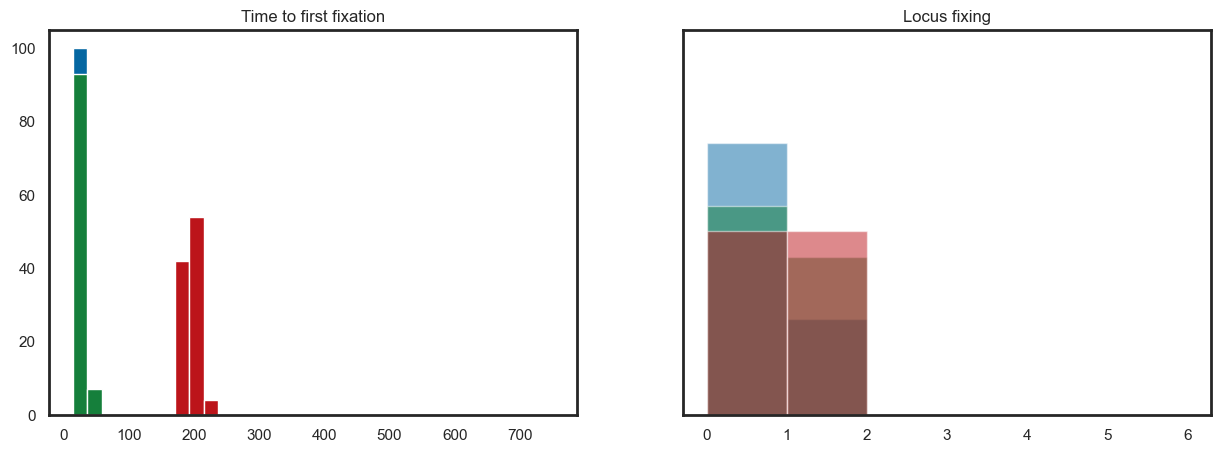

In [882]:
L = 2
D = 0
#fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

# Determine the bins for the first subplot before the loop
all_min_fixed = []  # Collect all 'min_fixed' data
# Calculate bins based on all the collected data

# Now plot the histograms using the shared bins
for N in [200, 2000, 20000, 200000]:
    for X in [0.0, 0.5, 1.0]:
        load_name = 'TimeToFixL' + str(L) + 'X' + str(X) + 'D' + str(D) + 'N' + str(N) + '.npy'
        first_fixed = np.load(load_name)
        min_fixed = np.min(first_fixed, 1)
        all_min_fixed.append(min_fixed)
    _, bins, _ = axes[0].hist(np.concatenate(all_min_fixed), bins='auto') 


    
    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)
    for X in [0.0, 0.5, 1.0]:
        
        palette = get_palette(X, K=4) 
        #fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

        load_name = 'TimeToFixL' + str(L) + 'X' + str(X) + 'D' + str(D) + 'N' + str(N) + '.npy'
        first_fixed = np.load(load_name)
        min_fixed = np.min(first_fixed, 1)
        which_fixed = np.argmin(first_fixed, axis=1)

        num_digits = int(math.log10(abs(N)))
        axes[0].hist(min_fixed, bins=bins, color=palette[num_digits - 2])  # Use the shared bins
        axes[0].set_title(f'Time to first fixation')

        axes[1].hist(which_fixed, bins=[0, 1, 2,3,4,5,6], color=palette[num_digits - 2], alpha=0.5)
        axes[1].set_title(f'Locus fixing')
        print ('done', X, N)
    #plt.savefig('FirstToFixXL'+str(L)+'D'+str(D)+'N'+str(N)+'.png',bbox_inches='tight')
    plt.show()

plt.show()

# Time snapshots

Here I want to compare various matrix in different times, to see what we would get if we finished experiment after a very long time. 

In [1114]:
time_snapshots=[25,100,500]
data_points=[ 0. ,  0.1 , 0.2 , 0.4 , 0.8 , 1. ,  1.5 , 2.  , 2.5,  3. ,  4. ,  5. ,  6. ,  8. ,10.,  12. , 15. , 18.,  21.,  24.  ,27. ]

herma
AndroDioecious,X=  0.5
dio


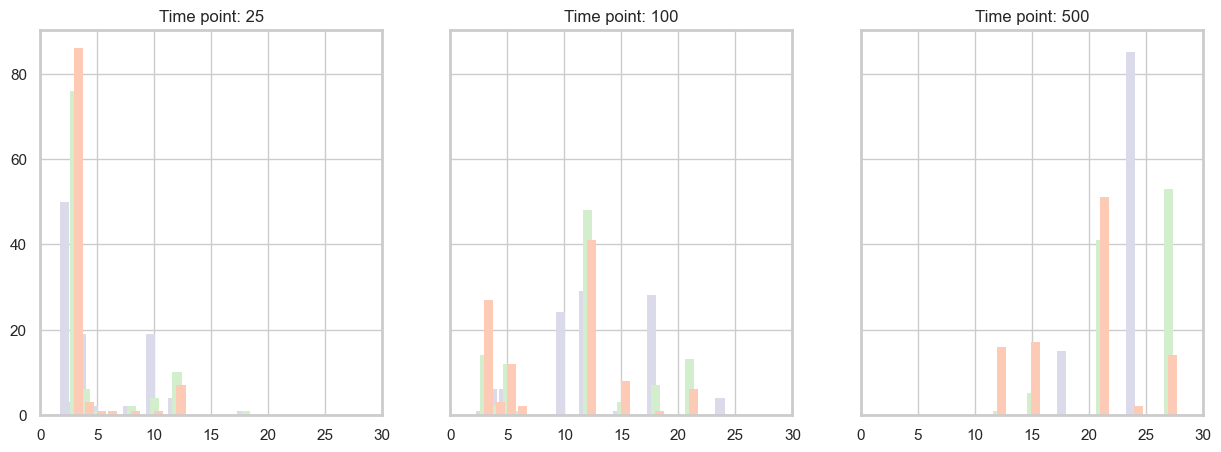

herma
AndroDioecious,X=  0.5
dio


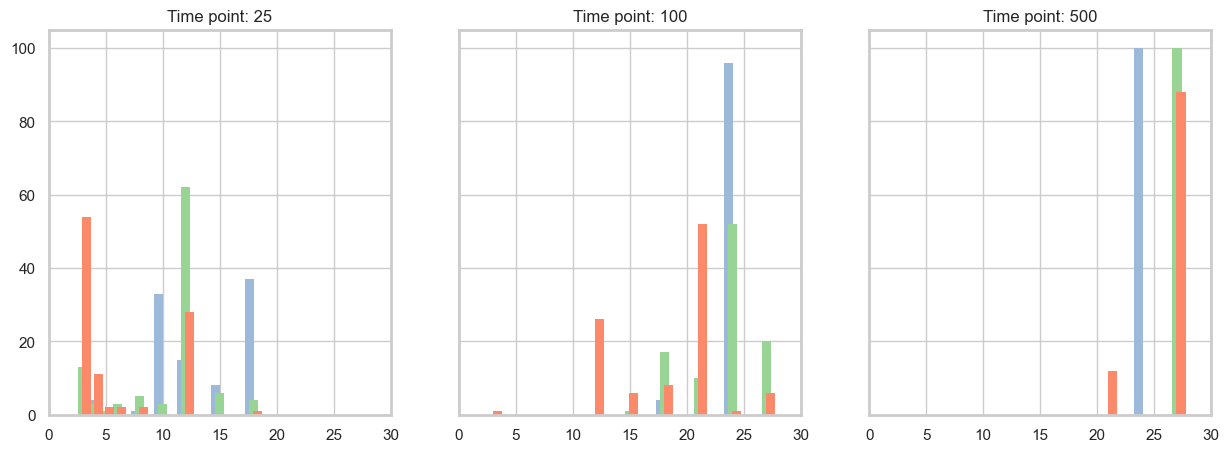

herma
AndroDioecious,X=  0.5
dio


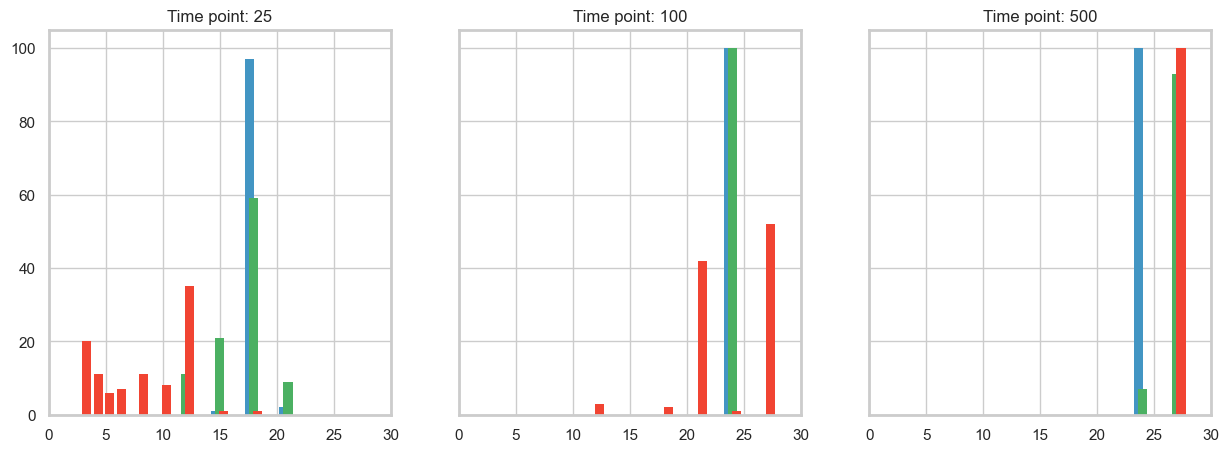

herma
AndroDioecious,X=  0.5
dio


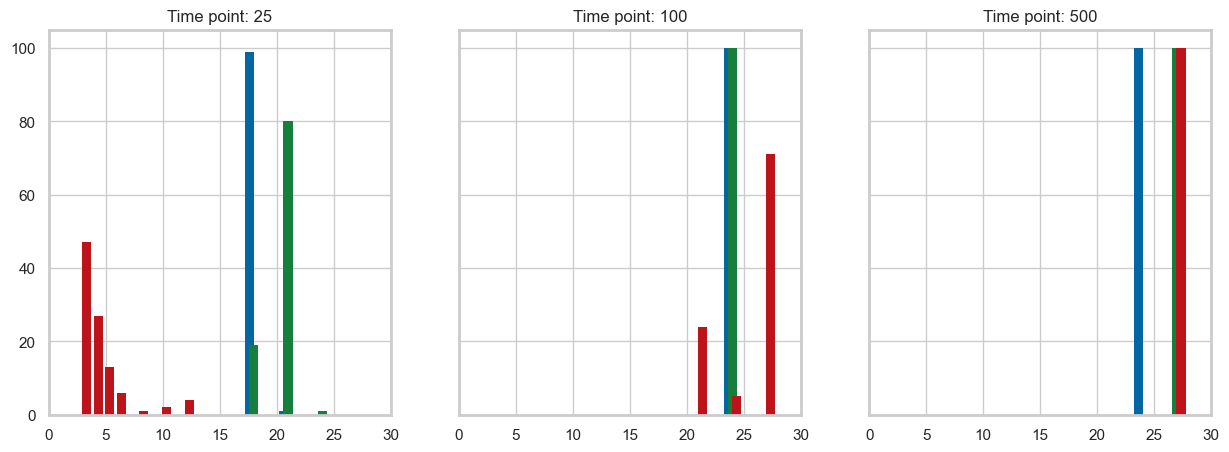

herma
AndroDioecious,X=  0.5
dio


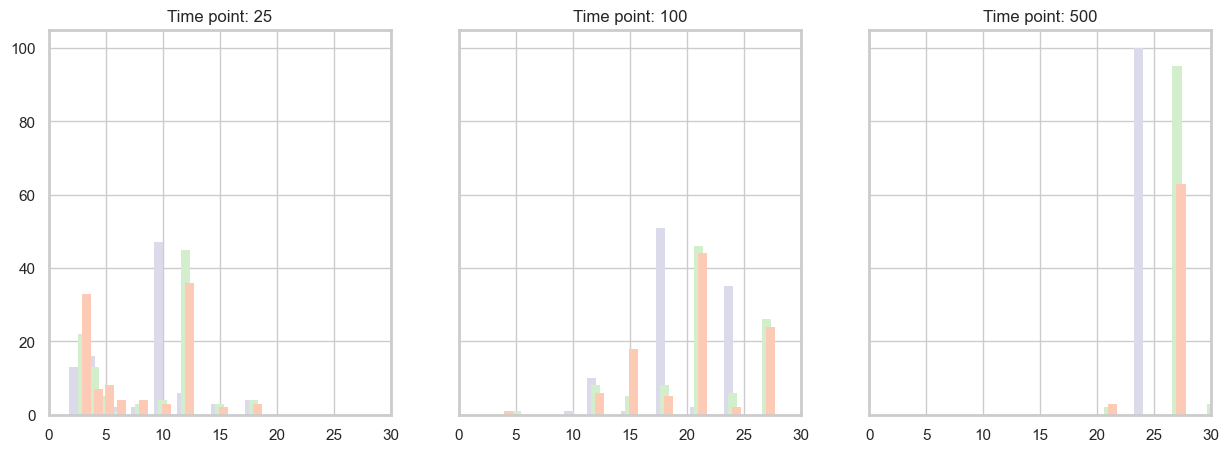

herma
AndroDioecious,X=  0.5
dio


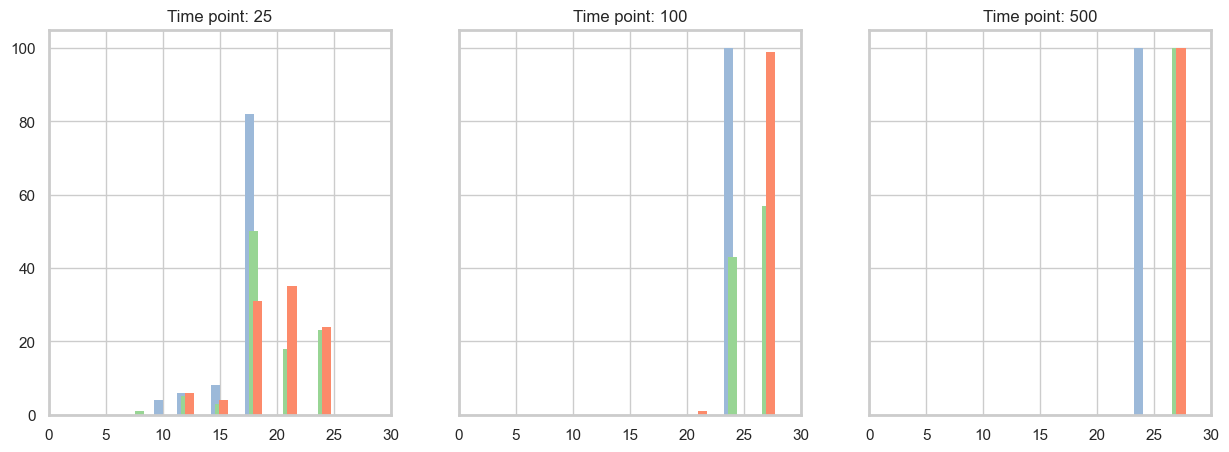

herma
AndroDioecious,X=  0.5
dio


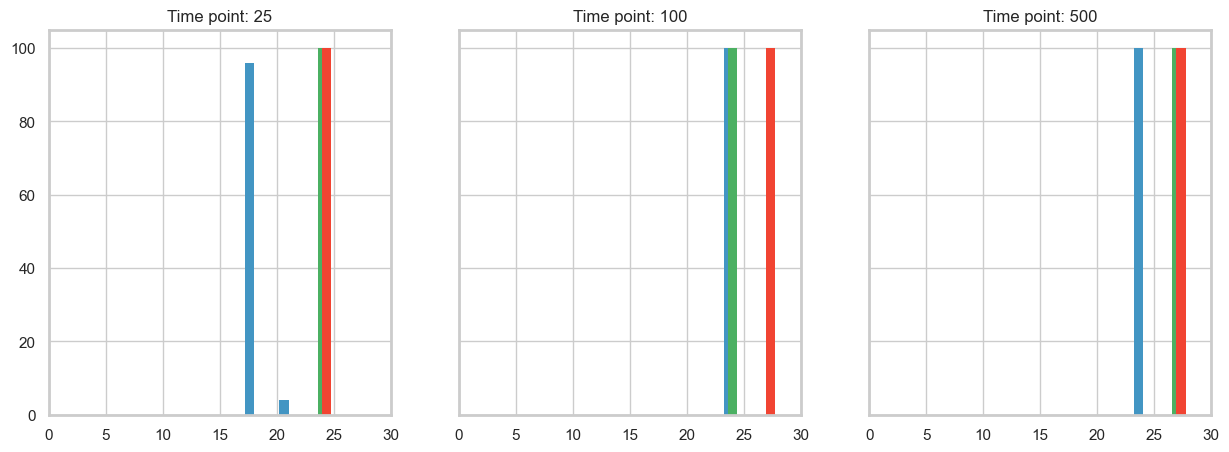

herma
AndroDioecious,X=  0.5
dio


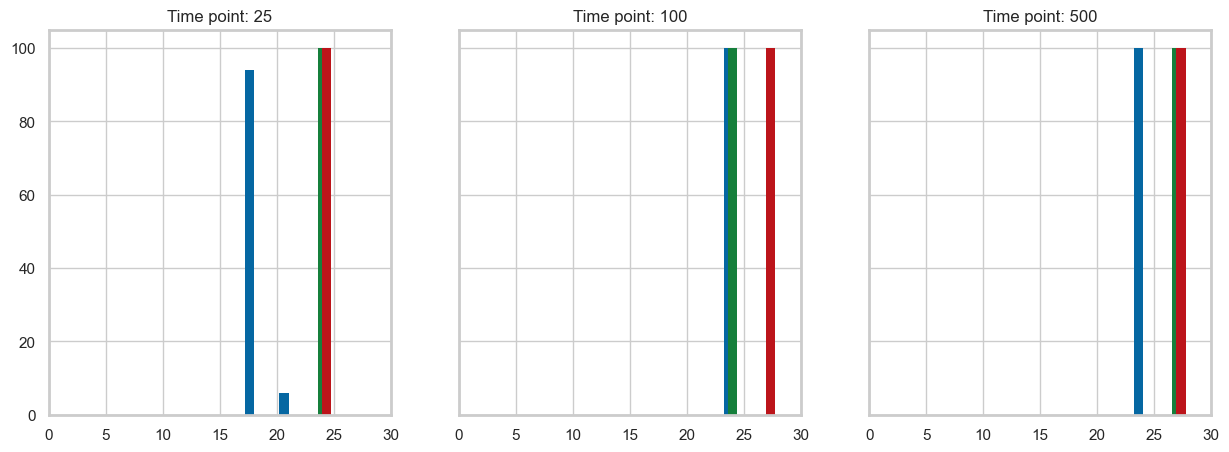

In [1116]:

myL=6
plt.rcParams['axes.linewidth'] = 2 
my_path='DataArticle/CombinedDataL6/'
for myD in [0,1]:
    for myN in [200, 2000,20000,200000]:
        fig, axes = plt.subplots(1, len(time_snapshots), figsize=(15, 5),  sharey=True)

        for myX in [0.0,0.5,1.0]:
            
            palette = get_palette(myX, K=4)
            num_digits = int(math.log10(abs(myN)))
            
            name=(my_path+'WormsT500N'+str(myN)+'L'+str(myL)+'E0X'+str(myX)+'D'+str(myD)+'all_concentration.npy')
            #print (name)
            concentration=np.load(name)
            
            #print (np.shape(concentration))
            selected_concentrations=concentration[:,time_snapshots]
            for i in range (len(time_snapshots)):
                ff=selected_concentrations[:,i]
                unique_elements, counts = np.unique(ff, return_counts=True)
                axes[i].bar(unique_elements+myX*0.7-0.35, counts,color=palette[num_digits - 2],linewidth=0)
                axes[i].set_xlim(0, 30)
                axes[i].set_title(f'Time point: {time_snapshots[i]}')  # Include time in the title
            
            #sns.countplot(selected_concentrations[:,:], color=palette[num_digits - 2])
        #
        plt.show()
            
            
            #print (selected_concentrations)



working on N 200
herma
AndroDioecious,X=  0.5
dio


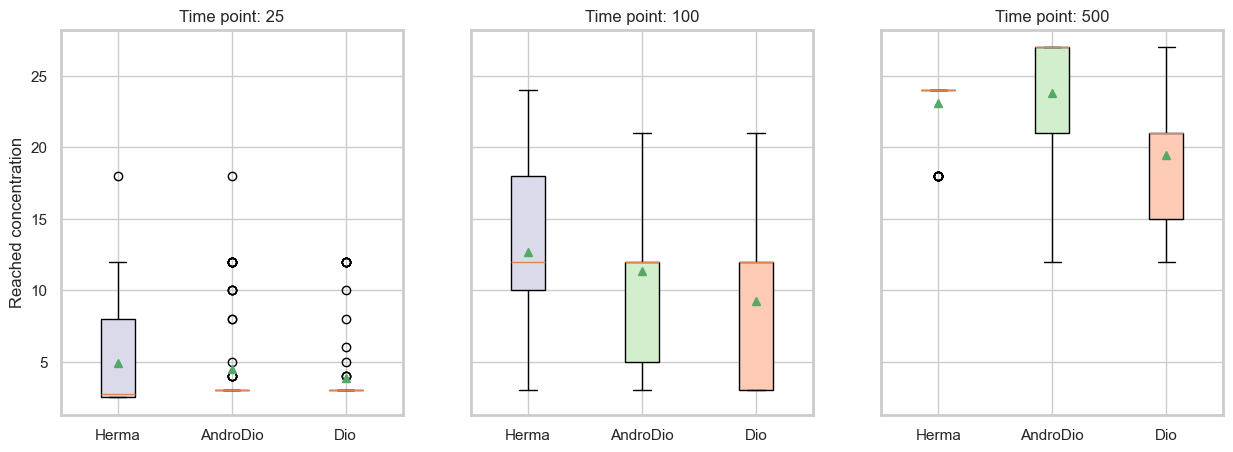

working on N 2000
herma
AndroDioecious,X=  0.5
dio


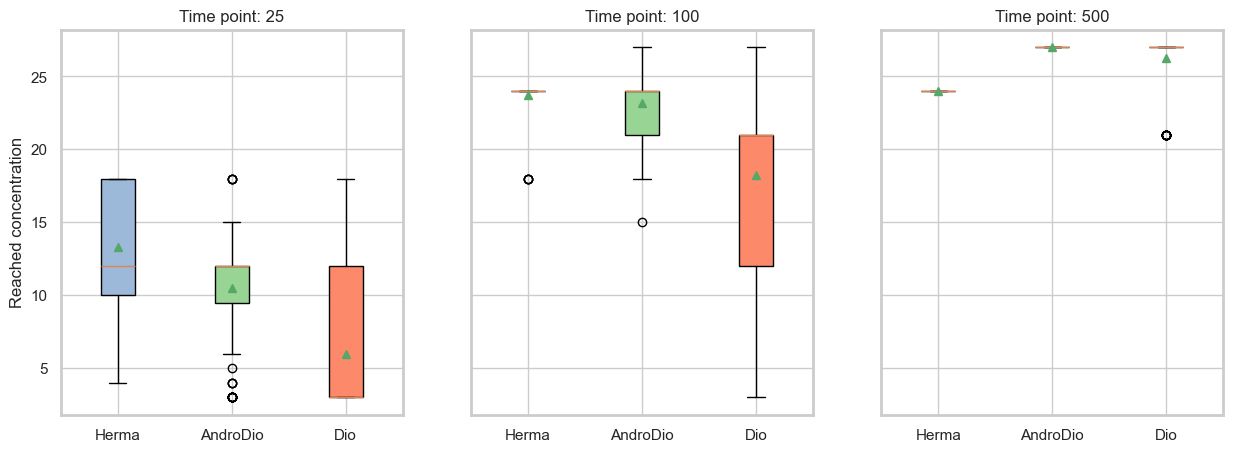

working on N 20000
herma
AndroDioecious,X=  0.5
dio


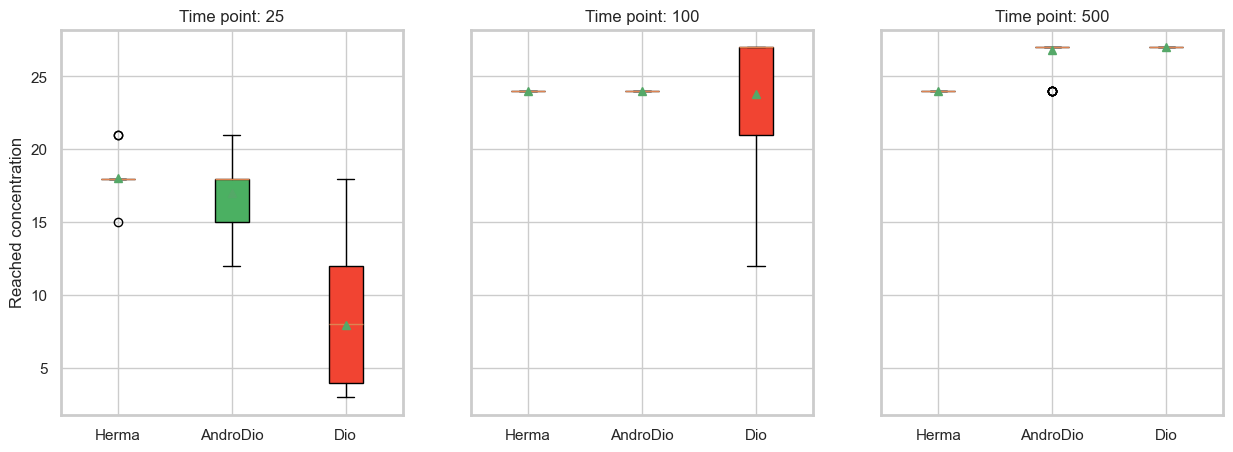

working on N 200000
herma
AndroDioecious,X=  0.5
dio


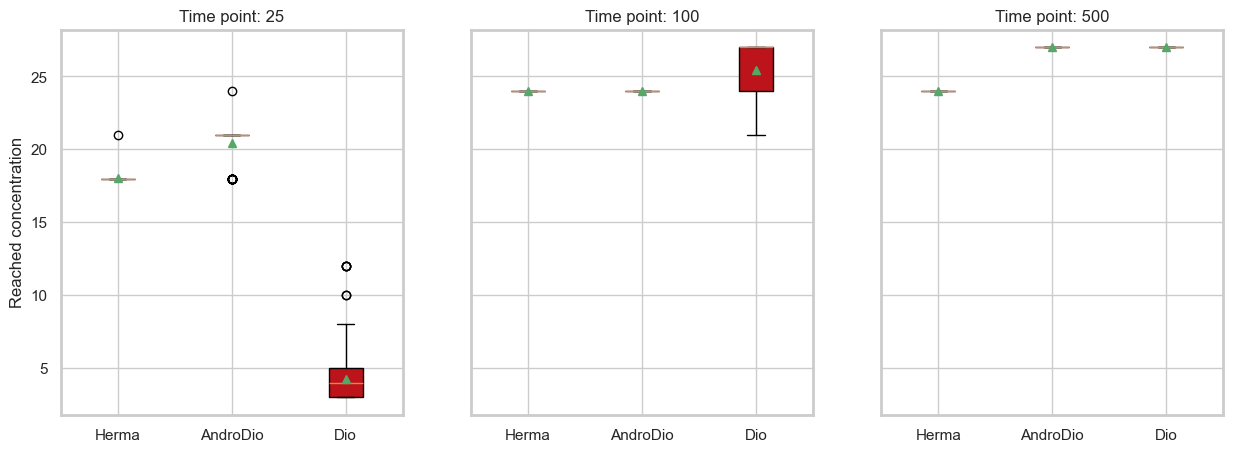

working on N 200
herma
AndroDioecious,X=  0.5
dio


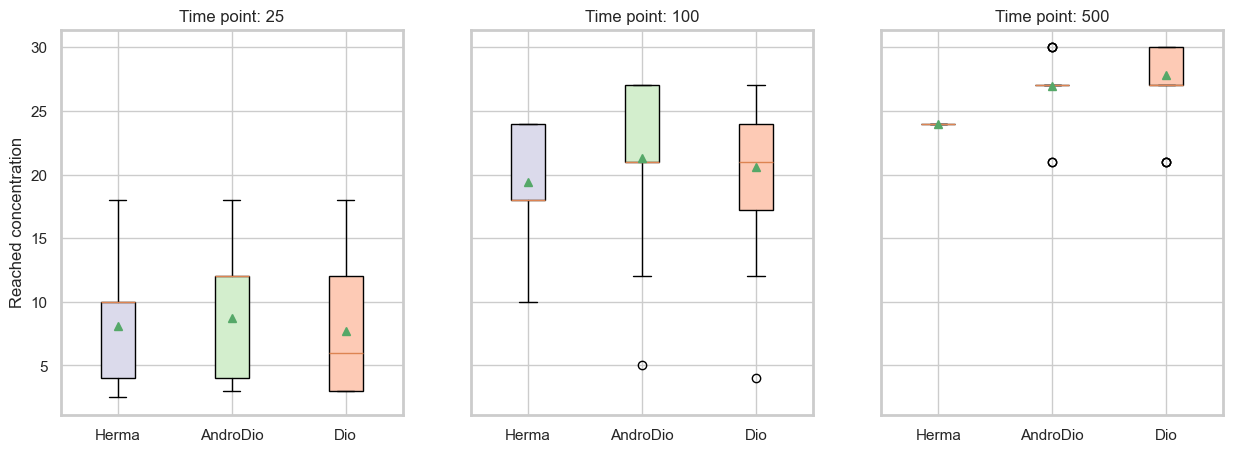

working on N 2000
herma
AndroDioecious,X=  0.5
dio


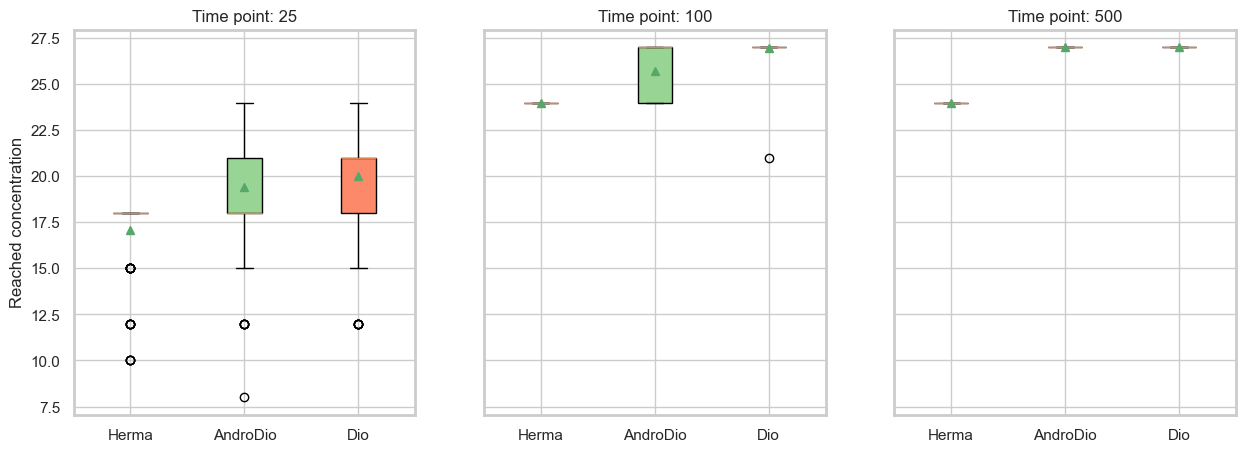

working on N 20000
herma
AndroDioecious,X=  0.5
dio


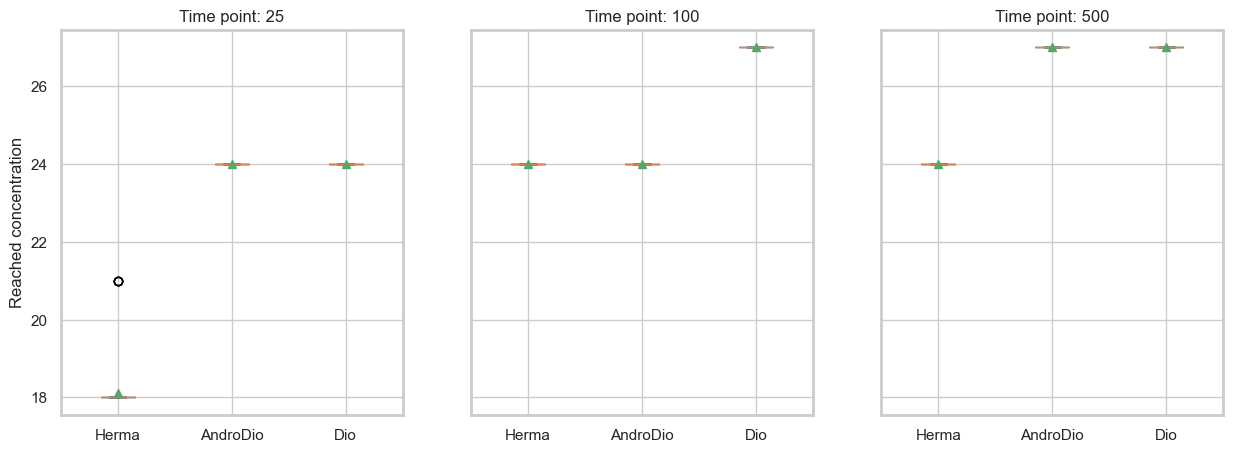

working on N 200000
herma
AndroDioecious,X=  0.5
dio


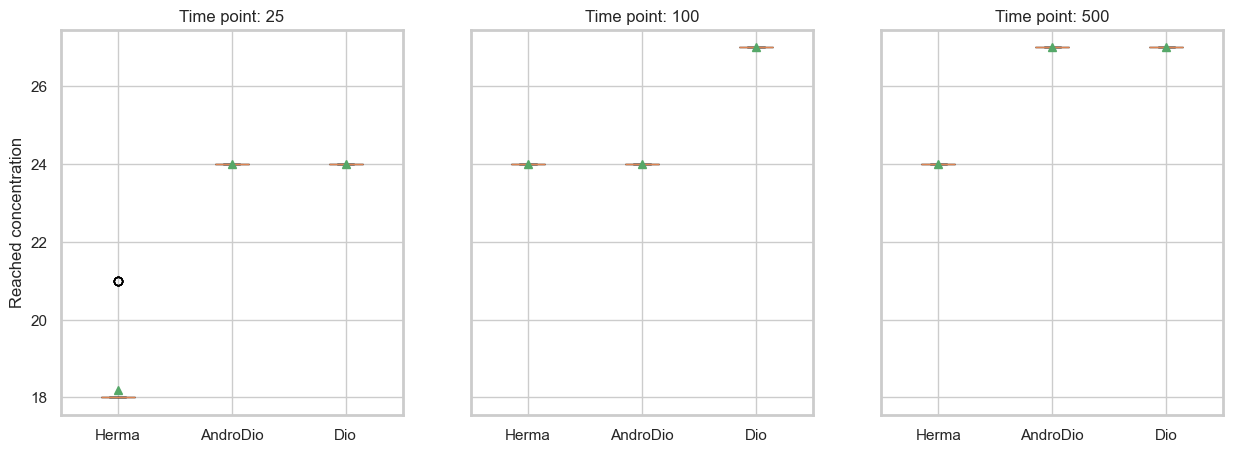

In [1128]:
myL=6
plt.rcParams['axes.linewidth'] = 2 
my_path='DataArticle/CombinedDataL6/'

for myD in [0,1]:
    for myN in [200, 2000,20000,200000]:
        print ('working on N', myN)
        fig, axes = plt.subplots(1, len(time_snapshots), figsize=(15, 5),  sharey=True)
        fff=[]
        colors=[]
        for myX in [0.0,0.5,1.0]:
            ff=[]
            palette = get_palette(myX, K=4)
            num_digits = int(math.log10(abs(myN)))
            
            name=(my_path+'WormsT500N'+str(myN)+'L'+str(myL)+'E0X'+str(myX)+'D'+str(myD)+'all_concentration.npy')
            #print (name)
            concentration=np.load(name)
            
            #print (np.shape(concentration))
            selected_concentrations=concentration[:,time_snapshots]
            for i in range (len(time_snapshots)):
                ff.append(selected_concentrations[:,i])
            fff.append(ff)
            num_digits = int(math.log10(abs(myN)))
            colors.append(palette[num_digits - 2])
        fff=np.array(fff)
        
        for i in range (len(time_snapshots)):

            this_time=fff[:,i,:].T

            #axes[i].boxplot(this_time)
            labels=['Herma','AndroDio',  'Dio']
            bplot = axes[i].boxplot(this_time, patch_artist=True, labels=labels,showmeans=True)  # will be used to label x-ticks

        # fill with colors
            for patch, color in zip(bplot['boxes'], colors):
                patch.set_facecolor(color)

            
            #axes[i].set_xlim(0, 30)
            axes[i].set_title(f'Time point: {time_snapshots[i]}')  # Include time in the title
            #sns.countplot(selected_concentrations[:,:], color=palette[num_digits - 2])
        axes[0].set_ylabel('Reached concentration')
        plt.savefig('TimeStampsL'+str(myL)+'D'+str(myD)+'N'+str(myN)+'.png',bbox_inches='tight')
        plt.show()
            
            
            #print (selected_concentrations)
